<a href="https://www.kaggle.com/code/wenceslaoespinosa/analisis-de-datos-y-aplicacion-de-modelos-de-ml?scriptVersionId=166395093" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

- [Abstract](#Abstract)
- [Dataset](#Dataset)
- [Preparación de datos](#Preparación-de-datos)
  * [Identificación de valores faltantes y eliminación de columnas innecesarias](#Identificación-de-valores-faltantes-y-eliminación-de-columnas-innecesarias)
  * [Codificación de variables categóricas](#Codificación-de-variables-categóricas)
- [Análisis exploratorio de los datos (EDA)](#Análisis-exploratorio-de-los-datos-EDA)
  * [Estadística descriptiva](#Estadística-descriptiva)
  * [Visualización de correlaciones](#Visualización-de-correlaciones)
  * [Gráficos de dispersión](#Gráficos-de-dispersión)
  * [Análisis de distribuciones con gráficos de violín](#Análisis-de-distribuciones-con-gráficos-de-violín)
  * [Análisis de componentes principales (PCA)](#Análisis-de-componentes-principales-PCA)
  * [Normalización](#Normalización)
  * [Preparación de datos para modelos de machine learning](#Preparación-de-datos-para-modelos-de-machine-learning)
- [Implementación de modelos de aprendizaje automático](#Implementación-de-modelos-de-aprendizaje-automático)
  * [Árboles de decisión](#Árboles-de-decisión)
  * [Bosques aleatorios](#Bosques-aleatorios)
  * [Modelo de regresión logística](#Modelo-de-regresión-logística)
  * [k-Vecinos más cercanos](#k-Vecinos-más-cercanos)
  * [Máquinas de vectores de soporte](#Máquinas-de-vectores-de-soporte)


## Resumen

El cáncer de mama es el tipo de cáncer más frecuente en todo el mundo, según datos de la OMS (2021), tan solo en el año 2020, hubo 2.3 millones de nuevos diagnósticos de cáncer de mama y alrededor de 685 mil muertes. Lo que lo convierte en un campo prioritario de investigación médica y tecnológica para mejorar las tasas de supervivencia y la calidad de las mujeres. 

Este estudio emplea diversas técnicas de aprendizaje automático para analizar un conjunto de datos vinculado al cáncer. Estos datos incluyen información visual de biopsias con aguja fina (FNA). Se realiza un análisis exploratorio de datos (EDA) y se implementan algoritmos de aprendizaje supervisado como árboles de decisión, bosques aleatorios, regresión logística, k-Vecinos más cercanos (KNN) y máquinas de vectores de soporte (SVM).

El objetivo principal es evaluar la eficacia de los modelos de aprendizaje automático en el estudio del cáncer de mama, centrándose en la clasificación de características de núcleos celulares de masas anómalas.

Se realizó un análisis exploratorio de datos para los modelos de aprendizaje automático que mostraron un rendimiento favorable en términos de precisión, sensibilidad y precisión global. Además, se realizó un análisis de la importancia de características y se exploró la aplicabilidad de estos modelos. 

Este análisis de datos en el estudio del cáncer de mama sienta las bases para futuras aplicaciones en otros conjuntos de imágenes. A pesar de la efectividad observada en los modelos de aprendizaje automático, se reconoce que su aplicabilidad clínica actual se ve limitada debido a la naturaleza de los datos.

## Abstract

Breast cancer stands as the most prevalent type of cancer worldwide, as per WHO data (2021). In just the year 2020, there were 2.3 million new diagnoses and approximately 685 thousand deaths, making it a paramount field of medical and technological research to enhance survival rates and women's quality of life.

This study employs various machine learning techniques to analyze a cancer-related dataset, including visual information from fine-needle aspiration (FNA) biopsies. An exploratory data analysis (EDA) is conducted, and supervised learning algorithms such as decision trees, random forests, logistic regression, k-Nearest Neighbors (KNN), and Support Vector Machines (SVM) are implemented.

The main objective is to assess the effectiveness of machine learning models in breast cancer research, focusing on classifying features of abnormal cell nuclei masses.

An exploratory data analysis is performed for the machine learning models, demonstrating favorable performance in terms of precision, sensitivity, and overall accuracy. Additionally, an analysis of feature importance is conducted, exploring the applicability of these models.

This data analysis in breast cancer research lays the groundwork for future applications in other image datasets. Despite the observed effectiveness of machine learning models, it is acknowledged that their current clinical applicability is limited due to the nature of the data.


### Dataset

La base de datos de cáncer de mama de Wisconsin para diagnóstico es un conjunto de datos de uso libre disponible en el repositorio de aprendizaje automático de la “University of California, Irvine”. Este conjunto de datos se deriva de imágenes de biopsias por aspiración con aguja fina (FNA) de una masa mamaria. Proporciona información sobre 10 características de los núcleos celulares presentes en la imagen. Además, se calcularon el promedio, el error estándar y los valores “peores” (media de los tres valores más grandes) de los núcleos vistos desde el microscopio (que en promedio tienen entre 10 a 40 núcleos celulares). Resultando entonces en un conjunto de 30 variables, más la variable objetivo de tipo categórica que indica si un tumor es benigno o maligno (Wolberg William & Street, 1995).
Cada una de estas 10 características son mencionadas en trabajo realizado por Street (1994), estas propiedades se describen brevemente a continuación:
1.	Radio. Es el promedio de las distancias desde el centro hasta el borde externo del núcleo.
2.	Perímetro. El tamaño del contorno del núcleo.
3.	Área. El espacio ocupado por el núcleo.
4.	Textura. Es la desviación estándar de los valores en escala de grises.
5.	Suavidad. La regularidad o variación del contorno del núcleo
6.	Compacidad. Indica que tan compacto es el núcleo en comparación con un círculo. 
7.	Concavidad. Mide que tan “pronunciadas” o significativas son las áreas cóncavas del borde del núcleo.
8.	Puntos cóncavos. Numero de porciones cóncavas en el contorno del núcleo.
9.	Simetría. Brinda una medida sobre qué tan simétrico es el núcleo celular.
10.	Dimensión fractal. La irregularidad o “rugosidad” del contorno del núcleo. 

Por ejemplo, la representación de suavidad de un núcleo celular se puede obervar en la siguiente imagen.Si el número es pequeño, entonces el contorno es suave en esa región:



<center>
  <img align="center" src="https://www.researchgate.net/profile/Nick_Street/publication/268356328/figure/fig3/AS:648234070442001@1531562454255/Line-segments-used-to-compute-smoothness-The-diierence-in-length-of-the-radial.png">
  <br> 
  Obtenida de Street (1994).
</center>


Por otra parte,la concavidad se captura dibujando cuerdas entre dos puntos límite, que se encuentran fuera del núcleo. Para el concavity_mean, se calcula el valor medio de estas longitudes.

<center>
    <img align="center" src="https://www.researchgate.net/profile/Nick_Street/publication/268356328/figure/fig4/AS:648234070466567@1531562454273/Line-segments-used-to-compute-concavity-and-concave-points-The-bold-line-segment.png">
    <br>
 Obtenida de Street (1994).
</center>
    
Para medir la simetría, se encuentra el eje mayor, o la cuerda más larga a través del centro. Luego, se mide la diferencia de longitud entre las líneas perpendiculares al eje mayor y el límite nuclear en ambas direcciones.

<center>
    <img align="center" src="https://www.researchgate.net/profile/Nick_Street/publication/268356328/figure/fig5/AS:648234070458368@1531562454289/Line-segments-used-to-compute-symmetry-The-lengths-of-perpendicular-segments-on-the.png">
   <br>
 Obtenida de Street (1994).
</center>
    
Cada una de estas características se analiza y se mide en términos de su media, error estándar y los “peores” valores. Resultanto en un conjunto de 30 variables, mas una variable de tipo categorica que contiene el tipo de tumor, maligno o benigno. 

## Preparación de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

### Identificación de valores faltantes y eliminación de columnas innecesarias

Los valores faltantes, ausentes en el conjunto de datos, pueden distorsionar el análisis y conducir a conclusiones incorrectas. En este proceso, se utilizó el método `df.isnull().sum()` de Pandas para contar los valores faltantes en cada columna.

Se observó que la columna 32, `Unnamed: 32`, presenta un total de 569 valores faltantes, lo que justifica su eliminación del conjunto de datos. Este paso se llevó a cabo mediante la función `df.drop`.

Adicionalmente, se eliminó la columna `id`, que contiene identificadores de pacientes y no aporta relevancia al análisis y entrenamiento.


In [3]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [5]:
# Eliminar la columna 'Unnamed: 32' que tiene todos los valores nulos
df = df.drop(columns=['Unnamed: 32'])
# Eliminar la columna 'id'
df = df.drop(columns=['id'])

### Codificación de variables categóricas

En este punto, se observo que todas las características independientes son numéricas, a excepción de la variable `diagnosis`, que es la variable objetivo y se convirtió en categórica.



In [6]:
df['diagnosis'] = df['diagnosis'].astype('category')

Para optimizar los algoritmos de aprendizaje automático, se procedió a codificar la columna `diagnosis` como valores malignos "M" con 1 y benignos "B" con 0, transformándola así a una forma numérica.



In [7]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B':0})



Además, se consideró útil generar listas de columnas del DataFrame basadas en sus sufijos: _mean (media), _se (error estándar) y _worst (peor caso). Esto facilita la agrupación de las columnas para análisis posteriores.

In [8]:
means = [col for col in df.columns if col.endswith('_mean')]
se = [col for col in df.columns if col.endswith('_se')]
worst = [col for col in df.columns if col.endswith('_worst')]

## Análisis exploratorio de los datos EDA


### Estadística descriptiva


El método `df.describe()` de Pandas proporciona un resumen de características estadísticas, que incluyen:

* count: Número de entradas no nulas.
* mean: Media (promedio) de los valores.
* std: Desviación estándar, indicando la variabilidad de los valores.
* min: Valor mínimo.
* 25% (Q1): Primer cuartil.
* 50% (mediana): Valor medio.
* 75% (Q3): Tercer cuartil.
* max: Valor máximo.

Esta visión facilita la comprensión de las características de manera general, aunque puede resultar difícil identificar errores o inconsistencias a simple vista.


In [9]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]


También se observo la distribución de la categoría objetivo, siendo aproximadamente un 62% de los casos benignos "0" y el resto malignos "1".


In [10]:
df['diagnosis'].value_counts(normalize=True)

diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

También se calcularon las medias y las desviaciones estándar entre las clases objetivo. Por ejemplo, se observo que a mayor área o desviación estándar, existe una mayor posibilidad de que la muestra sea maligna. En otras palabras, `area_mean` tiende a ser mayor en promedio en masas cancerosas.


In [11]:
df.groupby(['diagnosis'])['area_mean'].mean()

diagnosis
0    462.790196
1    978.376415
Name: area_mean, dtype: float64

In [12]:
df.groupby(['diagnosis'])['area_mean'].std()

diagnosis
0    134.287118
1    367.937978
Name: area_mean, dtype: float64

### Visualización de correlaciones

#### Mapas de calor de correlaciones

Los mapas de calor de correlaciones representan visualmente las relaciones entre múltiples variables. Utilizan colores para mostrar la fuerza y dirección de la correlación, siendo una herramienta valiosa para el análisis exploratorio de datos.

#### Matriz de correlación

La matriz de correlación revela el coeficiente de correlación (por ejemplo, el coeficiente de correlación de Pearson) entre cada par de variables. Este coeficiente, normalizado entre -1 y +1, mide la relación lineal. Su fórmula es:

\[ r = \frac{\text{Covarianza de } X \text{ e } Y}{\sqrt{\text{Varianza de } X} \times \sqrt{\text{Varianza de } Y}} \]

- \( r \) cercano a +1 o -1 indica una fuerte relación lineal.
- \( r \) cercano a 0 indica una relación lineal débil o inexistente.

#### Funcionamiento y Características

- **Representación Visual**: Cada celda en el mapa de calor muestra el coeficiente de correlación entre dos variables.
- **Escala de Colores**: Tonos cálidos indican correlaciones positivas, mientras que tonos fríos indican correlaciones negativas.
- **Valores de Correlación**: Varían de -1 a 1, donde +1 implica una correlación positiva perfecta, 0 ninguna correlación, y -1 una correlación negativa perfecta.
- **Correlación No Implica Causalidad**: Importante destacar que una alta correlación no implica causalidad.


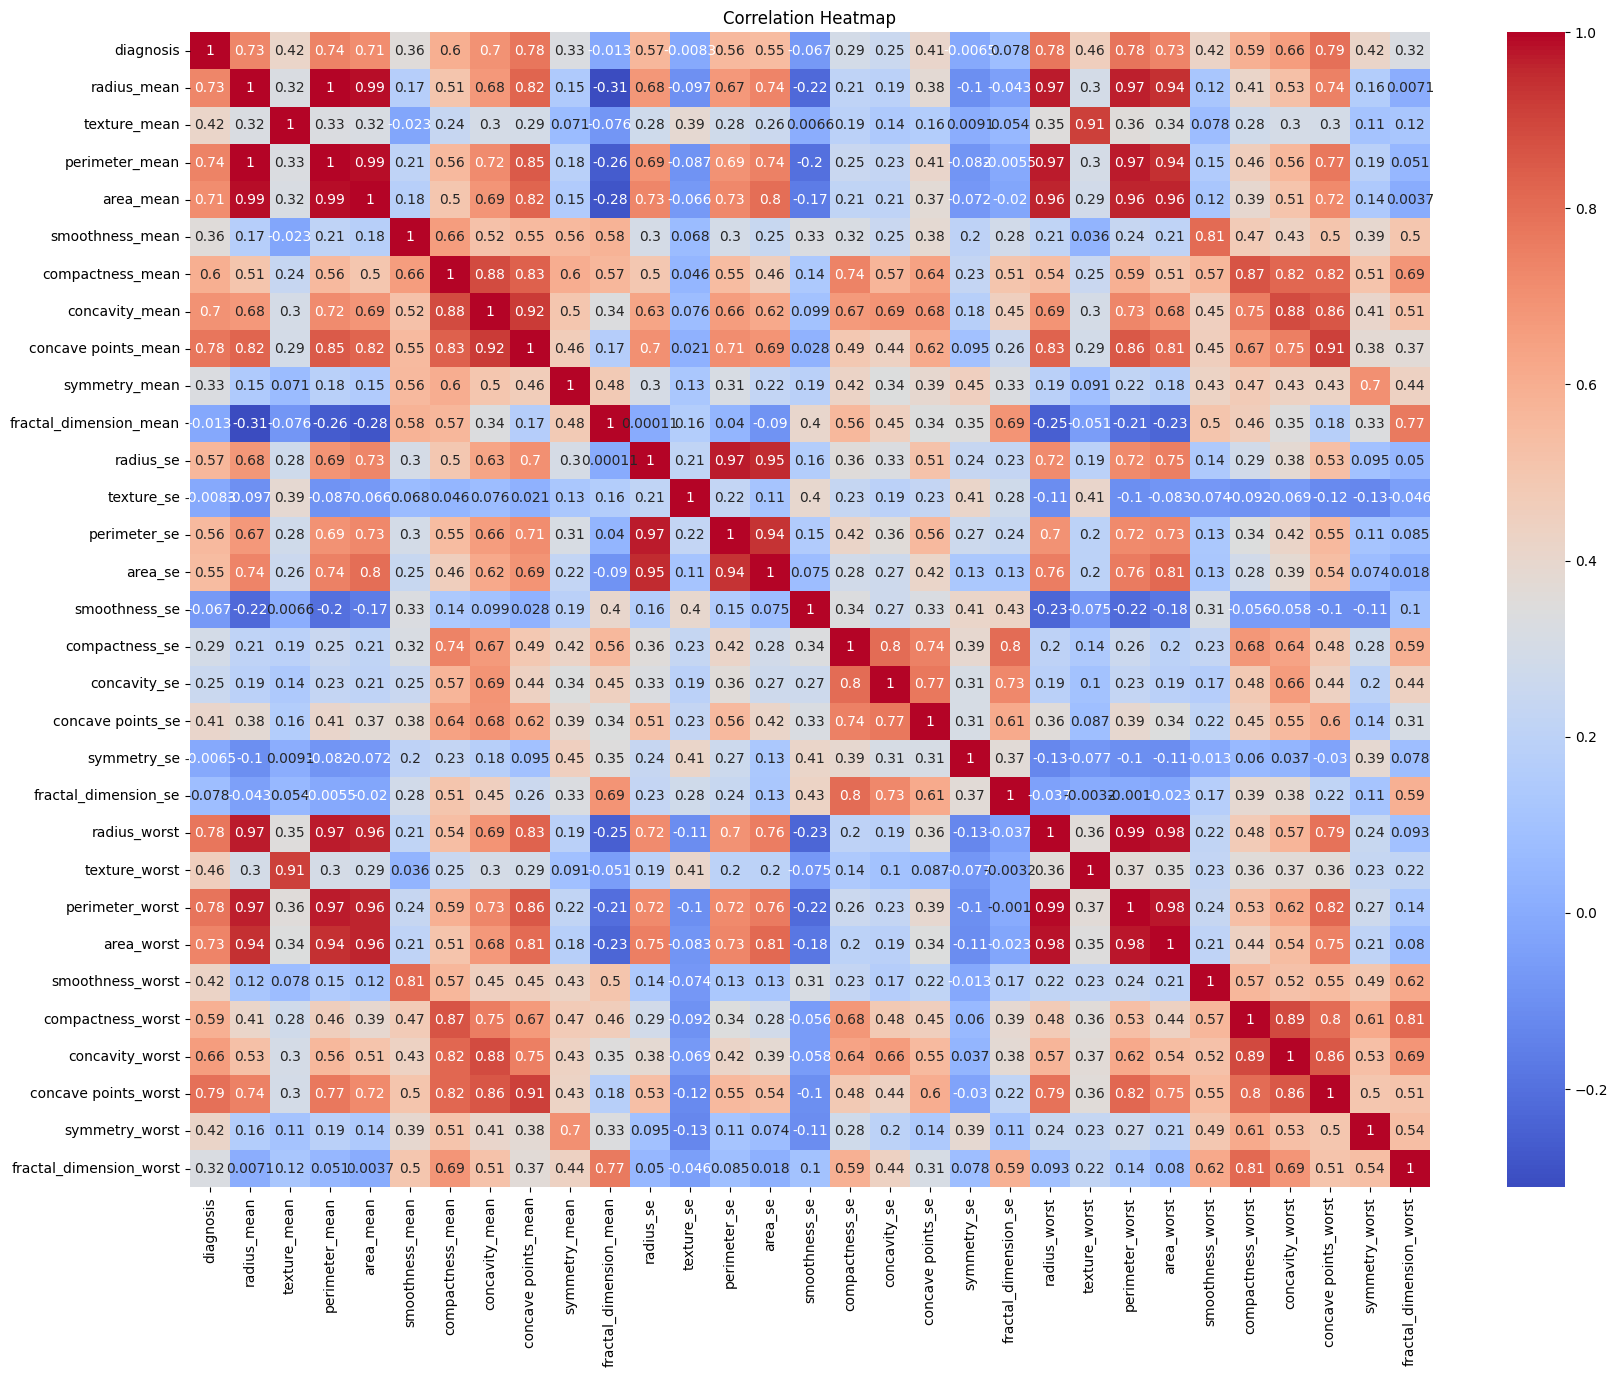

In [13]:
# Mapa de calor de correlaciones
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#### Observaciones del Mapa de Correlaciones

Al analizar el mapa de correlaciones, se observaron relaciones positivas fuertemente asociadas (valores mayores a 0.7) entre la malignidad y el radio, los puntos concavos, perímetro y área. Estas asociaciones tienen sentido, ya que las características estaban modeladas de manera que los valores altos estuvieran asociados con la malignidad.

También se evidenció una fuerte correlación entre el radio, el perímetro y el área, lo que llevó a considerar la posible eliminación de dos de estas tres características.

Otro punto destacado fue la observación de las características `_worst`, las cuales resultaron redundantes. Estas características (las tres más grandes) ya estaban contempladas en las muestras iniciales, ya que se calculó tanto el promedio `_mean` como los errores estándar `_se`. Por esta razón, se encontró una alta correlación (mayor al 0.80) entre estas características. Por ejemplo, la correlación entre `radius_worst` y `radius_mean` fue de 0.97.


### Gráficos de dispersión

#### Multicolinealidad

La multicolinealidad se presenta cuando dos o más variables predictoras en un modelo estadístico están fuertemente correlacionadas. Esto dificulta la interpretación de los coeficientes y puede llevar a estimaciones inestables.

#### Detección de Multicolinealidad

- **Visualmente:** A través de gráficos de dispersión por pares.
- **Estadísticamente:** Utilizando métricas como el Factor de Inflación de la Varianza (VIF).

#### Gráficos de Dispersión por Pares

Estos gráficos muestran la relación bivariada entre cada par de variables. Una relación lineal clara puede indicar multicolinealidad.

Para verificar la multicolinealidad, se revisó la dispersión de las primeras 10 variables `_mean`.



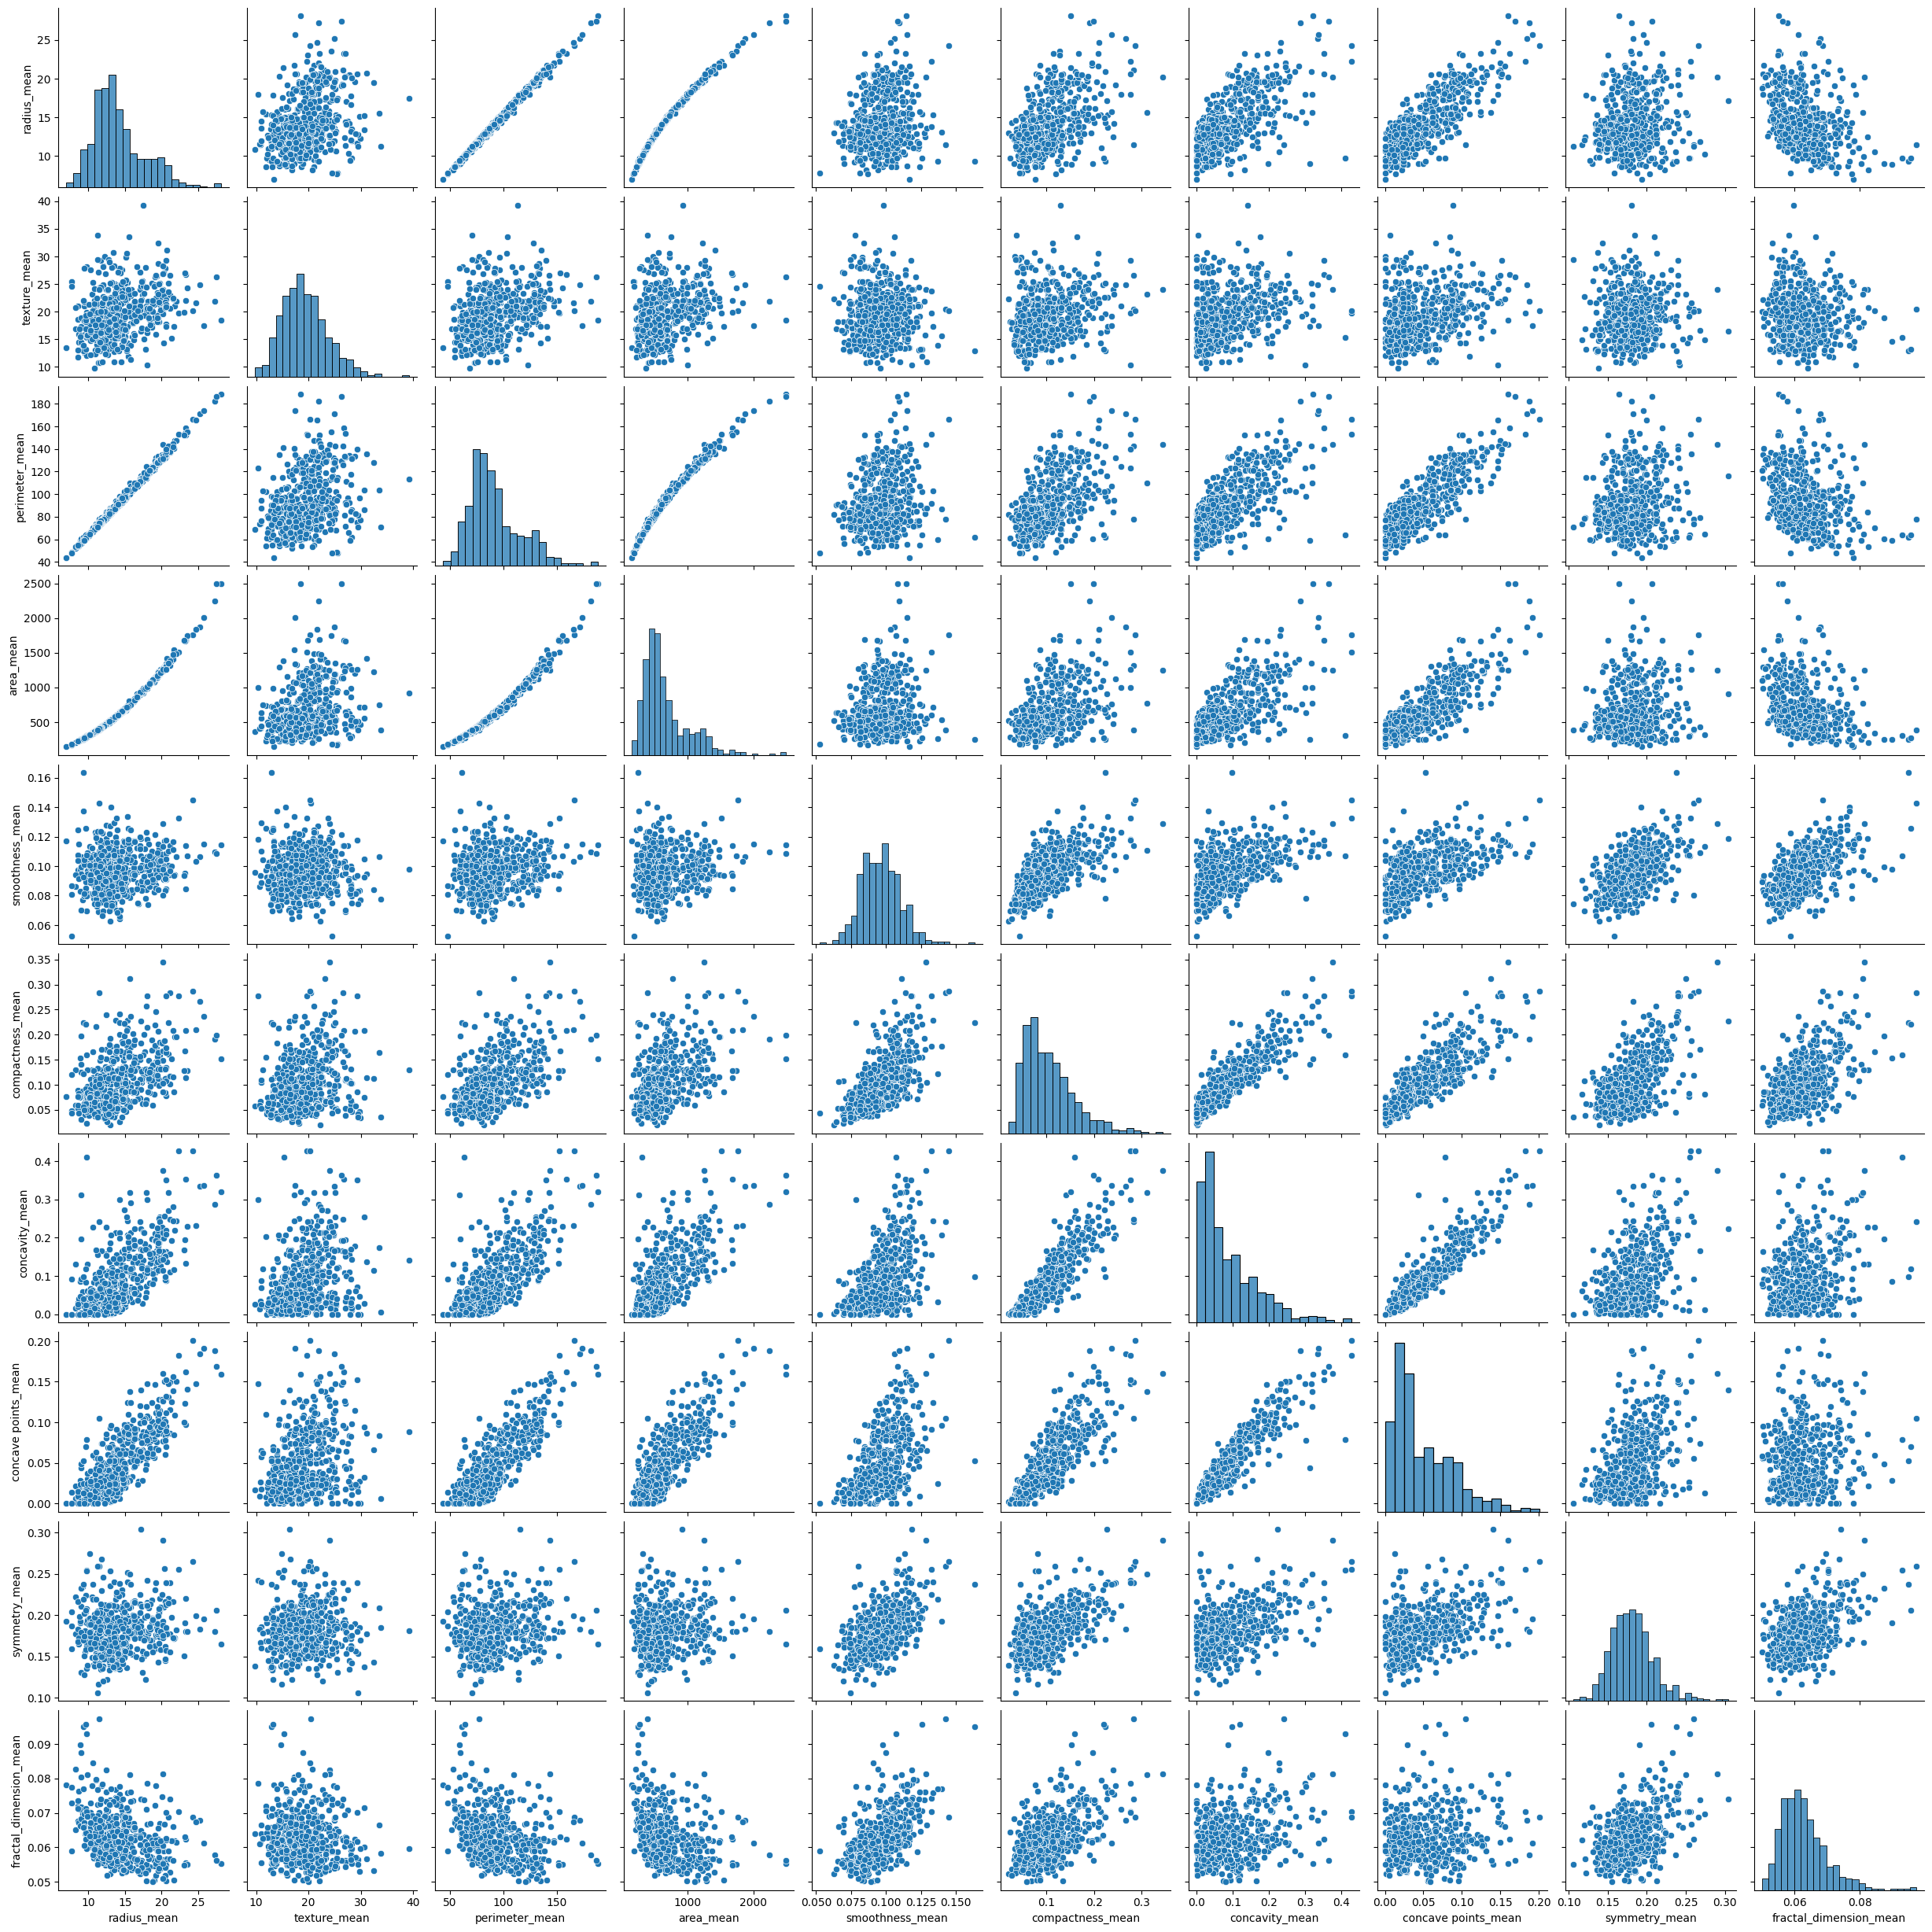

In [14]:
sns.pairplot(df[means]);

#### Observaciones

Al examinar los gráficos de dispersión por pares, se observaron relaciones claras de multicolinealidad, especialmente entre el área, el perímetro y el radio. Esta confirmación visual complementa la información obtenida en el mapa de calor, reforzando la presencia de multicolinealidad entre estas variables.


### Análisis de distribuciones con gráficos de violín

Los gráficos de violín combinan las propiedades de los gráficos de caja con un gráfico de densidad de probabilidad. Cada 'violín' representa la distribución de los datos y su densidad en diferentes valores.

- **Centro del Violín**: Similar a la caja en un gráfico de caja, muestra la mediana y los cuartiles.
- **Anchura del Violín**: Indica la densidad de los datos en ese valor; una mayor anchura significa una mayor densidad (más puntos de datos).
- **Colas del Violín**: Extendiéndose a los valores máximos y mínimos, las colas suelen mostrar la presencia de valores atípicos.

Los gráficos de violín, en comparación con los gráficos de caja, proporcionan una visión más completa de la distribución de los datos. Se opto por gráficos de violín porque no solo comparan las medianas y los rangos intercuartílicos, sino que también visualizan la forma completa de las distribuciones de las características en el conjunto de datos.

Para realizar estos gráficos, se tomó la decisión de estandarizar los datos, ya que los rangos entre variables son bastante diferentes y no son representativos en gráficos no tan grandes.

El siguiente código crea una función llamada `plot_violinplot`, que se utiliza para generar gráficos de violín para las características del conjunto de datos:

1. **Estandarización de los Datos**:
   - Se utilizo `StandardScaler` de `sklearn.preprocessing` para estandarizar las características.

2. **Creación de Gráficos de Violín**:
   - Los datos estandarizados se combinan con la columna de diagnóstico y se "derriten" para su visualización con `pd.melt`.
   - Se genera un gráfico de violín para cada conjunto de características (_mean, _se, _worst) con `sns.violinplot`.
   - El gráfico muestra la distribución de cada característica con respecto al diagnóstico, lo que facilita la identificación de diferencias clave entre tumores benignos y malignos.


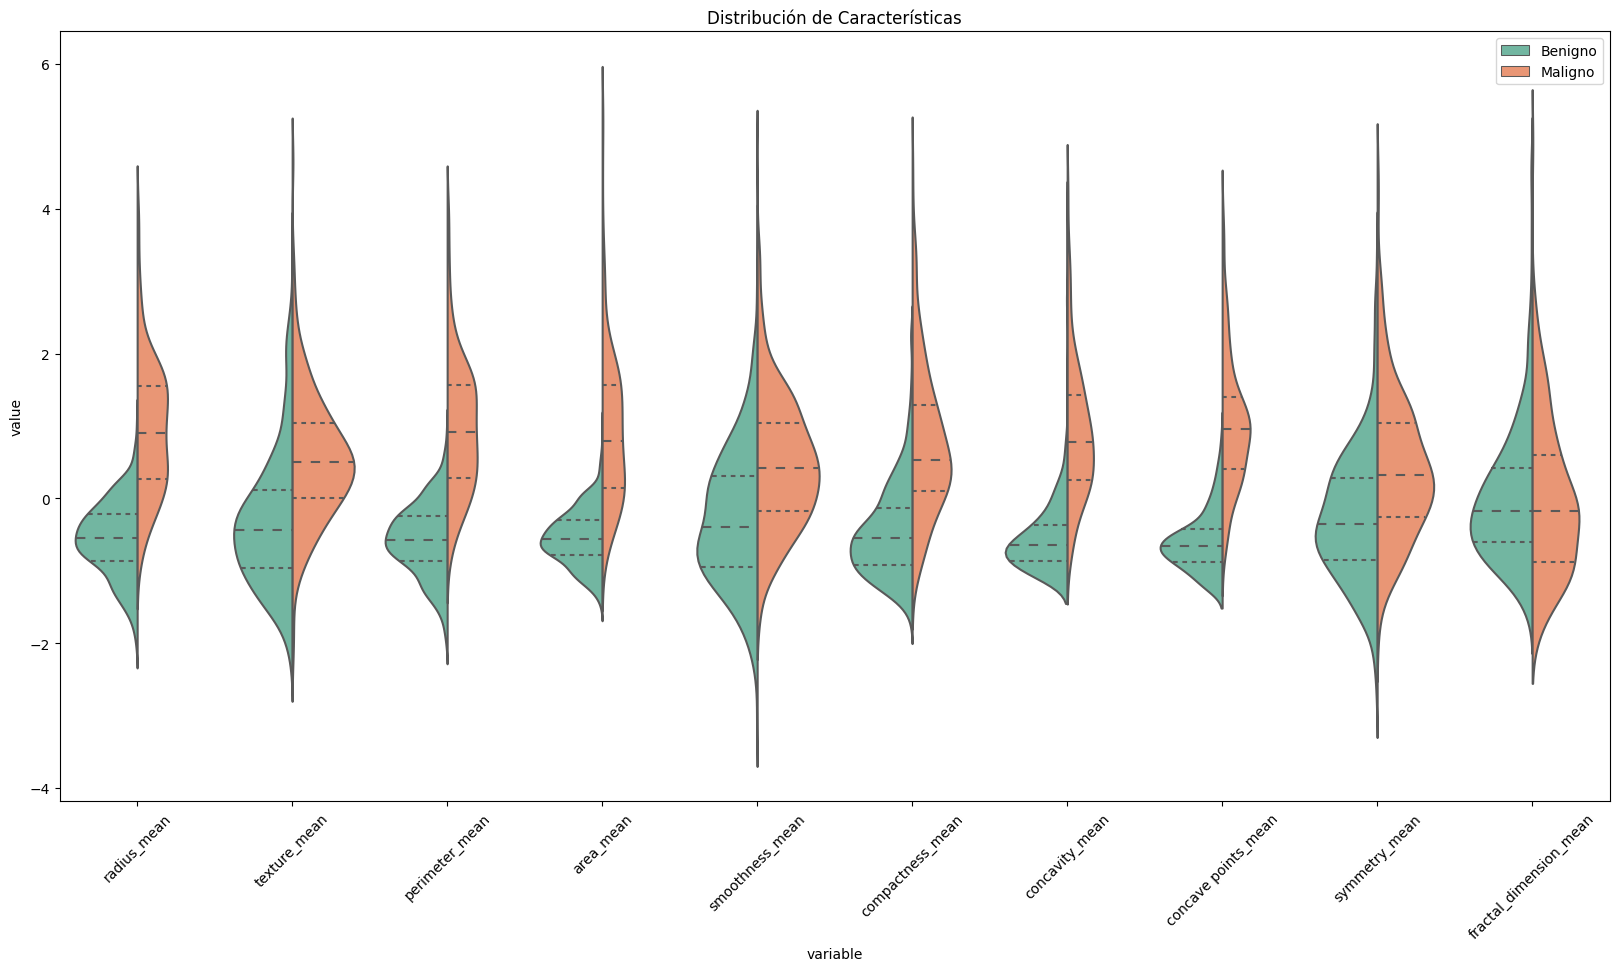

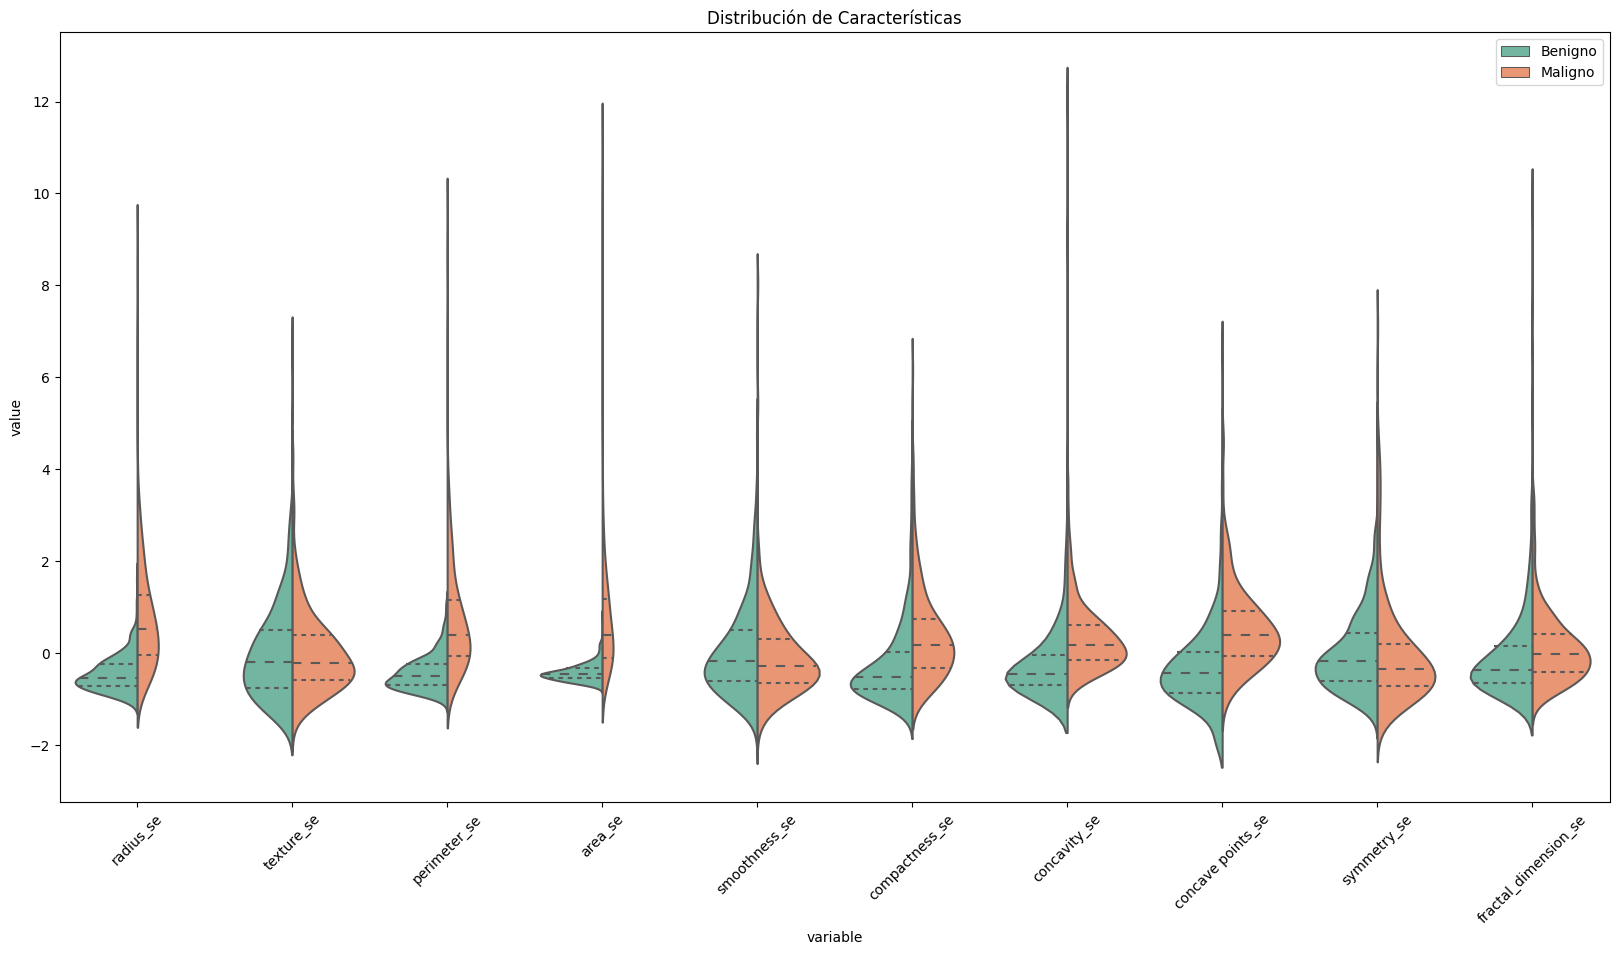

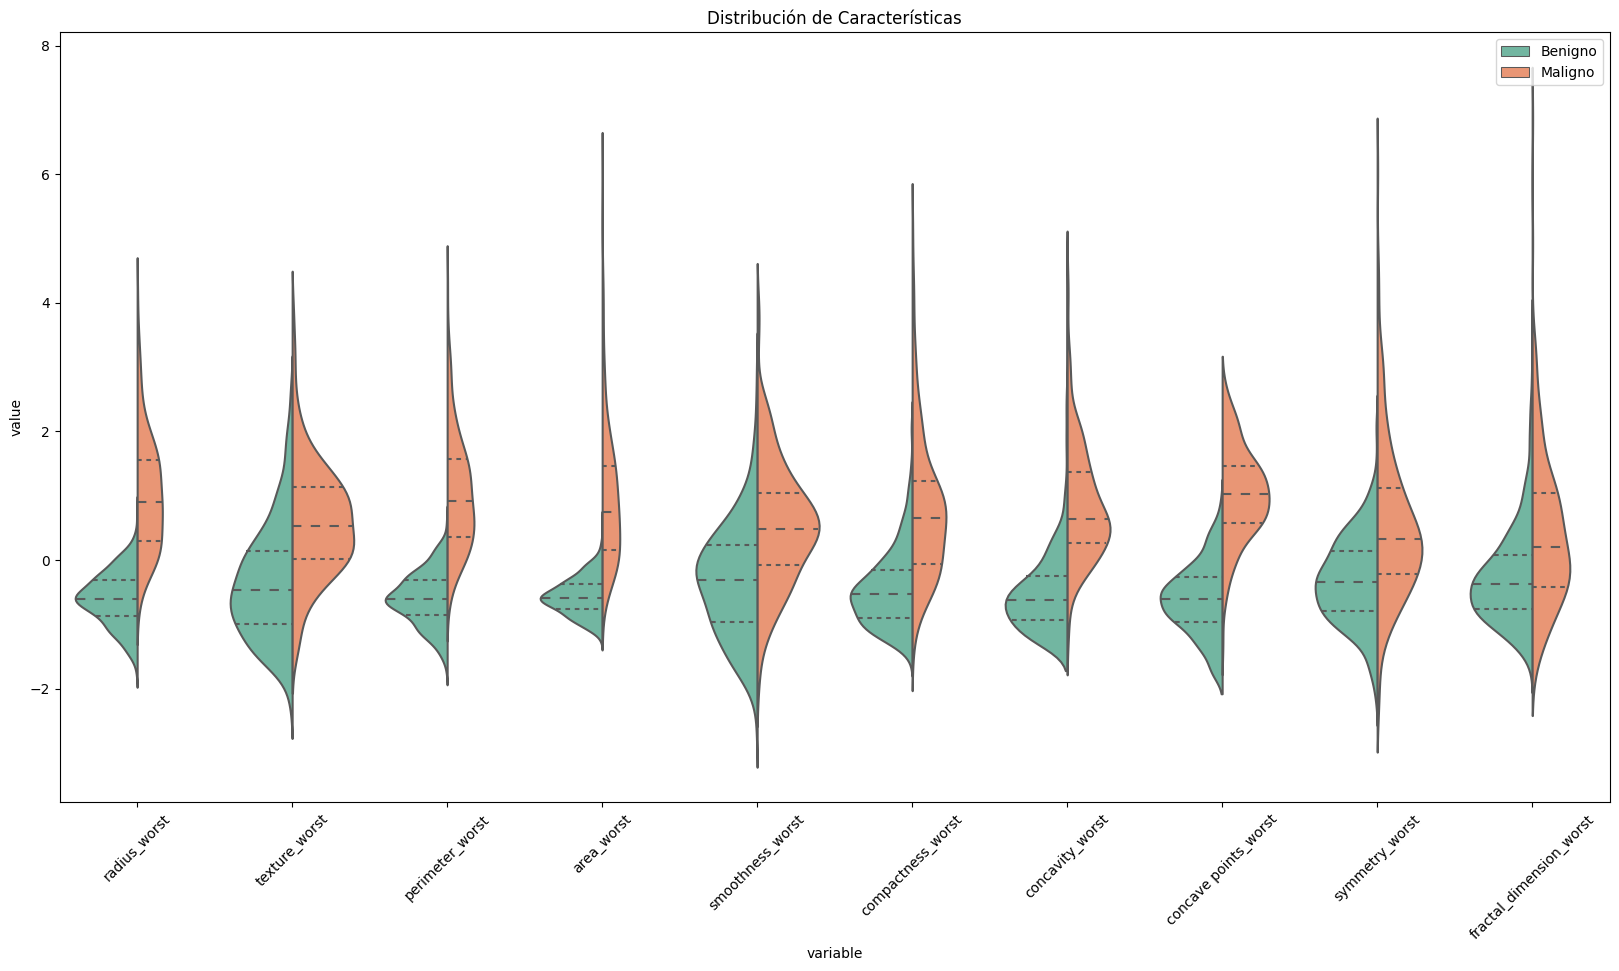

In [15]:
def plot_violinplot(df, feat_list):
    # Escalado de las características
    scaler = StandardScaler()
    feat_scaled = pd.DataFrame(scaler.fit_transform(df[feat_list]), columns=feat_list, index=df.index)

    # Combinar con la columna de diagnóstico
    data = pd.concat([df['diagnosis'], feat_scaled], axis=1)

    # Derretir el DataFrame para la visualización
    df_melt = pd.melt(frame=data, value_vars=feat_list, id_vars=['diagnosis'])

    # Crear el gráfico de violín
    fig, ax = plt.subplots(1, 1, figsize=(20, 10), dpi=100)
    sns.violinplot(x="variable", y="value", hue="diagnosis", data=df_melt, split=True, inner="quart", palette='Set2').set_title('Distribución de Características')
    plt.xticks(rotation=45)

    # Ajustar la leyenda
    L = plt.legend()
    L.get_texts()[0].set_text('Benigno')
    L.get_texts()[1].set_text('Maligno')

# Usar la función para las columnas _mean, _se y _worst
plot_violinplot(df, means)  # para las columnas _mean
plot_violinplot(df, se)     # para las columnas _se
plot_violinplot(df, worst)  # para las columnas _worst


#### Observaciones 

De los gráficos de violín, se observó que para `_mean`, la distribución de los datos contrastaba entre Malignos y Benignos. Se notó que a valores más altos, había más posibilidad de que la masa fuera cancerosa, mientras que en las muestras benignas la media era más baja. Además, se destacó la variabilidad en las variables radio, área y perímetro entre maligno y benigno, al igual que en los puntos concavos, donde los valores altos estaban ampliamente distribuidos. De aqui tambien cobra sentido que los valores altos suelen estan asociados con malignidad.


### Análisis de componentes principales PCA

El PCA nos permite, mediante los vectores y valores propios de la matriz de covarianza, identificar direcciones especiales a lo largo de las cuales capturamos la mayor cantidad de varianza de los datos. Esto implica que un conjunto de datos de 30 variables puede reducirse a una cantidad menor, capturando una cantidad mínima suficiente de varianza. Aunque se sacrifique un porcentaje de varianza, esta reducción de dimensiones beneficia a los modelos de machine learning al tener que procesar una menor cantidad de datos.

Primero, se creo una copia del DataFrame original para estandarizar los datos antes de realizar el análisis PCA.


In [16]:
# Crear una copia del DataFrame original para el PCA
df_pca = df.copy()

# Excluir la columna 'diagnosis` para la normalización
features = df_pca.columns.difference(['diagnosis'])

scaler = StandardScaler()
df_pca[features] = scaler.fit_transform(df_pca[features])


#### Cálculo de la matriz de covarianza

Antes de proceder con el PCA, excluímos la variable `diagnosis` del `df_pca`, ya que PCA se aplica sobre características numéricas continuas. Posteriormente, calculamos la matriz de covarianza, que es la base para determinar las direcciones de máxima varianza en el conjunto de datos.


In [17]:
# excluir la variable 'diagnosis' antes de calcular la matriz de covarianza
features_df = df_pca.drop('diagnosis', axis=1)

# Calculando la matriz de covarianza para las características numéricas
matriz_covarianza = np.cov(features_df.T)

# Mostrar la matriz de covarianza
matriz_covarianza


array([[ 1.00176056e+00,  3.24351929e-01,  9.99612069e-01,
         9.89095475e-01,  1.70881506e-01,  5.07014640e-01,
         6.77955036e-01,  8.23976636e-01,  1.48001350e-01,
        -3.12179472e-01,  6.80285970e-01, -9.74887767e-02,
         6.75358538e-01,  7.37159198e-01, -2.22992026e-01,
         2.06362656e-01,  1.94545531e-01,  3.76831225e-01,
        -1.04504545e-01, -4.27163418e-02,  9.71245907e-01,
         2.97530545e-01,  9.66835698e-01,  9.42739295e-01,
         1.19826732e-01,  4.14190751e-01,  5.27839123e-01,
         7.45524434e-01,  1.64241985e-01,  7.07832563e-03],
       [ 3.24351929e-01,  1.00176056e+00,  3.30113223e-01,
         3.21650988e-01, -2.34296930e-02,  2.37118951e-01,
         3.02950254e-01,  2.93980713e-01,  7.15266864e-02,
        -7.65717560e-02,  2.76354360e-01,  3.87037830e-01,
         2.82169018e-01,  2.60302460e-01,  6.62542133e-03,
         1.92312595e-01,  1.43545353e-01,  1.64139495e-01,
         9.14323671e-03,  5.45533955e-02,  3.53193674e-

#### Vectores y valores propios

Los vectores propios representan las direcciones principales en el espacio de datos, mientras que los valores propios indican la cantidad de varianza que se captura en esas direcciones.

Estos vectores y valores propios capturaran la mayor cantidad de varianza de los datos, donde cada una de estas direcciones se considera una dirección principal.


In [18]:
eigen_valores, eigen_vectores = np.linalg.eig(matriz_covarianza)

A continuacion, se obtuvieron los valores y vectores propios, que nos ayudan a entender cómo cada componente principal representa la varianza en los datos.


In [19]:
# eigen_valores

In [20]:
# eigen_vectores

#### Cálculo de la varianza explicada

Para comprender la importancia relativa de cada componente principal, se calculo la varianza explicada por cada valor propio. Esto  proporciona una idea de cuánta información total de los datos representa cada componente principal.



In [21]:
varianza_explicada = []
for i in eigen_valores:
    varianza_explicada.append((i/sum(eigen_valores))*100)

print(varianza_explicada)

[44.27202560752634, 18.971182044033092, 9.393163257431386, 6.602134915470144, 5.495768492346269, 4.02452203988335, 2.250733712982513, 1.5887238000213257, 1.3896493745591085, 1.168978189413148, 0.9797189875980171, 0.8705379007378848, 0.8045249871967322, 0.5233657454926364, 0.3137832167627394, 0.26620933651523204, 0.19799679253242633, 0.17539594502263658, 0.16492530592251595, 0.0004434827427358046, 0.002496010324689564, 0.005297792903809247, 0.02300154625059588, 0.027258799547749138, 0.05160423791651967, 0.06018335666716693, 0.08113612588991112, 0.09146467510543384, 0.10386467483387114, 0.0999096463700251]


Estos porcentajes nos ayudan a decidir cuántos componentes principales deberíamos considerar para capturar la mayoría de la varianza en los datos, equilibrando entre simplicidad y retención de información.

También se realizó un gráfico de codo para visualizar cuántos componentes utilizar. Se busco el punto donde el aumento en la varianza explicada se vuelve menos pronunciado, indicando que los componentes adicionales no aportan mucha información adicional.


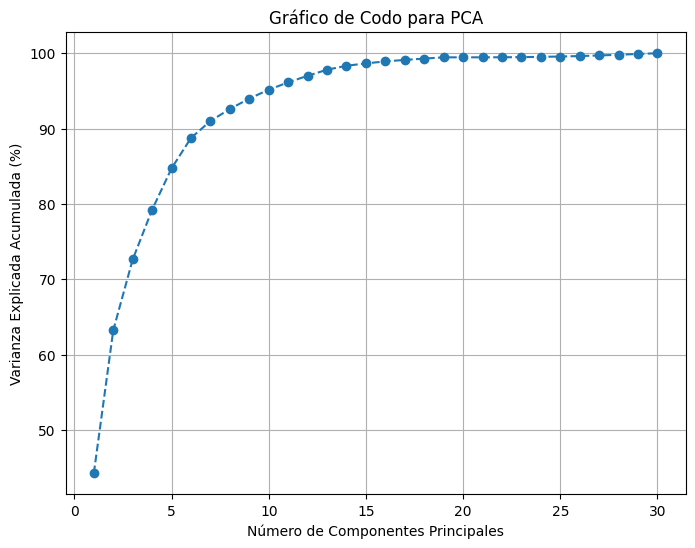

In [22]:
# Calculando la varianza explicada acumulada
varianza_explicada_acumulada = np.cumsum(varianza_explicada)

# Creando el gráfico de codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada, marker='o', linestyle='--')
plt.title('Gráfico de Codo para PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada (%)')
plt.grid(True)
plt.show()


#### Observaciones

A través de la varianza explicada, se determino el número de componentes que se aproximaba al 90% de la suma acumulativa de la varianza, lo cual se confirma en la visualización del gráfico de codo.

En este caso, se eligio el número de componentes que podría explicar aproximadamente el 90% de la dispersión de los datos. Por lo tanto, se eligieron 6 componentes principales, reduciendo la dimensionalidad de 30 a 6 variables mediante PCA.


#### Aplicación de PCA

Se utilizó `PCA` de `sklearn.decomposition` con 6 componentes. El proceso transformó los datos originales, que tenían 30 características, en un nuevo espacio de características con solo 6 componentes principales. Estos componentes son combinaciones lineales de las características originales y capturan la mayor parte de la información contenida en el conjunto de datos.

Los resultados de PCA proporcionaron un nuevo conjunto de datos simplificado, que es más manejable para el análisis y la modelización, manteniendo al mismo tiempo la esencia de la información original. Este será usado más adelante en el entrenamiento de los modelos de aprendizaje automático con la finalidad de comparar su rendimiento.


In [23]:
# Definir el modelo PCA con 6 componentes principales
pca = PCA(n_components=6)

# Aplicar PCA a los datos estandarizados
pca_resultados = pca.fit_transform(df_pca[features])

# Los resultados son un array con las 6 componentes principales
df_pca_resultados = pd.DataFrame(pca_resultados, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6'])

# Mostrando las primeras filas del DataFrame resultante
df_pca_resultados.head()


PCA1       PCA2      PCA3      PCA4      PCA5      PCA6
0  9.192837   1.948583 -1.123166  3.633730 -1.195107  1.411421
1  2.387802  -3.768172 -0.529293  1.118265  0.621773  0.028658
2  5.733896  -1.075174 -0.551748  0.912084 -0.177088  0.541455
3  7.122953  10.275589 -3.232790  0.152548 -2.960880  3.053422
4  3.935302  -1.948072  1.389767  2.940639  0.546749 -1.226497


#### Varianza explicada por los componentes principales

`pca.explained_variance_ratio_` da información sobre la proporción de la varianza total del conjunto de datos que es explicada por cada uno de los componentes principales seleccionados.


In [24]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522])

#### Gráficos de pares de los componentes PCA

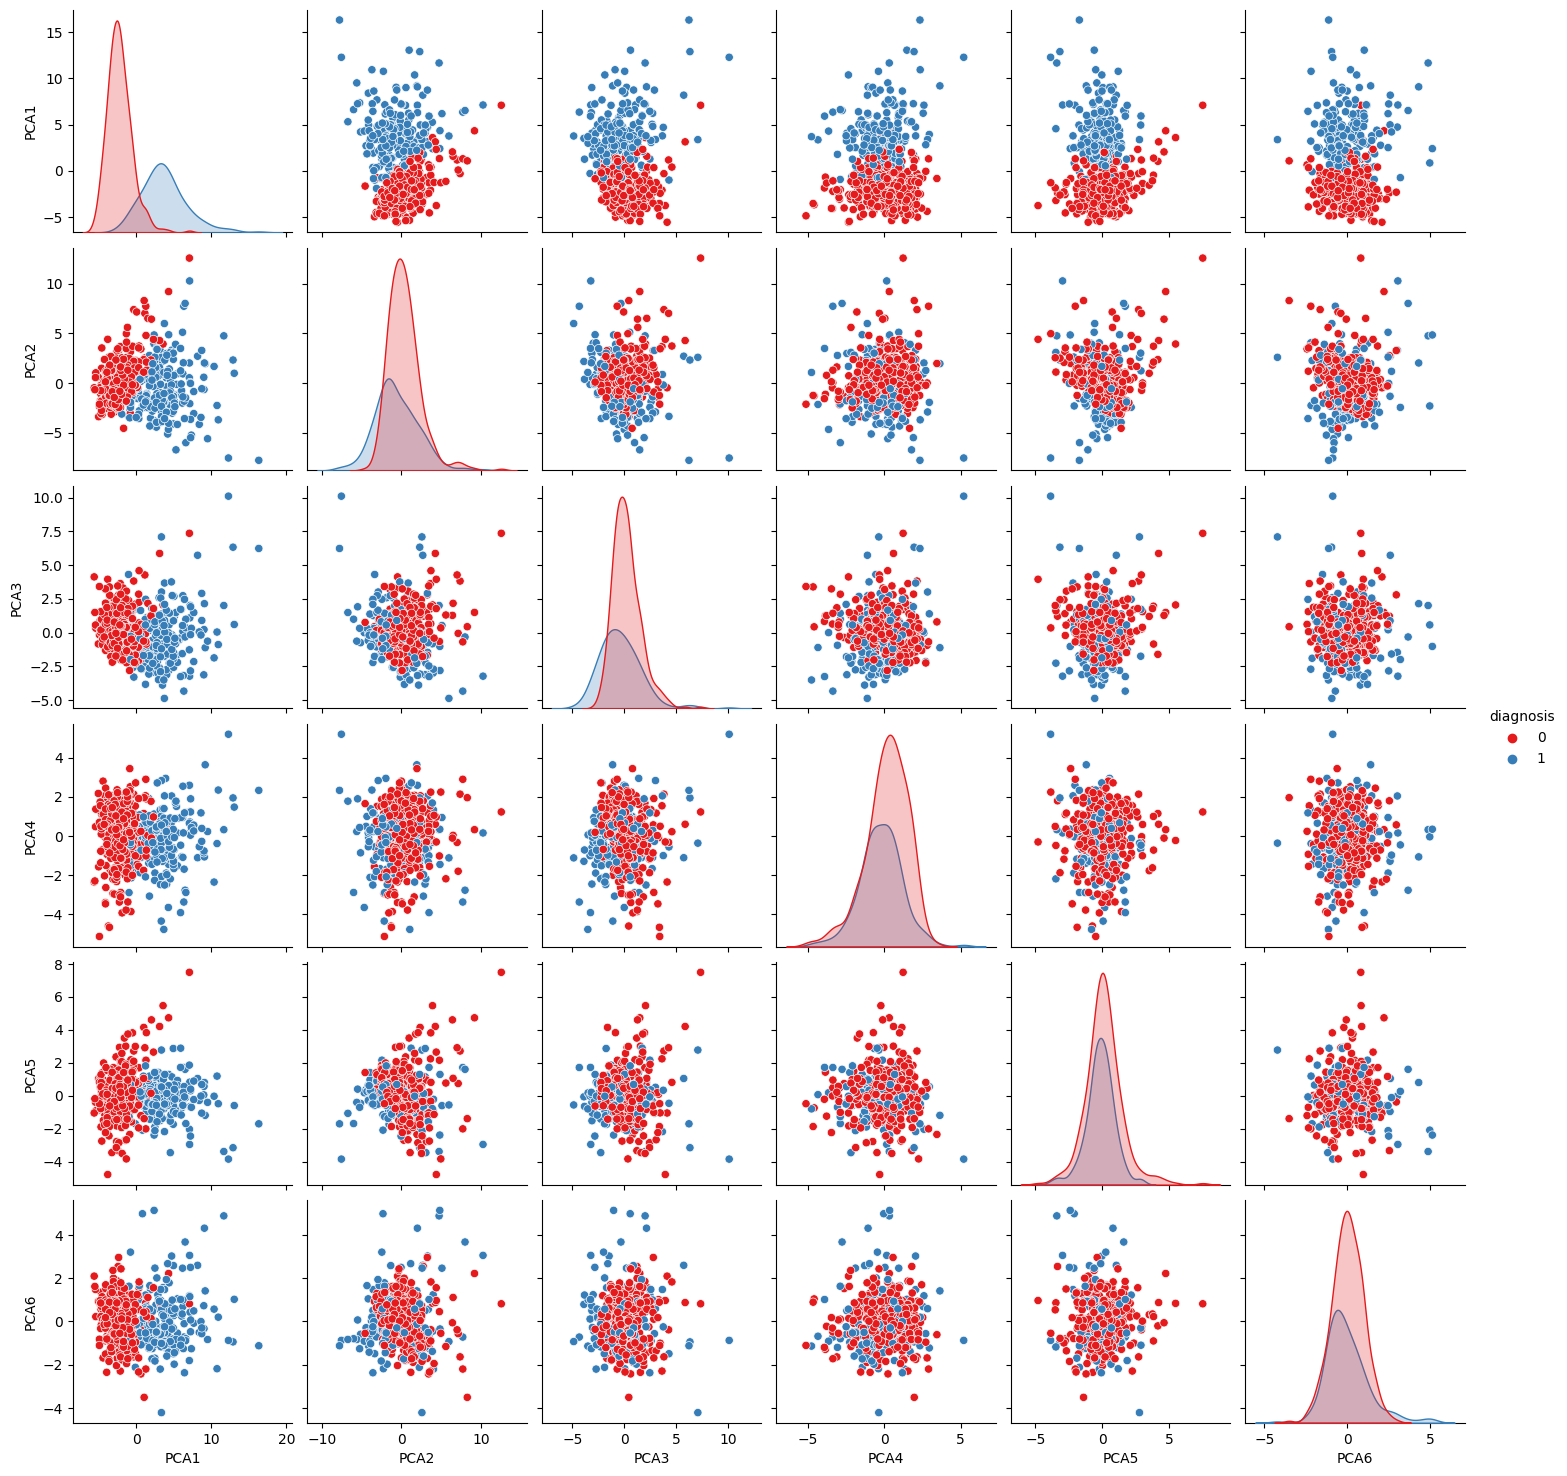

In [25]:
# Añadir la columna 'diagnosis' al DataFrame de PCA para colorear los puntos
df_pca_resultados['diagnosis'] = df['diagnosis'].values

# Crear gráficos de pares de los componentes principales
sns.pairplot(df_pca_resultados, hue='diagnosis', vars=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6'], palette='Set1')
plt.show()


#### Vectores de carga (loadings) en PCA

Los vectores de carga en PCA describen cómo cada característica original contribuye a cada componente principal. Sirven para interpretar los resultados del PCA, ya que nos indican la influencia de cada variable en los componentes(6 en nuesto caso) . Matemáticamente, los loadings se calculan como:

$$ L = V \times \sqrt{\lambda} $$

donde \( L \) son los vectores de carga, \( V \) los vectores propios (o componentes principales), y \( \sqrt{\lambda} \) la raíz cuadrada de los valores propios correspondientes. Estos proporcionan una medida ponderada de la contribución de cada característica a cada componente principal.


Primero se calcularon los vectores de carga (loadings) multiplicando los componentes principales de PCA (`pca.components_`) por la raíz cuadrada de los valores propios (`pca.explained_variance_`). Luego, estos valores se generaron en un DataFrame para facilitar su interpretación y visualización. Cada fila en este DataFrame corresponde a una característica original, y cada columna representa un componente principal. Los valores indican cómo cada característica contribuye al componente correspondiente.




In [26]:
# Calculando los vectores de carga (loadings)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Convirtiendo en un DataFrame para una mejor visualización
loadings_df = pd.DataFrame(loadings, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6'], index=features)

# Mostrar los vectores de carga
print(loadings_df)


                             PCA1      PCA2      PCA3      PCA4      PCA5  \
area_mean                0.806101 -0.551755  0.048220  0.075266  0.013277   
area_se                  0.739987 -0.363638  0.362924  0.152417 -0.163954   
area_worst               0.820238 -0.523759 -0.019998  0.036475 -0.035202   
compactness_mean         0.872817  0.362680 -0.124485  0.044786  0.015042   
compactness_se           0.621527  0.555669  0.260053 -0.038693  0.359803   
compactness_worst        0.766346  0.342865 -0.396643 -0.128644  0.156538   
concave points_mean      0.951490 -0.083016 -0.042951  0.092032 -0.056368   
concave points_se        0.669033  0.311176  0.377459  0.104331  0.251310   
concave points_worst     0.915132 -0.019716 -0.286204  0.008461  0.055689   
concavity_mean           0.942542  0.143660  0.004593  0.026936  0.111006   
concavity_se             0.560234  0.470883  0.296486  0.001855  0.454923   
concavity_worst          0.834453  0.233914 -0.290763 -0.104167  0.242277   

Se definio una función `plot_loadings_heatmap` para visualizar los vectores de carga. Esta función toma los argumentos del DataFrame, un conjunto específico de características (por ejemplo, aquellas que terminan en `_mean`), y un título para el gráfico. La función crea un heatmap donde cada fila corresponde a una característica y cada columna a un componente principal.


In [27]:
def plot_loadings_heatmap(loadings, features, title):
    loadings_subset = loadings.loc[features]
    plt.figure(figsize=(12, 8))
    sns.heatmap(loadings_subset, annot=True, cmap='coolwarm', center=0)
    plt.title(title)
    plt.show()


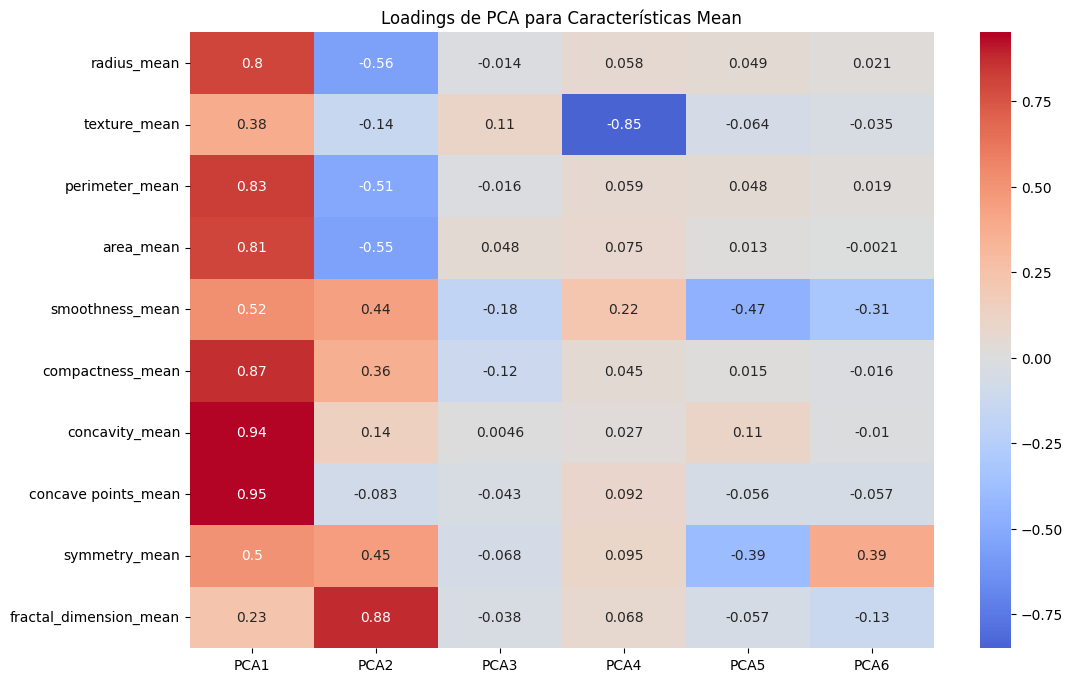

In [28]:
plot_loadings_heatmap(loadings_df, means, 'Loadings de PCA para Características Mean')

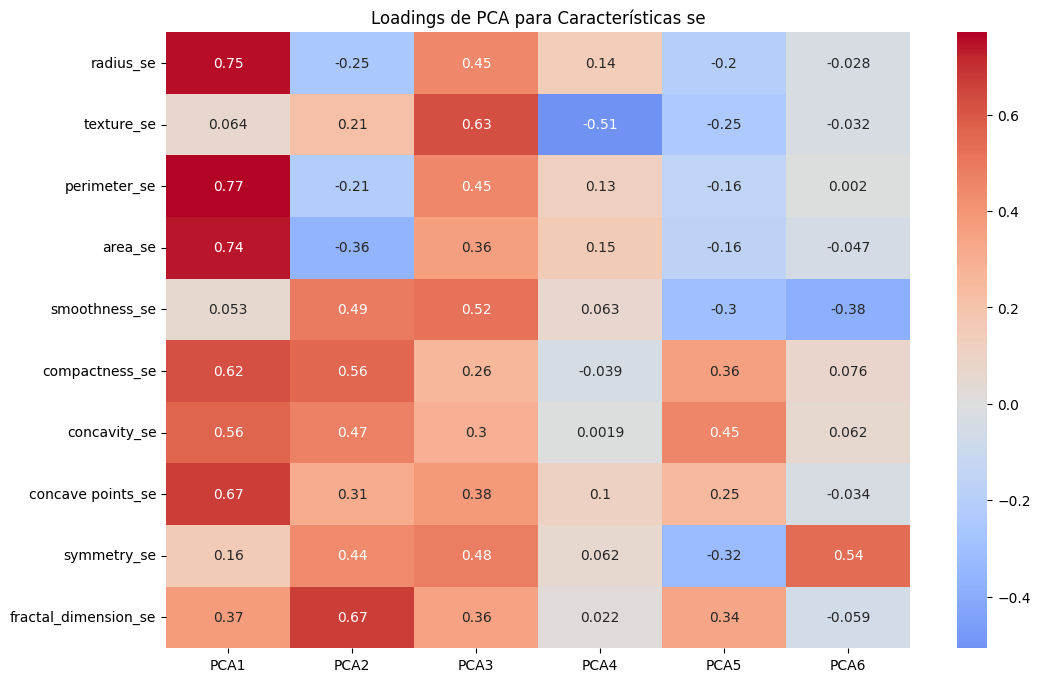

In [29]:
plot_loadings_heatmap(loadings_df, se, 'Loadings de PCA para Características se')

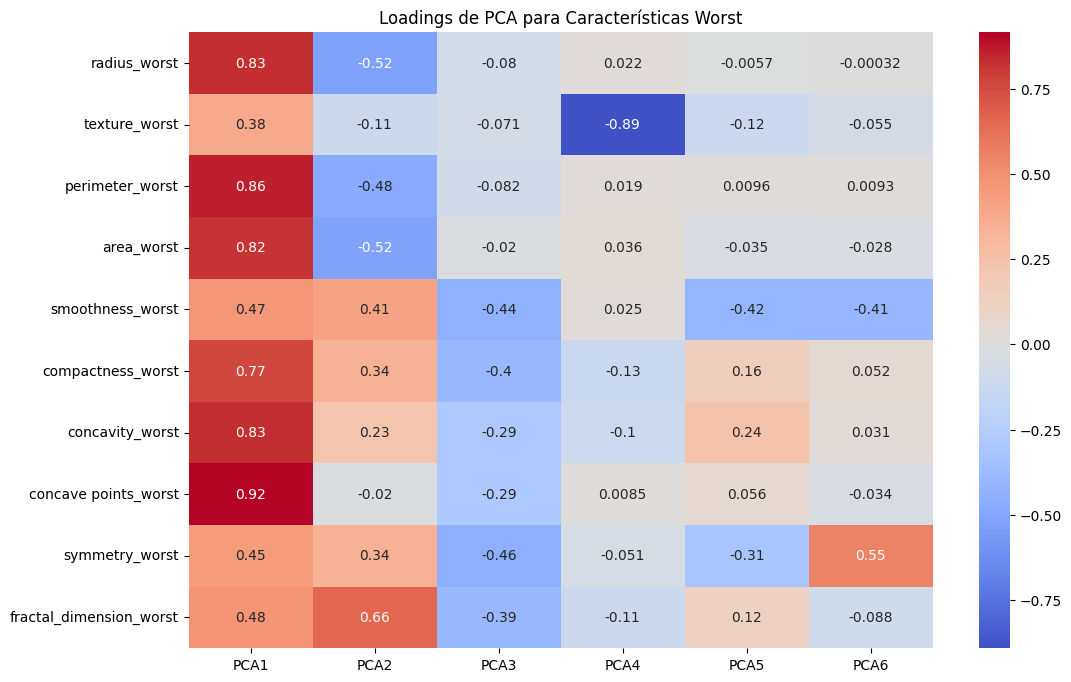

In [30]:
plot_loadings_heatmap(loadings_df, worst, 'Loadings de PCA para Características Worst')

#### Observaciones

Los vectores de carga revelan que características como `area_mean`, `compactness_mean`, y `concave points_mean` tienen una fuerte influencia en los primeros componentes principales. Por otro lado, características como `texture_mean` y `smoothness_mean` muestran una influencia menor. Esta visualización nos ayuda a entender qué aspectos de los datos son más significativos en la variación capturada por los componentes principales. Aunque nada es determinante y se reserva la interpretacion de estas observaciones. 


### Normalización


#### Visualización inicial de las características

Antes de realizar cualquier transformación, hay que entender la distribución original de los datos. Se usaron histogramas para visualizar las distribuciones de diferentes grupos de características (`means`, `se`, `worst`). Los histogramas permiten observar la frecuencia de los valores e identificar características de las distribuciones, como sesgos, picos y la presencia de valores atípicos.

La función `plot_histograms` genera estos para cada característica en grupos de tres por fila, ofreciendo una comparación visual  entre las características. Permitiendo determinar los pasos necesarios en el preprocesamiento y la normalización de los datos.


In [31]:
def plot_histograms(data, features_list, bins=30):
   
    num_plots = len(features_list)
    num_rows = (num_plots + 2) // 3
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    for i, feature in enumerate(features_list):
        sns.histplot(data[feature], bins=bins, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribución de {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frecuencia')

    # Ocultar ejes vacíos si los hay
    for j in range(i + 1, num_rows * 3):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

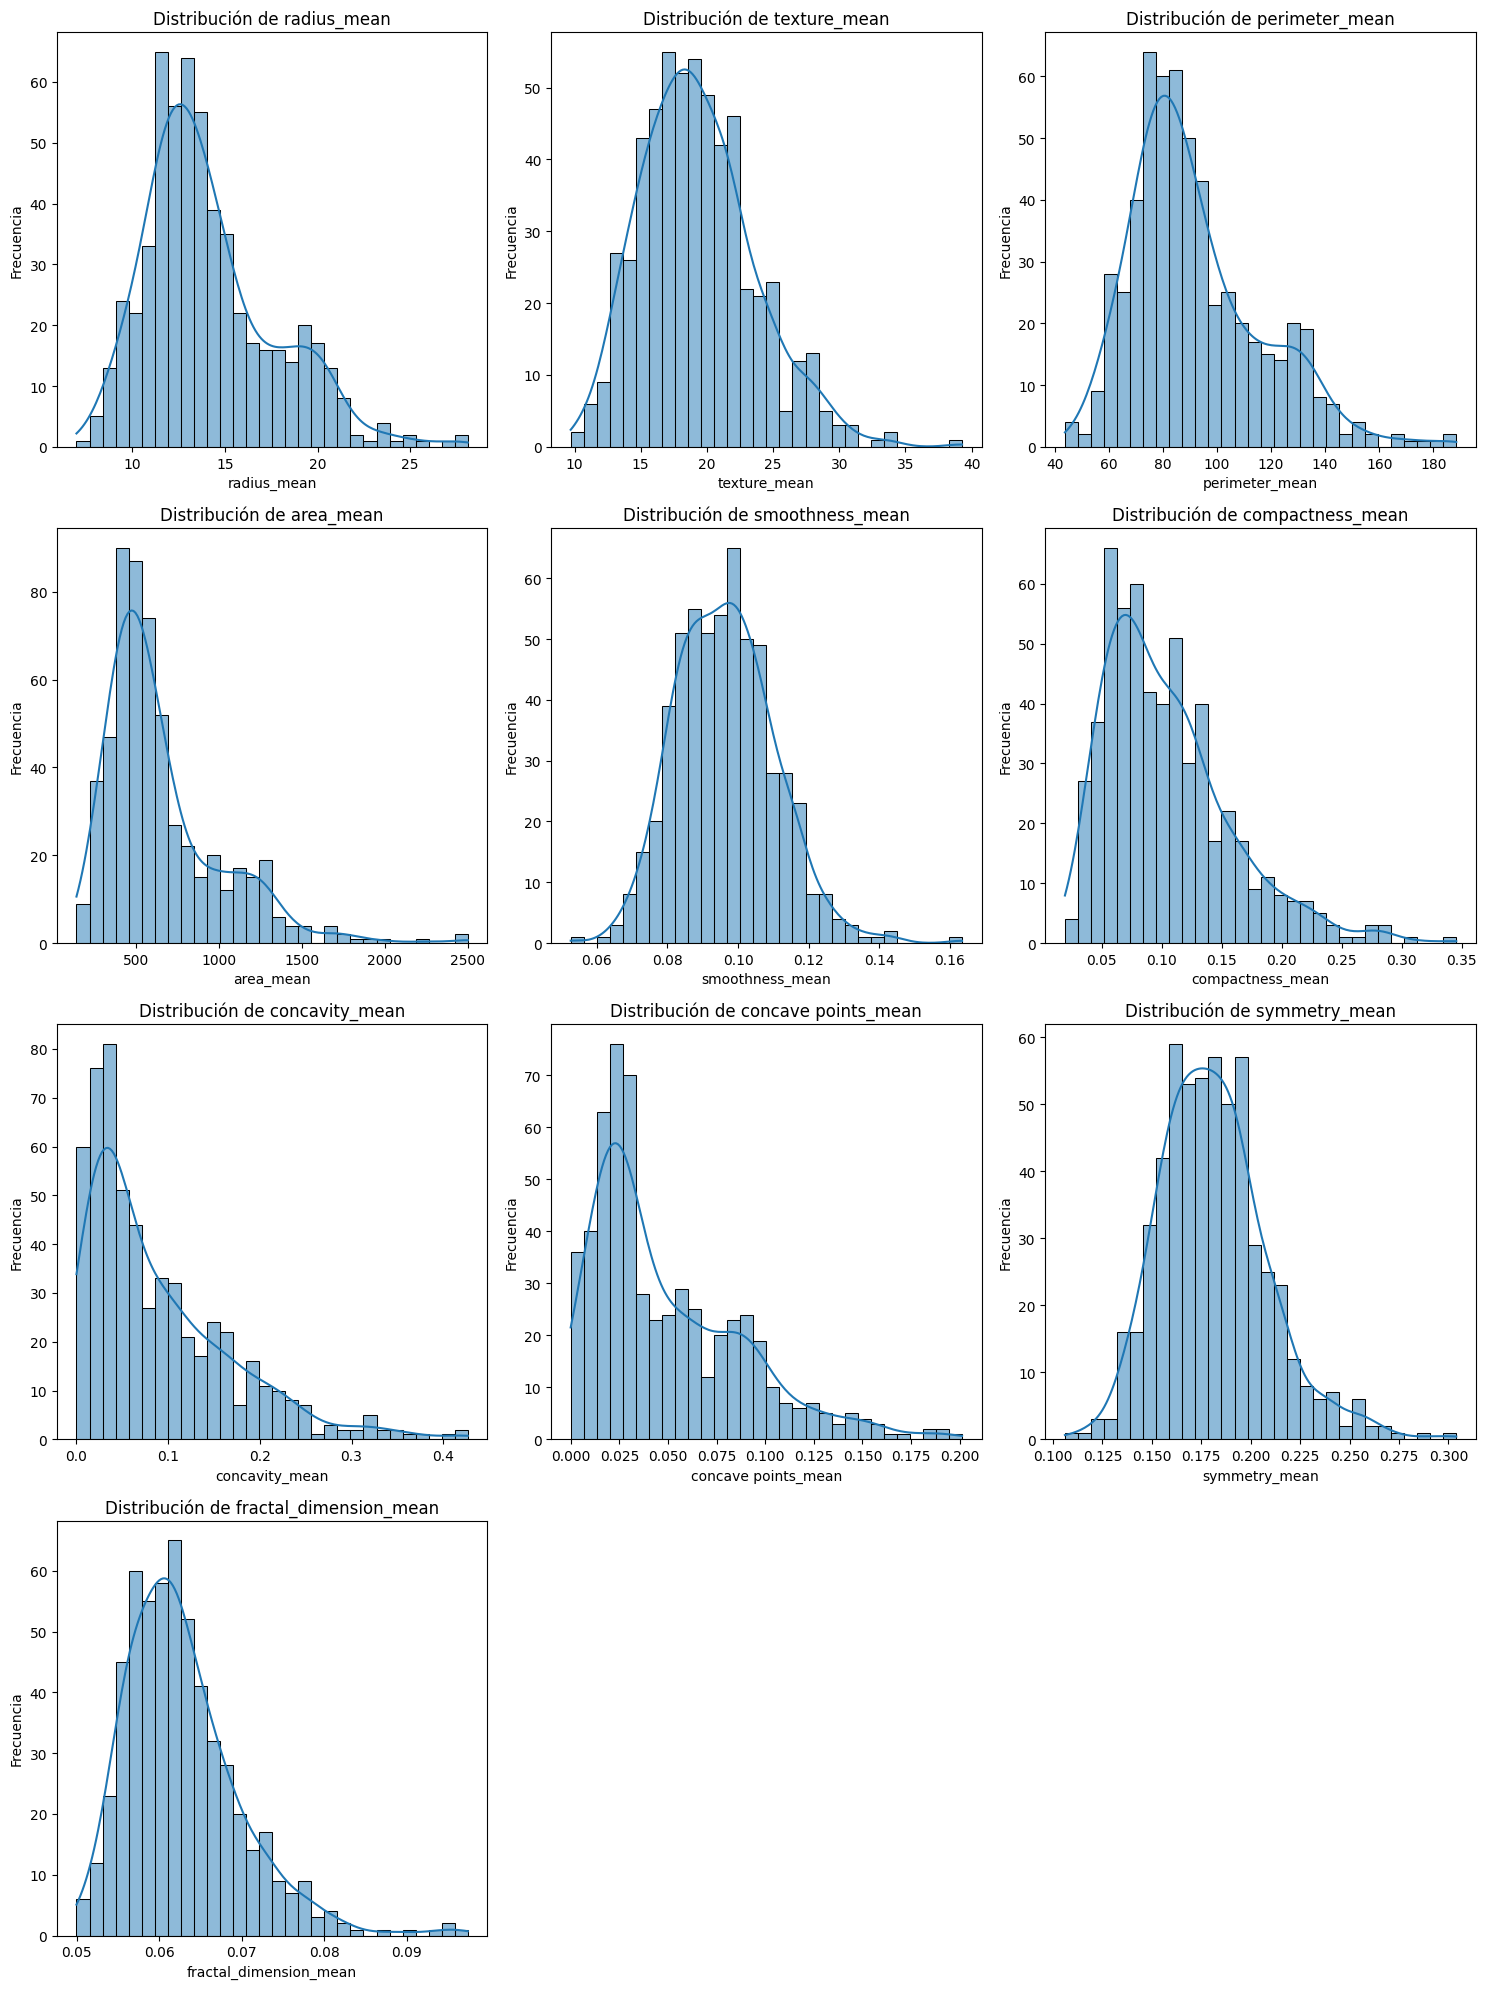

In [32]:
# Se pued reemplazar se, worst para visualizar las 10 caracteristicas correspondientes a esas categorias
plot_histograms(df, means)

#### Transformación logarítmica de los datos

Se observó que muchas características están sesgadas hacia la derecha, lo que sugiere la necesidad de una transformación para normalizar las distribuciones. La transformación logarítmica es una técnica que ayuda a abordar este sesgo.

Se uso una transformación logarítmica a todas las características numéricas, excluyendo la variable categórica 'diagnosis'. Esta transformación se realizó añadiendo un pequeño valor (epsilon) a cada característica para evitar el logaritmo de cero, seguido de la aplicación del logaritmo natural. Después de esta transformación, las características transformadas, almacenadas en `df_transformed`, muestran distribuciones que se aproximan más a la forma gaussiana, lo que se confirma mediante la visualización con histogramas.


In [33]:
# Copiar el DataFrame original para mantener los datos originales intactos
df_transformed = df.copy()

# Lista de características numéricas (excluyendo 'diagnosis')
features_to_transform = df.columns.difference(['diagnosis'])

# Aplicar transformación logarítmica
# Agregar un pequeño valor para evitar el logaritmo de cero
epsilon = 1e-6
for feature in features_to_transform:
    df_transformed[feature] = np.log(df_transformed[feature] + epsilon)


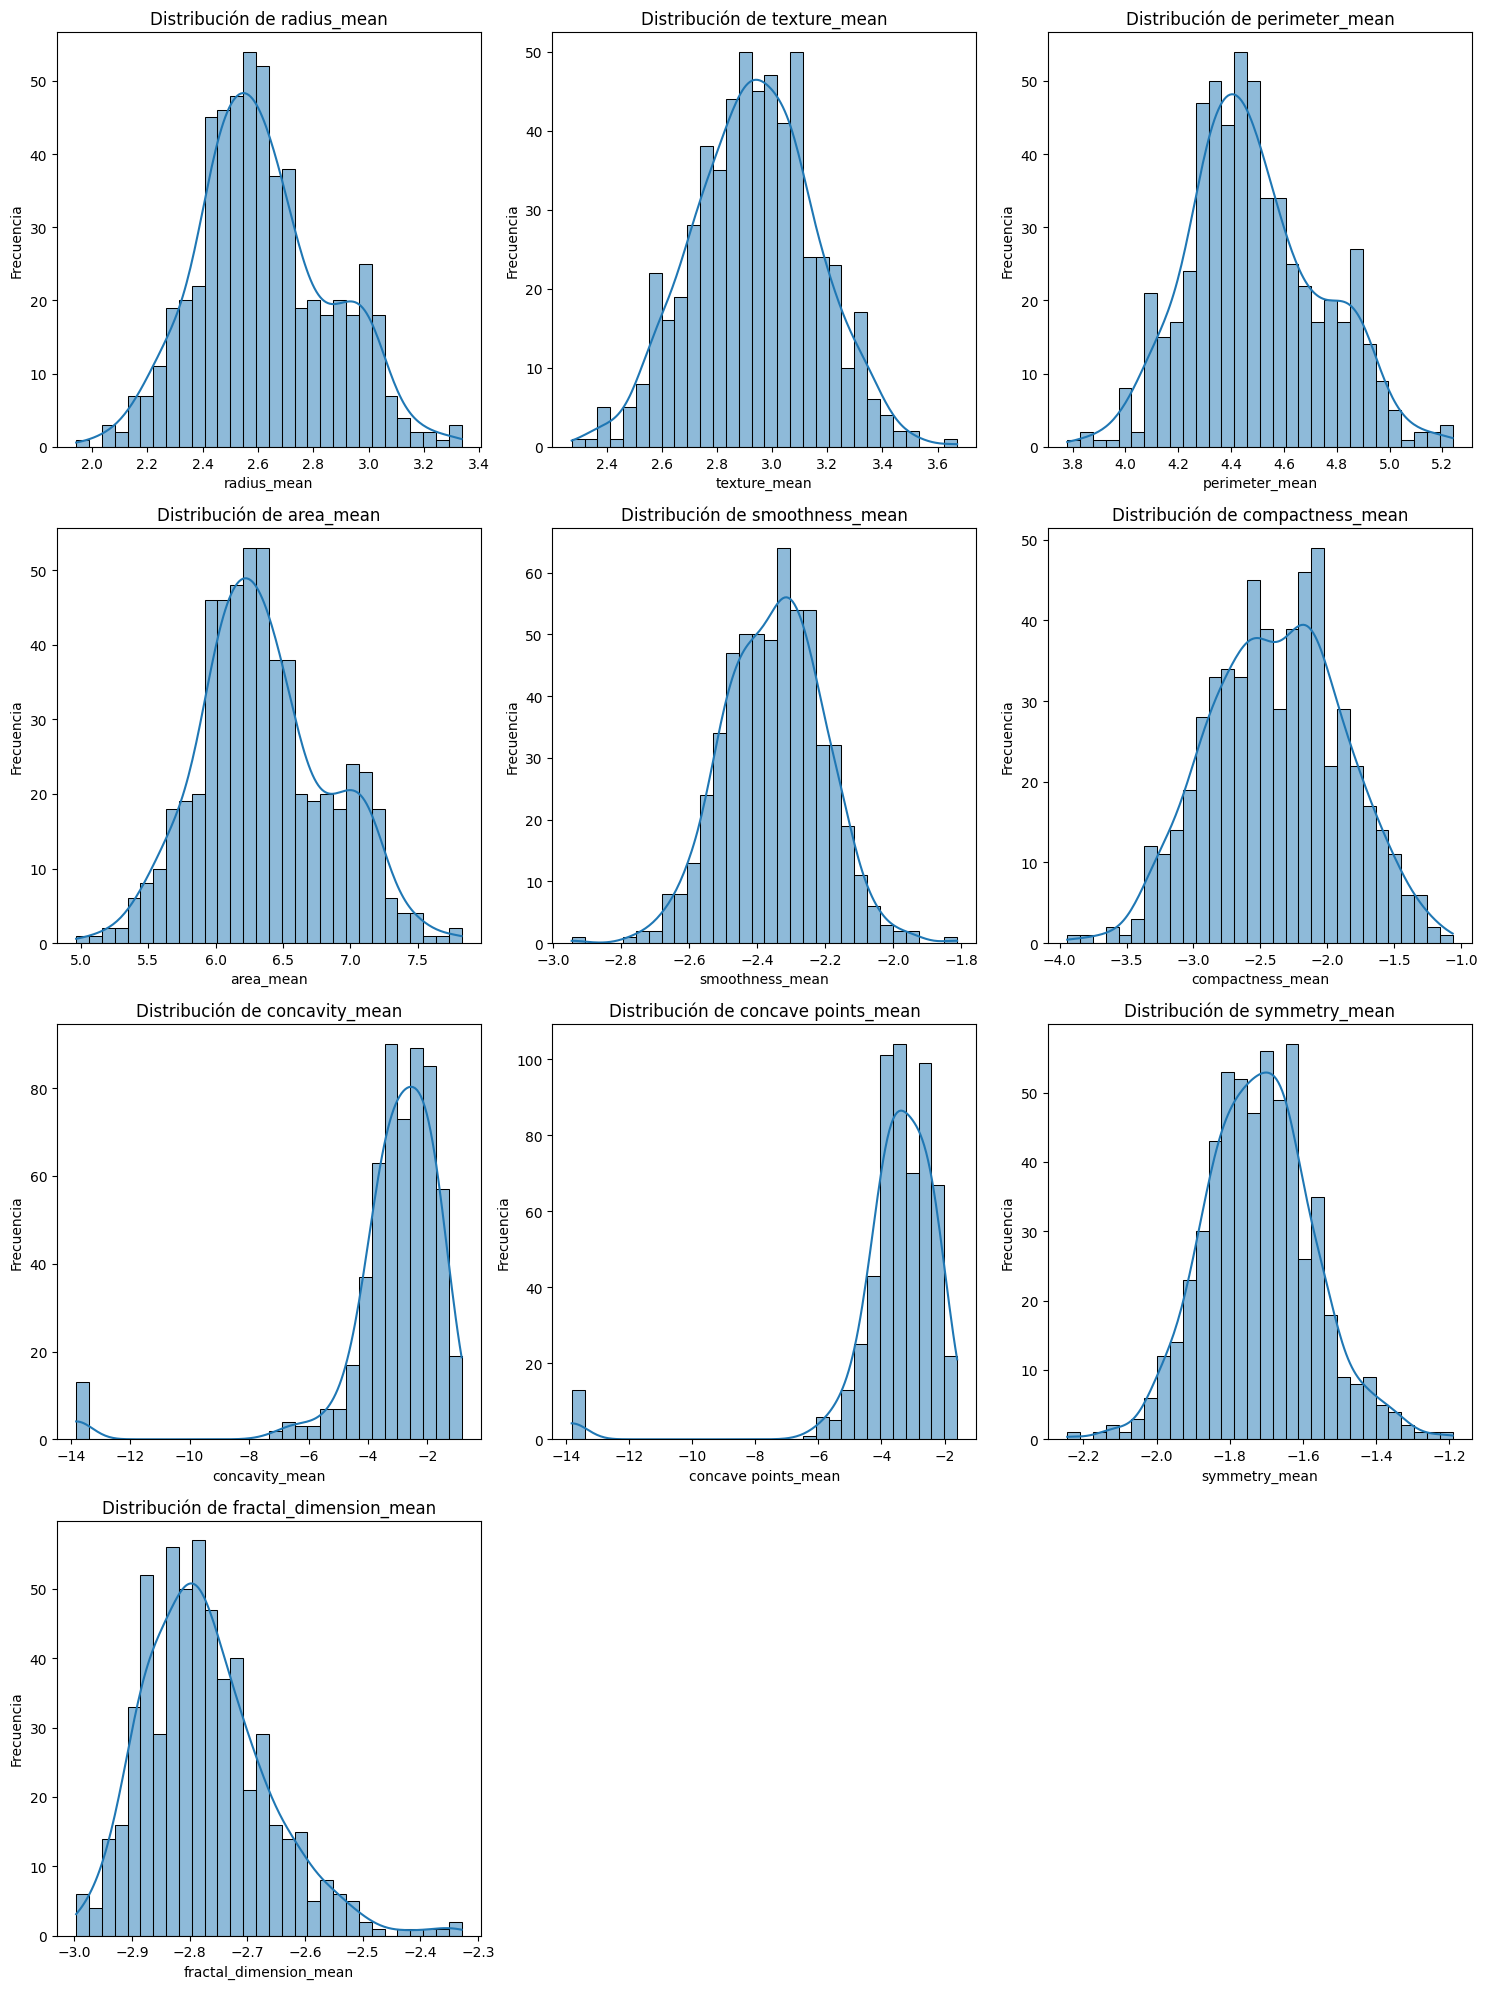

In [34]:
plot_histograms(df_transformed, means)

#### Estandarización de los datos transformados logarítmicamente

Tras la transformación logarítmica, el siguiente paso fue estandarizar los datos para que tengan una media de cero y una desviación estándar de uno. Esto se logra mediante la técnica de normalización Z-score, utilizando `StandardScaler`. La estandarización se usa comunmente en algoritmos de aprendizaje automático, ya que normaliza los datos en una misma escala, permitiendo que cada característica contribuya equitativamente al análisis.

Aplicamos `StandardScaler` a `df_transformed`, excluyendo nuevamente la variable 'diagnosis'. El resultado, almacenado en `df_transformed_scaled`, contiene las características que han sido transformadas logarítmicamente y luego estandarizadas. Las visualizaciones finales con histogramas muestran cómo esta normalización Z-score afecta las distribuciones de las características.


In [35]:
# Crear el objeto StandardScaler
scaler = StandardScaler()

# Seleccionar solo características numéricas para la estandarización
features_to_scale = df_transformed.columns.difference(['diagnosis']) 

# Ajustar y transformar los datos
df_transformed_scaled = scaler.fit_transform(df_transformed[features_to_scale])

# Convertir de nuevo a un DataFrame y mantener los nombres de las características
df_transformed_scaled = pd.DataFrame(df_transformed_scaled, columns=features_to_scale)

# Ahora df_transformed_scaled contiene los datos transformados logarítmicamente y estandarizados


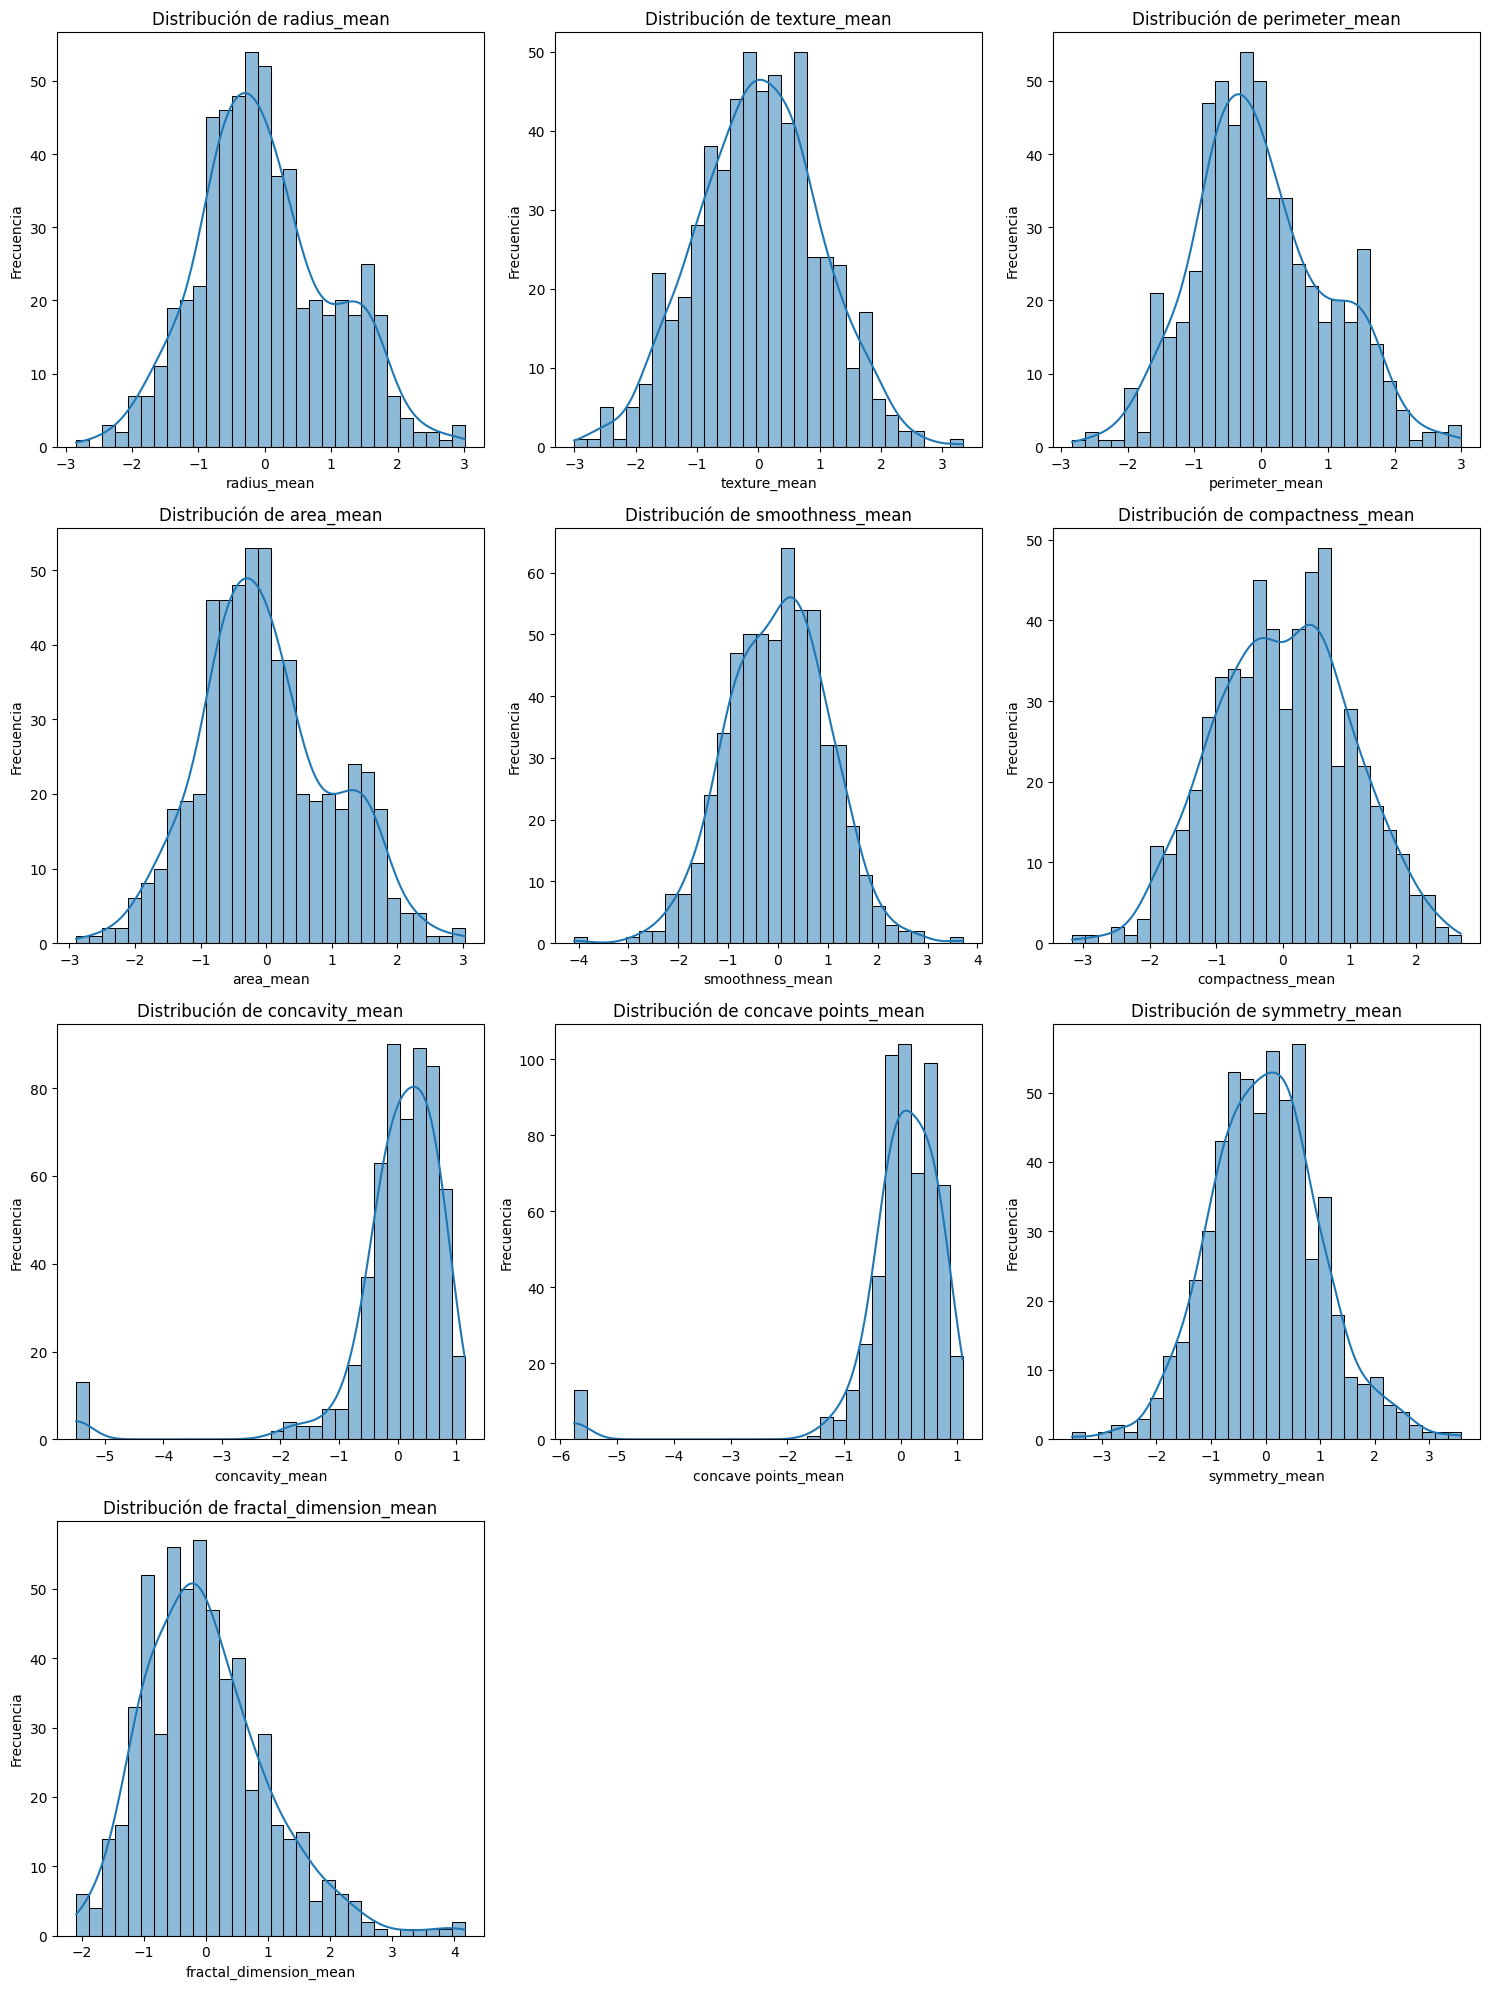

In [36]:
plot_histograms(df_transformed_scaled, means)

### Preparación de datos para modelos de machine learning

En esta sección se prepararó el terreno para el entrenamiento de los modelos de aprendizaje automatico, del EDA se concluye que las caracteristicas`_worst ` son redundantes ya que estas tres caracteristicas "peores" o "maximas" ya fueron consideradas en las caracteristicas promedio `_mean` y los errores estandar `_se`. 

Tambien, se consideró eliminar especificamente las caracteristicas `perimeter_mean`, `area_mean`, `perimeter_se` `area_se` ya que que estas variables estan fuertemente correlacionadas con el radio y asi evitar sobreajustes en los modelos de aprendizaje automatico

Este nuevo conjunto de datos `df_reduced` contara con 17 columnas, que consta 16 variables numericas y la variable categorica objetivo. Este conjunto parte del `df` original unicamente con la variable categorica codificada y la eliminacion de valores nulos asi como la columna `id`.

In [37]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         1        17.99         10.38          122.80     1001.0   
1         1        20.57         17.77          132.90     1326.0   
2         1        19.69         21.25          130.00     1203.0   
3         1        11.42         20.38           77.58      386.1   
4         1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [38]:
# Lista de columnas para eliminar
columns_to_remove = [col for col in df.columns if '_worst' in col or col in ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se']]

# Eliminar las columnas seleccionadas
df_model_reduced = df.drop(columns=columns_to_remove)




In [39]:
df_model_reduced.head()

diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0         1        17.99         10.38          0.11840           0.27760   
1         1        20.57         17.77          0.08474           0.07864   
2         1        19.69         21.25          0.10960           0.15990   
3         1        11.42         20.38          0.14250           0.28390   
4         1        20.29         14.34          0.10030           0.13280   

   concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  \
0          0.3001              0.14710         0.2419                 0.07871   
1          0.0869              0.07017         0.1812                 0.05667   
2          0.1974              0.12790         0.2069                 0.05999   
3          0.2414              0.10520         0.2597                 0.09744   
4          0.1980              0.10430         0.1809                 0.05883   

   radius_se  texture_se  smoothness_se  compactness_se  concavity_se  \
0     1.0950      0.9053       0.006399         0.04904       0.05373   
1     0.5435      0.7339       0.005225         0.01308       0.01860   
2     0.7456      0.7869       0.006150         0.04006       0.03832   
3     0.4956      1.1560       0.009110         0.07458       0.05661   
4     0.7572      0.7813       0.011490         0.02461       0.05688   

   concave points_se  symmetry_se  fractal_dimension_se  
0            0.01587      0.03003              0.006193  
1            0.01340      0.01389              0.003532  
2            0.02058      0.02250              0.004571  
3            0.01867      0.05963              0.009208  
4            0.01885      0.01756              0.005115

Se preparo otro conjunto de datos obtenido de el analisis PCA, este conjunto se realizo implicitamente en la seccion correspondiente a PCA en donde al conjunto original previo a la aplicacion de PCA se normalizaron las caracteristica con la clase `StandardScaler`. De aqui se redujo con PCA de 30 variables numerica a unicamente 6 que en conjunto suman cerca del 90% de la varianza, a este conjunto lo nombramos `df_modelo_pca`

In [40]:
df_model_pca = df_pca_resultados.copy()
df_model_pca.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   PCA1       569 non-null    float64 
 1   PCA2       569 non-null    float64 
 2   PCA3       569 non-null    float64 
 3   PCA4       569 non-null    float64 
 4   PCA5       569 non-null    float64 
 5   PCA6       569 non-null    float64 
 6   diagnosis  569 non-null    category
dtypes: category(1), float64(6)
memory usage: 27.5 KB


La transformacion logaritmica se usa a menudo para datos sesgados a una forma mas gaussiana, se entrenaran modelos con un conjunto usando este enfoque. `df_model_log_scaled.head()`.

In [41]:
# Crear una copia del DataFrame
df_model_log_scaled = df_model_reduced.copy()

# Aplicar la transformación logarítmica a las características numéricas
features_to_scale = df_model_log_scaled.columns.difference(['diagnosis'])
epsilon = 1e-6  # Se asigna un valor pequeño para evitar el logaritmo de cero

for feature in features_to_scale:
    df_model_log_scaled[feature] = np.log(df_model_log_scaled[feature] + epsilon)




In [42]:
df_model_log_scaled.head()

diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0         1     2.889816      2.339881        -2.133678         -1.281570   
1         1     3.023834      2.877512        -2.468156         -2.542862   
2         1     2.980111      3.056357        -2.210909         -1.833200   
3         1     2.435366      3.014554        -1.948406         -1.259130   
4         1     3.010128      2.663053        -2.299580         -2.018904   

   concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  \
0       -1.203636            -1.916636      -1.419227               -2.541972   
1       -2.442986            -2.656820      -1.708148               -2.870493   
2       -1.622518            -2.056499      -1.575515               -2.813561   
3       -1.421296            -2.251882      -1.348224               -2.328508   
4       -1.619483            -2.260474      -1.709805               -2.833086   

   radius_se  texture_se  smoothness_se  compactness_se  concavity_se  \
0   0.090755   -0.099488      -5.051457       -3.015099     -2.923765   
1  -0.609724   -0.309381      -5.254109       -4.336594     -3.984540   
2  -0.293565   -0.239653      -5.091141       -3.217352     -3.261757   
3  -0.701984    0.144967      -4.698273       -2.595869     -2.871552   
4  -0.278127   -0.246795      -4.466191       -3.704562     -2.866794   

   concave points_se  symmetry_se  fractal_dimension_se  
0          -4.143262    -3.505525             -5.084174  
1          -4.312426    -4.276514             -5.645608  
2          -3.883387    -3.794196             -5.387805  
3          -3.980784    -2.819580             -4.687574  
4          -3.971189    -4.042075             -5.275382

Tambien se generó un conjunto con datos normalizados, este conjunto se obtiene del conjunto original reducido y el nombre asignado es `df_model_standardized.`

In [43]:
# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Excluyendo la variable categórica 'diagnosis'
features_to_normalize = df_model_reduced.columns.difference(['diagnosis'])

# Aplicar la normalización Z-score
df_model_standardized = scaler.fit_transform(df_model_reduced[features_to_normalize])

# Convertir el resultado a DataFrame y mantener los nombres de las columnas
df_model_standardized = pd.DataFrame(df_model_standardized, columns=features_to_normalize, index=df_model_reduced.index)

# Combinar la columna de 'diagnosis' de vuelta al DataFrame
if 'diagnosis' in df_model_reduced.columns:
    df_model_standardized = pd.concat([df_model_standardized, df_model_reduced[['diagnosis']]], axis=1)


In [44]:
df_model_standardized.head()


compactness_mean  compactness_se  concave points_mean  concave points_se  \
0          3.283515        1.316862             2.532475           0.660820   
1         -0.487072       -0.692926             0.548144           0.260162   
2          1.052926        0.814974             2.037231           1.424827   
3          3.402909        2.744280             1.451707           1.115007   
4          0.539340       -0.048520             1.428493           1.144205   

   concavity_mean  concavity_se  fractal_dimension_mean  fractal_dimension_se  \
0        2.652874      0.724026                2.255747              0.907083   
1       -0.023846     -0.440780               -0.868652             -0.099444   
2        1.363478      0.213076               -0.398008              0.293559   
3        1.915897      0.819518                4.910919              2.047511   
4        1.371011      0.828471               -0.562450              0.499328   

   radius_mean  radius_se  smoothness_mean  smoothness_se  symmetry_mean  \
0     1.097064   2.489734         1.568466      -0.214002       2.217515   
1     1.829821   0.499255        -0.826962      -0.605351       0.001392   
2     1.579888   1.228676         0.942210      -0.297005       0.939685   
3    -0.768909   0.326373         3.283553       0.689702       2.867383   
4     1.750297   1.270543         0.280372       1.483067      -0.009560   

   symmetry_se  texture_mean  texture_se diagnosis  
0     1.148757     -2.073335   -0.565265         1  
1    -0.805450     -0.353632   -0.876244         1  
2     0.237036      0.456187   -0.780083         1  
3     4.732680      0.253732   -0.110409         1  
4    -0.361092     -1.151816   -0.790244         1

#### Resumen sobre los conjuntos de datos

Se han preparado cuatro conjuntos de datos distintos, cada uno adaptado a las necesidades específicas de diferentes modelos de aprendizaje automático. Estos conjuntos son:

1. **`df_model_reduced`**:
   - Este conjunto de datos se ha reducido eliminando características altamente correlacionadas y las columnas "_worst".
   - Será utilizado para entrenar Árboles de Decisión y Bosques Aleatorios, ya que estos modelos manejan bien los datos no escalados y son robustos a la presencia de valores atípicos.

2. **`df_model_pca`**:
   - Contiene los resultados de un Análisis de Componentes Principales (PCA), que reduce la dimensionalidad de los datos y destaca sus relaciones más significativas.
   - Ideal para Regresión Logística, KNN y SVM, donde la reducción de la dimensionalidad puede mejorar el rendimiento y proporcionar insights más claros.

3. **`df_model_standardized`**:
   - Este conjunto ha sido estandarizado usando `StandardScaler` para tener una media de cero y una desviación estándar de uno.
   - Es esencial para modelos como Regresión Logística, KNN, SVM y Redes Neuronales, donde la normalización de los datos es crucial para el entrenamiento y la eficiencia del modelo.

4. **`df_model_log_scaled`**:
   - Aquí, hemos aplicado una transformación logarítmica para reducir el sesgo en las distribuciones y estabilizar la varianza.
   - Será utilizado para Regresión Logística y KNN para explorar cómo la transformación logarítmica puede afectar el rendimiento del modelo en comparación con la estandarización y PCA.

La elección de estos cuatro conjuntos de datos permite una comparación detallada del rendimiento de los modelos bajo diferentes transformaciones, ofreciendo una comprensión más profunda de cómo las técnicas de preprocesamiento pueden impactar en los resultados del aprendizaje automático.


## Implementación de modelos de aprendizaje automático


### Árboles de decisión


#### Entrenamiento y evaluación del modelo de árbol de decisión

En esta sección, entrenamos un modelo de árbol de decisión utilizando el conjunto de datos `df_model_reduced`, el cual ya ha sido preparado previamente. Nuestro objetivo es clasificar las observaciones en dos categorías: 'Benigno' y 'Maligno', basándonos en varias características del conjunto de datos.

El proceso se divide en los siguientes pasos:
1. **Separación de Características y Etiqueta**: Separamos el conjunto de datos en características (X) y la etiqueta objetivo (y), donde la etiqueta es el diagnóstico de 'Benigno' o 'Maligno'.
2. **División en Conjuntos de Entrenamiento y Prueba**: Dividimos los datos en un conjunto de entrenamiento y otro de prueba para validar el rendimiento del modelo.
3. **Entrenamiento del Modelo**: Utilizamos el algoritmo de árbol de decisión para entrenar el modelo con el conjunto de entrenamiento.
4. **Evaluación del Modelo**: Evaluamos el rendimiento del modelo en el conjunto de prueba utilizando la matriz de confusión y el reporte de clasificación que incluye métricas como precisión, recall, f1-score y accuracy.



In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df_model_reduced.drop('diagnosis', axis=1)
y = df_model_reduced['diagnosis']

# Dividiendo los datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creando el modelo de árbol de decisión
decision_tree_model = DecisionTreeClassifier()

# Entrenando el modelo
decision_tree_model.fit(X_train, y_train)

# Prediciendo sobre el conjunto de prueba
y_pred = decision_tree_model.predict(X_test)

# Evaluando el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[68  3]
 [ 3 40]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### Interpretación de los resultados del modelo de árbol de decisión


  Tras entrenar y evaluar el modelo de árbol de decisión, de la matriz de confusión se obtiene: 
  
 - **Verdaderos Negativos (VN)**: 66 (Benignos correctamente identificados)
 - **Falsos Positivos (FP)**: 4 (Malignos incorrectamente identificados como Benignos)
 - **Falsos Negativos (FN)**: 5 (Benignos incorrectamente identificados como Malignos)
 - **Verdaderos Positivos (VP)**: 39 (Malignos correctamente identificados)

#### Observaciones

El modelo muestra una  precisión global (92%), indicando una buena capacidad general de clasificación. La precisión y el recall son altos para ambas clases, lo que sugiere que el modelo es efectivo tanto en identificar casos Benignos como Malignos. 


#### Optimización de parámetros del modelo de árbol de decisión con GridSearchCV

Para mejorar el rendimiento del modelo de árbol de decisión, se pueden optimizar sus parámetros utilizando `GridSearchCV`. Esta técnica realiza una búsqueda exhaustiva sobre una cuadrícula de parámetros especificados y utiliza la validación cruzada para encontrar la combinación óptima. Los parámetros que se ajustaron incluyen:

- `criterion`: El criterio utilizado para medir la calidad de una división.
- `max_depth`: La profundidad máxima del árbol.
- `min_samples_split`: El número mínimo de muestras necesarias para dividir un nodo interno.
- `min_samples_leaf`: El número mínimo de muestras necesarias para estar en un nodo hoja.



In [46]:
from sklearn.model_selection import GridSearchCV

# Configurando la cuadrícula de parámetros para probar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creando el modelo de árbol de decisión
dtree = DecisionTreeClassifier()

# Configurando GridSearchCV
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Ajustando GridSearchCV en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Mejores parámetros encontrados
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

# Creando un nuevo modelo con los mejores parámetros
best_dtree = DecisionTreeClassifier(**best_params)
best_dtree.fit(X_train, y_train)

# Evaluando el modelo
y_pred = best_dtree.predict(X_test)
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Mejores parámetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Matriz de Confusión:
[[69  2]
 [ 3 40]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#### Resultados de la optimización con GridSearchCV

Tras aplicar `GridSearchCV`, los mejores parámetros encontrados para el modelo son:
- Criterio: `entropy`
- Profundidad Máxima: `30`
- Mínimo de Muestras para Dividir: `10`
- Mínimo de Muestras en Nodo Hoja: `4`

Estos parámetros indican que el mejor modelo utiliza el criterio de entropía, con un árbol de profundidad moderada y restricciones en el número mínimo de muestras para divisiones y nodos hoja.

#### Evaluación del modelo optimizado

- **Matriz de Confusión**:
  $$
  \begin{bmatrix}
  69 & 2 \\
  3 & 40 \\
  \end{bmatrix}
  $$
  La matriz muestra un alto número de verdaderos positivos y verdaderos negativos con una reducción en los falsos positivos y falsos negativos en comparación con el modelo inicial.

- **Reporte de Clasificación**:
  - Precisión para Benigno: $ \frac{69}{69 + 3} = 0.96 $
  - Precisión para Maligno: $ \frac{40}{40 + 2} = 0.95 $
  - Recall para Benigno: $ \frac{69}{69 + 2} = 0.97 $
  - Recall para Maligno: $ \frac{40}{40 + 3} = 0.93 $
  - F1-score para Benigno: 0.97
  - F1-score para Maligno: 0.94
  - Precisión Global: 96%

#### Observaciones del modelo optimizado

La optimización de parámetros mejoro la precisión y el equilibrio del modelo. La precisión global del 96% y las mejoras en las métricas para cada clase indican que el modelo optimizado es más eficaz y confiable para la clasificación de tumores como Benignos o Malignos. La elección del criterio de 'entropía' y la limitación de la profundidad del árbol han contribuido a un modelo más generalizable y preciso.


#### Análisis de la importancia de las características

Después de optimizar el modelo de árbol de decisión, se analizo la importancia de cada característica para comprender mejor qué factores son más influyentes en la predicción del diagnóstico de tumores como benignos o malignos. Con el uso del atributo `feature_importances_` del modelo optimizado para obtener las importancias y se muestran estos datos en un gráfico de barras para una interpretación más clara.


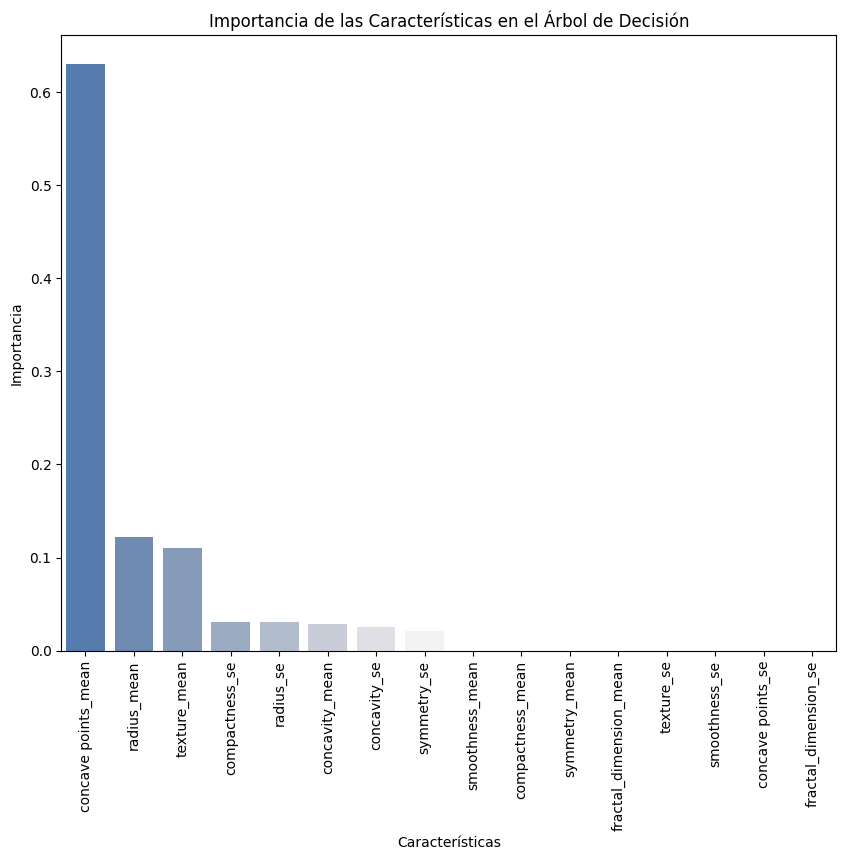

Feature  Importance
5      concave points_mean    0.630338
0              radius_mean    0.121646
1             texture_mean    0.110684
11          compactness_se    0.031167
8                radius_se    0.031163
4           concavity_mean    0.028211
12            concavity_se    0.025440
14             symmetry_se    0.021351
2          smoothness_mean    0.000000
3         compactness_mean    0.000000
6            symmetry_mean    0.000000
7   fractal_dimension_mean    0.000000
9               texture_se    0.000000
10           smoothness_se    0.000000
13       concave points_se    0.000000
15    fractal_dimension_se    0.000000

In [47]:
feature_importances = best_dtree.feature_importances_
feature_names = X_train.columns

# Creando un DataFrame para facilitar la visualización
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Ordenando el DataFrame por importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Creando el gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(y='Importance', x='Feature', data=importances_df, palette="vlag")

# Añadiendo títulos y etiquetas
plt.title('Importancia de las Características en el Árbol de Decisión')
plt.ylabel('Importancia')
plt.xlabel('Características')

# Mejorando la visualización de las etiquetas del eje X
plt.xticks(rotation=90)

# Mostrando el gráfico
plt.show()

importances_df

#### Interpretación de la importancia de las características

La visualización de la importancia de las características revela los siguientes puntos clave:

- **Concave points mean** tiene la mayor importancia con un valor de $0.630338$. Esto indica que la media de los puntos cóncavos en las células es el factor más determinante en la clasificación de los tumores.
- **Radius mean** y **Texture mean** también son importantes, con valores de $0.121646$ y $0.105562$ respectivamente. Estos se refieren al tamaño medio del radio de las células y a la textura de estas.
- Otras características como **Compactness se**, **Radius se**, y **Concavity se** tienen una importancia moderada, lo que sugiere que también contribuyen a las decisiones del modelo, pero en menor medida.
- Varias características tienen una importancia de cero, lo que implica que no influyen en la clasificación del modelo. Esto incluye características como **Compactness mean**, **Symmetry mean**, **Fractal dimension mean**, entre otras.


Se sugiere desde que la prominencia de características como los "concave points mean" en el modelo refleja su relevancia en la evaluación clínica de biopsias mamarias. En la práctica médica, la presencia de puntos cóncavos notables y una textura irregular en las células podrían ser indicativos de un crecimiento maligno.

#### Visualización del árbol de decisión

La visualización del árbol de decisión  proporciona una representación gráfica de cómo el modelo toma decisiones basadas en las diferentes características.


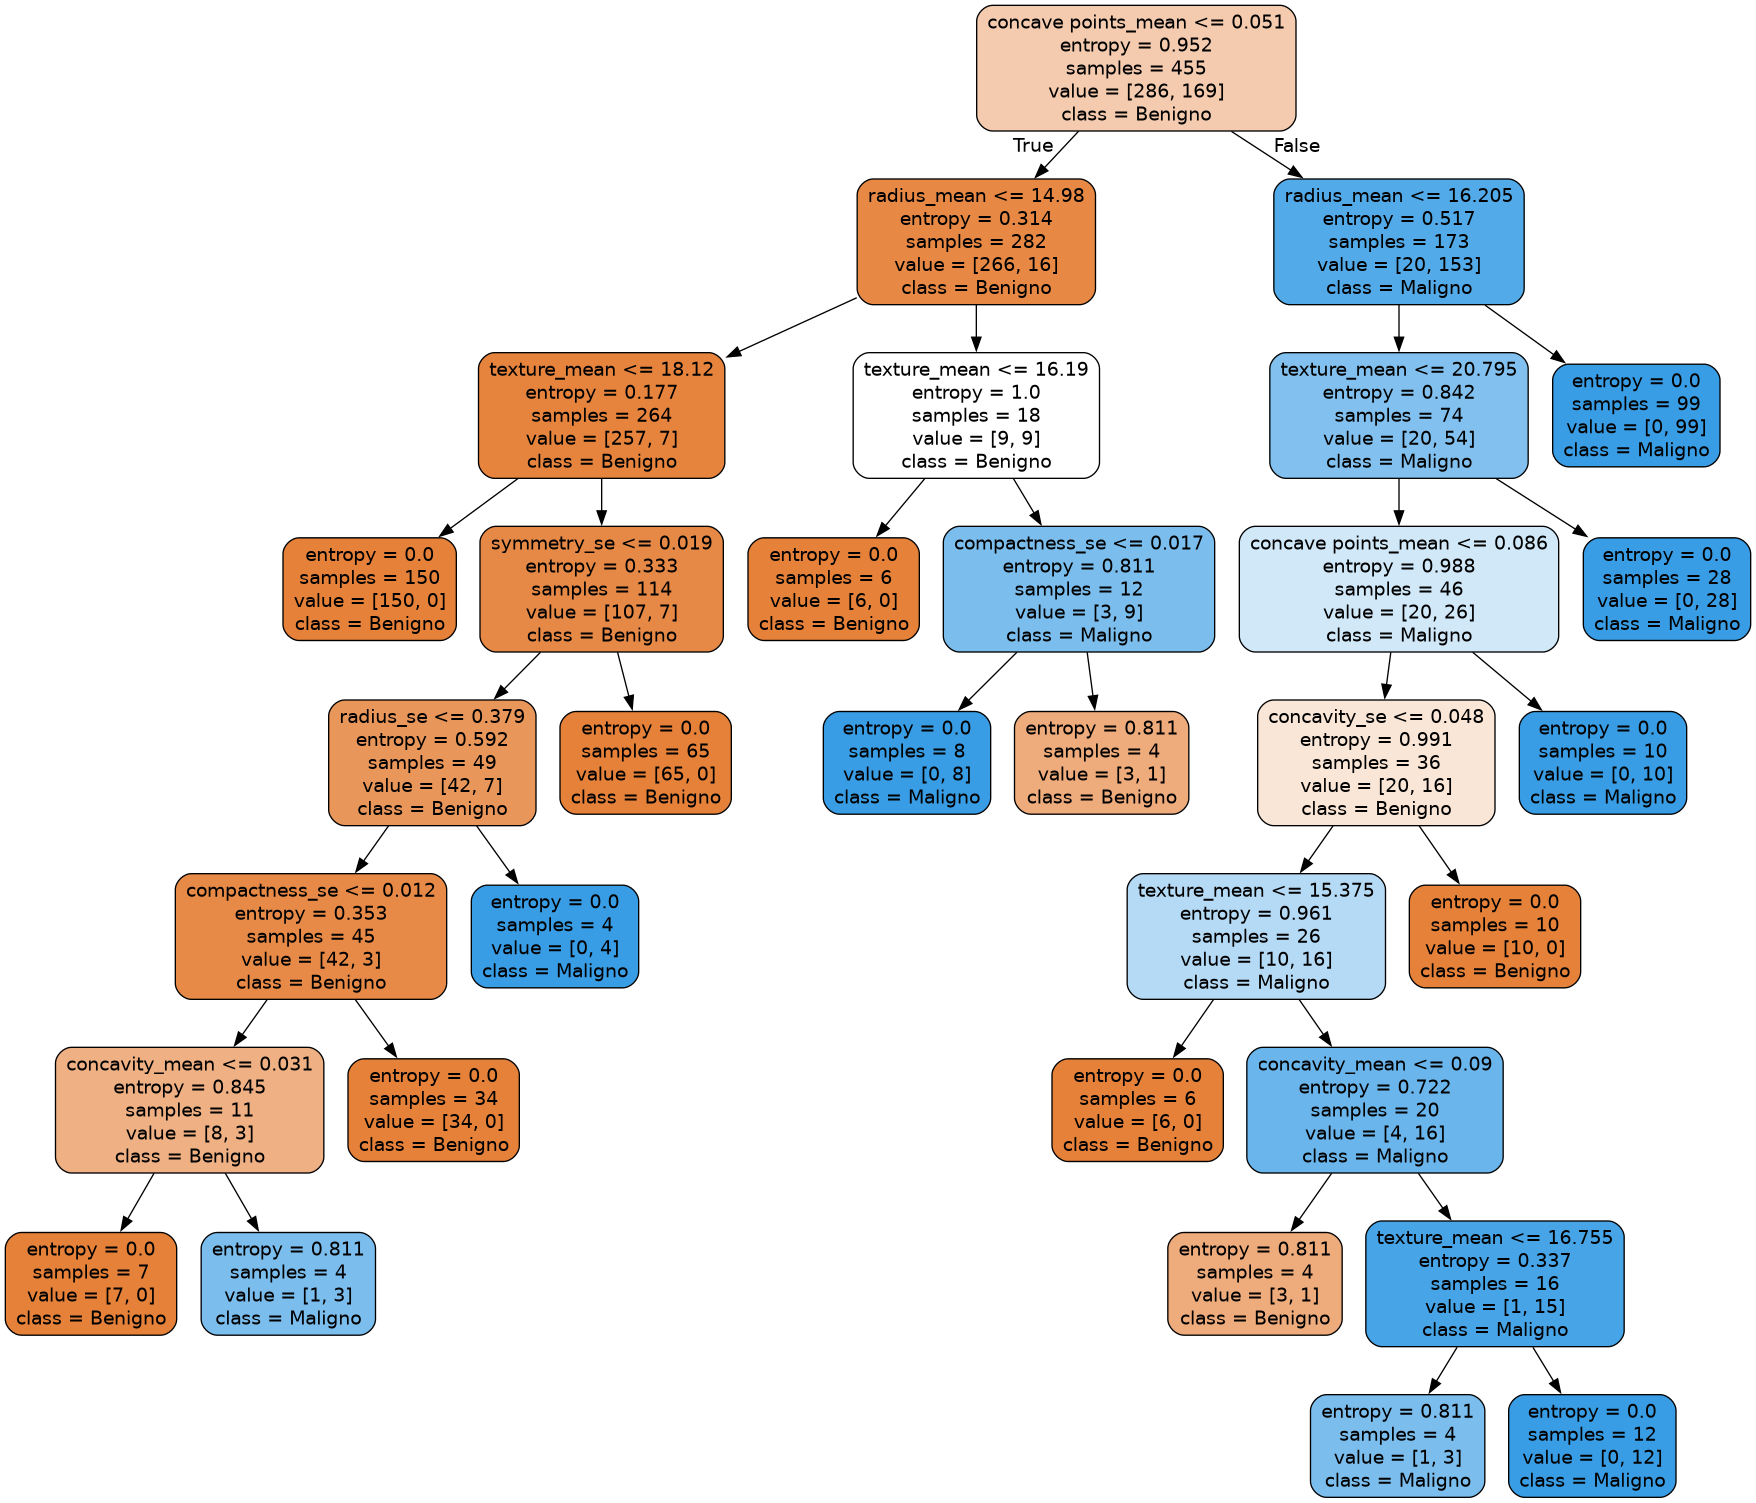

In [48]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image

# Exportar el árbol de decisión a formato DOT
dot_data = export_graphviz(best_dtree, out_file=None, 
                           feature_names=feature_names,
                           class_names=['Benigno', 'Maligno'],
                           rounded=True, filled=True)

# Usar Graphviz para convertir el formato DOT a una imagen PNG
graph = graphviz.Source(dot_data, format="png")
png_bytes = graph.pipe()

# Mostrar la imagen con un tamaño específico
Image(png_bytes, width=600, height=800)


#### Interpretación de la visualización del árbol de decisión

En la visualización del árbol de decisión, cada nodo representa una decisión basada en una característica, y las ramas indican el camino tomado en función de esa decisión. Las características clave en la visualización incluyen:

- **Nodos**: Cada caja en el árbol. Los nodos superiores representan decisiones basadas en características con mayor importancia.
- **Entropía**: Una medida de impureza o desorden en cada nodo. Una entropía baja sugiere que las muestras en ese nodo son más homogéneas (es decir, pertenecen mayoritariamente a una sola clase).
- **Samples**: El número de muestras en el nodo.
- **Value**: Muestra el número de muestras de cada clase en el nodo.
- **Class**: La clasificación predominante en ese nodo (Benigno o Maligno).


La interpretación de un árbol de decisión puede volverse compleja, especialmente si el árbol es profundo con muchos nodos y divisiones. Un árbol más profundo puede representar mejor la complejidad de los datos, pero también puede ser más difícil de analizar y más propenso a sobreajustarse a los datos de entrenamiento. 

### Bosques aleatorios

Los bosques aleatorios son un método de aprendizaje en conjunto que opera construyendo una multitud de árboles de decisión durante el entrenamiento y generando la clase que es el modo de las clasificaciones (en caso de clasificación) o predicción media (en caso de regresión) de los árboles individuales. Este enfoque mejora significativamente la capacidad predictiva y la robustez del modelo en comparación con un único árbol de decisión.

#### Evaluación del modelo de bosques aleatorios

Después de entrenar el modelo de bosques aleatorios utilizando el conjunto de datos `df_model_reduced`, se procedio a evaluar su rendimiento. Al igual que con el árbol de decisión, utilizamos la matriz de confusión y el reporte de clasificación para medir la precisión, el recall y el f1-score. Estamos particularmente interesados en ver si hay diferencias significativas en el rendimiento en comparación con nuestro modelo de árbol de decisión optimizado.


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# X_train, X_test, y_train, y_test ya están definidos en el arbol de decision 

# Creando el modelo de bosque aleatorio
random_forest_model = RandomForestClassifier(random_state=42)

# Entrenando el modelo con el conjunto de entrenamiento
random_forest_model.fit(X_train, y_train)

# Realizando predicciones en el conjunto de prueba
y_pred_rf = random_forest_model.predict(X_test)

# Evaluando el modelo
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Imprimir la matriz de confusión y el reporte de clasificación
print("Matriz de Confusión:\n", conf_matrix_rf)
print("\nReporte de Clasificación:\n", class_report_rf)


Matriz de Confusión:
 [[69  2]
 [ 3 40]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#### resultados del modelo de bosques aleatorios

Los resultados obtenidos de la evaluación del modelo de bosques aleatorios son los siguientes:

- **Matriz de Confusión**:
  $$
  \begin{bmatrix}
  69 & 2 \\
  3 & 40 \\
  \end{bmatrix}
  $$
- **Reporte de Clasificación**:
  - Precisión para Benigno: $0.96$
  - Precisión para Maligno: $0.95$
  - Recall para Benigno: $0.97$
  - Recall para Maligno: $0.93$
  - F1-score para Benigno: $0.97$
  - F1-score para Maligno: $0.94$
  - Precisión Global: $0.96$

#### Análisis 

Los resultados del modelo de bosques aleatorios son idénticos a los del modelo de árbol de decisión optimizado. Esto puede sugerir que, para este conjunto de datos específico, ambos modelos están capturando de manera similar las características clave necesarias para la clasificación. Sin embargo, es importante considerar que a pesar de los resultados numéricos similares, los mecanismos subyacentes de los modelos son diferentes. Mientras que el modelo de árbol de decisión se basa en una única estructura de decisión, el modelo de bosques aleatorios toma decisiones agregadas de múltiples árboles, lo que generalmente proporciona una mayor robustez y mejor manejo de las características y sus interacciones.


#### Optimización y entrenamiento del modelo de bosques aleatorios

Tras experimentar con el modelo básico de bosques aleatorios, procedemos a optimizar sus parámetros utilizando `GridSearchCV`. Los parámetros considerados en esta optimización incluyen:

- `n_estimators`: Número de árboles en el bosque.
- `max_depth`: Profundidad máxima de los árboles.
- `min_samples_split`: Número mínimo de muestras necesarias para dividir un nodo.
- `min_samples_leaf`: Número mínimo de muestras requeridas para ser un nodo hoja.
- `max_features`: Número de características a considerar en cada división.

Con estos parámetros ajustados, esperamos mejorar la precisión y generalización del modelo en comparación con la versión no optimizada.


In [50]:
# Creando el modelo de bosque aleatorio
rf_model = RandomForestClassifier(random_state=42)

# Definiendo la cuadrícula de parámetros a explorar
param_grid = {
    'n_estimators': [100, 200, 300],      # Número de árboles
    'max_depth': [3, 5, 10],               # Profundidad máxima de los árboles
    'min_samples_split': [2, 4, 6],        # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 3],         # Número mínimo de muestras en un nodo hoja
    'max_features': ['sqrt', 'log2']       # Número de características a considerar en cada división
}

# Configurando GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Entrenando el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Los mejores parámetros encontrados
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

# Creando un nuevo modelo de bosque aleatorio con los mejores parámetros
optimized_rf_model = RandomForestClassifier(**best_params, random_state=42)
optimized_rf_model.fit(X_train, y_train)

# Realizando predicciones con el modelo optimizado
optimized_y_pred = optimized_rf_model.predict(X_test)

# Evaluación del modelo optimizado
optimized_conf_matrix = confusion_matrix(y_test, optimized_y_pred)
optimized_class_report = classification_report(y_test, optimized_y_pred)

# Imprimir resultados
print("Matriz de Confusión:\n", optimized_conf_matrix)
print("\nReporte de Clasificación:\n", optimized_class_report)


Mejores parámetros: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
Matriz de Confusión:
 [[68  3]
 [ 4 39]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



#### Resultados del modelo de bosques aleatorios optimizado

Los resultados obtenidos tras la optimización y evaluación del modelo de bosques aleatorios son los siguientes:

- **Mejores Parámetros**: 
  - Profundidad Máxima (`max_depth`): $5$
  - Características Máximas (`max_features`): 'sqrt'
  - Mínimo de Muestras por Hoja (`min_samples_leaf`): $3$
  - Mínimo de Muestras para Dividir (`min_samples_split`): $2$
  - Número de Árboles (`n_estimators`): $200$

- **Matriz de Confusión**:
  $$
  \begin{bmatrix}
  68 & 3 \\
  4 & 39 \\
  \end{bmatrix}
  $$
- **Reporte de Clasificación**:
  - Precisión para Benigno: $0.94$
  - Precisión para Maligno: $0.93$
  - Recall para Benigno: $0.96$
  - Recall para Maligno: $0.91$
  - F1-score para Benigno: $0.95$
  - F1-score para Maligno: $0.92$
  - Precisión Global: $0.94$

#### Interpretación de los resultados

El modelo de bosques aleatorios optimizado muestra una precisión global de $0.94$, lo cual es ligeramente inferior a los resultados del modelo de árbol de decisión y del bosque aleatorio no optimizado. Esto puede deberse a que la configuración de parámetros optimizada, aunque más equilibrada, no capta ciertas particularidades de los datos que los modelos más simples o menos restringidos lograban capturar.

Las métricas de precisión y recall indican un buen equilibrio entre la capacidad de detectar casos malignos y benignos. El modelo tiene una ligera tendencia a ser más eficiente en identificar casos benignos, lo cual se refleja en las métricas ligeramente más altas para la clase benigna.

Esta ligera disminución en la precisión global, en comparación con el modelo inicial, podría interpretarse como un signo de una mayor generalización, reduciendo potencialmente el sobreajuste a los datos de entrenamiento.


#### Análisis de la importancia de las características en los bosques aleatorios

A diferencia de un único árbol de decisión, los bosques aleatorios combinan el aprendizaje de múltiples árboles, lo que puede ofrecer una perspectiva más equilibrada y robusta sobre qué características son más influyentes en la predicción. Este análisis ayudará a comprender mejor las características en la clasificación. En este caso, no realizamos visualizaciones de árboles individuales debido a la naturaleza compleja y la cantidad de árboles en un bosque aleatorio, lo cual podría hacer la interpretación visual confusa.


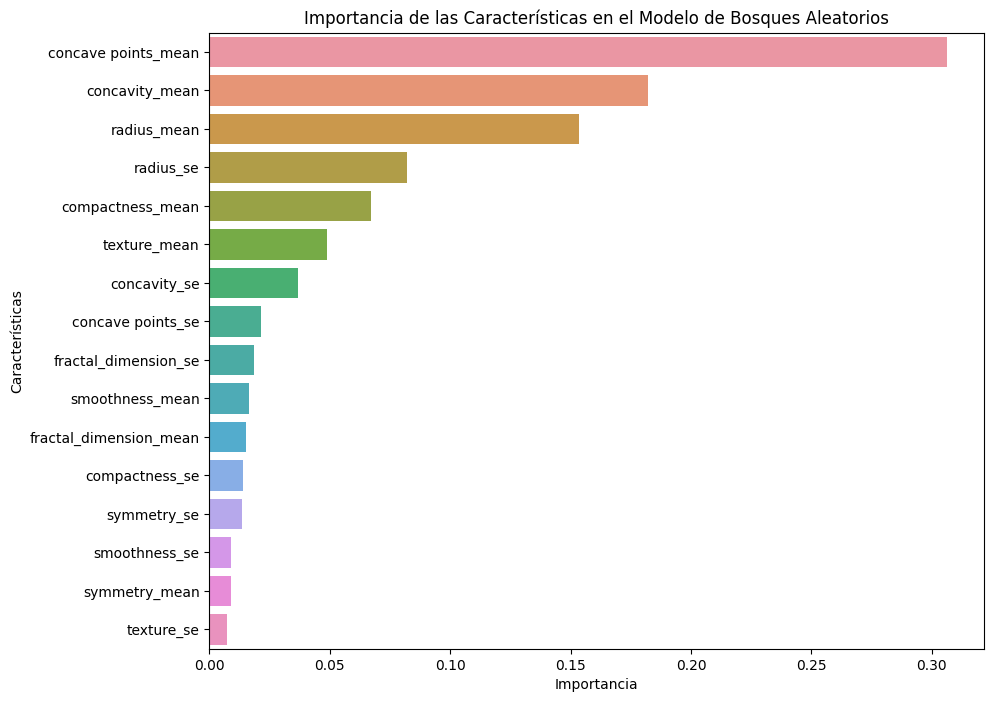

Feature  Importance
5      concave points_mean    0.306471
4           concavity_mean    0.181915
0              radius_mean    0.153329
8                radius_se    0.081963
3         compactness_mean    0.067094
1             texture_mean    0.048674
12            concavity_se    0.036755
13       concave points_se    0.021290
15    fractal_dimension_se    0.018662
2          smoothness_mean    0.016254
7   fractal_dimension_mean    0.015283
11          compactness_se    0.013857
14             symmetry_se    0.013566
10           smoothness_se    0.008921
6            symmetry_mean    0.008771
9               texture_se    0.007194

In [51]:
# Obtener la importancia de las características
feature_importances = optimized_rf_model.feature_importances_

# Crear un DataFrame para una fácil visualización
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Ordenar las características por importancia
features_df = features_df.sort_values(by='Importance', ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Importancia de las Características en el Modelo de Bosques Aleatorios')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

features_df

#### Resultados de la importancia de las características en los bosques aleatorios

La importancia de las características obtenida del modelo de bosques aleatorios es la siguiente:

- **Concave points mean**: $0.306471$
- **Concavity mean**: $0.181915$
- **Radius mean**: $0.153329$
- **Radius SE (Error estándar del radio)**: $0.081963$
- **Compactness Mean (Compacidad media)**: $0.067094$
- **Texture Mean (Textura media)**: $0.048674$
- **Concavity SE (Error estándar de la concavidad)**: $0.036755$
- **Concave Points SE (Error estándar de los puntos cóncavos)**: $0.021290$
- **Fractal Dimension SE (Error estándar de la dimensión fractal)**: $0.018662$
- **Smoothness Mean (Suavidad media)**: $0.016254$
- **Fractal Dimension Mean (Dimensión fractal media)**: $0.015283$
- **Compactness SE (Error estándar de la compactación)**: $0.013857$
- **Symmetry SE (Error estándar de la simetría)**: $0.013566$
- **Smoothness SE (Error estándar de la suavidad)**: $0.008921$
- **Symmetry Mean (Simetría media)**: $0.008771$
- **Texture SE (Error estándar de la textura)**: $0.007194$

#### Comparación con el modelo de árboles de decisión 

En comparación con el modelo de árboles de decisión, se ovservan diferencias en la importancia relativa de ciertas características. Por ejemplo, mientras que en el árbol de decisión, `concave points mean` era la característica dominante, en el bosque aleatorio, otras características como `concavity mean` y `radius mean` también tienen una importancia significativa.

Esto puede sugerir que el modelo de bosques aleatorios, al integrar múltiples árboles, está capturando una relación más compleja entre las características y el diagnóstico. 

Aunque los bosques aleatorios ofrecen una visión más diversa y posiblemente más robusta, la elección entre este modelo y los árboles de decisión depende de varios factores, incluyendo la interpretabilidad del modelo, la complejidad de los datos y los requisitos específicos de la aplicación médica. En algunos casos, la simplicidad y la facilidad de interpretación de un árbol de decisión pueden ser más deseables, mientras que en otros, la robustez y la menor tendencia al sobreajuste de los bosques aleatorios pueden ser más beneficiosas.


### Modelo de regresión logística

La regresión logística es un modelo estadístico que estima la probabilidad de una variable categórica binaria. A diferencia de la regresión lineal que predice un valor continuo, la regresión logística se utiliza para predecir la probabilidad de ocurrencia de un evento ajustando una curva logística (función sigmoide) a los datos.

La función sigmoide, definida como $ σ(z) = \frac{1}{1 + e^{-z}}$, es el núcleo de la regresión logística. Aquí, $z$ representa una combinación lineal de las características de entrada, es decir, $z = β_0 + β_1x_1 + β_2x_2 + ... + β_nx_n$, donde $β_i$ son los coeficientes del modelo. Esta función transforma cualquier valor real en un valor entre 0 y 1, interpretándose como una probabilidad.

En términos de clasificación, si la probabilidad estimada es mayor que un umbral (comúnmente 0.5), la observación se clasifica en una categoría; de lo contrario, se clasifica en la otra. La regresión logística es  útil debido a  interpretabilidad: los coeficientes $β_i$ indican la importancia relativa de cada característica y cómo afectan logarítmicamente las probabilidades.

Este modelo es ampliamente utilizado en campos como la medicina para la clasificación binaria, donde la comprensión de los factores que influyen en los resultados es tan importante como la precisión de la clasificación en sí.





#### Implementación del modelo de regresión logística con `df_model_log_scaled`

Se implemento un primer modelo de regresión logística utilizando el conjunto de datos `df_model_log_scaled`, el cual ha sido transformado logarítmicamente. Tambien se utilizó `GridSearchCV` para la optimización de hiperparámetros, buscando los valores óptimos para la regularización (penalización L1 o L2) y la fuerza de regularización (parámetro C).

El modelo resultante nos proporcionó no solo las predicciones de clasificación, sino también las probabilidades asociadas y la importancia relativa de cada característica, lo que nos permite realizar un análisis detallado de los factores que influyen en la probabilidad de diagnóstico de tumores.


In [52]:
from sklearn.linear_model import LogisticRegression

X = df_model_log_scaled.drop('diagnosis', axis=1)
y = df_model_log_scaled['diagnosis']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística
logistic_model = LogisticRegression()

# Definir la cuadrícula de parámetros para GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear']
}

# Configurando GridSearchCV
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, n_jobs=-1, verbose=0)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Los mejores parámetros encontrados
best_params = grid_search.best_params_
print("Mejores parámetros:", best_params)

# Crear un nuevo modelo de regresión logística con los mejores parámetros
optimized_log_model = LogisticRegression(**best_params)
optimized_log_model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = optimized_log_model.predict(X_test)
y_pred_prob = optimized_log_model.predict_proba(X_test)[:, 1] 
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Imprimir resultados
print("Matriz de Confusión:\n", conf_matrix)
print("\nReporte de Clasificación:\n", class_report)


Mejores parámetros: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Matriz de Confusión:
 [[66  5]
 [ 2 41]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        71
           1       0.89      0.95      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



#### Interpretación de los resultados de la regresión logística

Tras aplicar la regresión logística al conjunto de datos `df_model_log_scaled`, los resultados en comparación con los modelos de árboles de decisión y bosques aleatorios previamente analizados, la regresión logística ofrece un equilibrio entre precisión y simplicidad, con la ventaja adicional de interpretar directamente sus coeficientes en términos de influencia en las probabilidades.


#### Análisis de coeficientes y probabilidades de clasificación

Con el modelo de regresión logística ya entrenado y optimizado, podemos profundizar en el análisis de sus coeficientes y en cómo el modelo estima las probabilidades de cada clase. Esta información  ofrece una perspectiva  sobre las relaciones entre las características y la probabilidad de que un tumor sea benigno o maligno.

1. **Coeficientes del Modelo**: 
   Cada coeficiente en el modelo de regresión logística representa el cambio logarítmico en las odds de la variable dependiente por cada unidad de cambio en la característica correspondiente. Estos coeficientes nos indican qué características aumentan o disminuyen la probabilidad de un diagnóstico maligno y en qué medida.

2. **Probabilidades de Clasificación**: 
   Además de las etiquetas de clasificación, el modelo nos proporciona las probabilidades de que cada observación pertenezca a cada clase. Estas probabilidades son útiles para entender la seguridad del modelo en sus predicciones y para identificar casos que podrían requerir una revisión adicional o un enfoque diagnóstico más detallado.


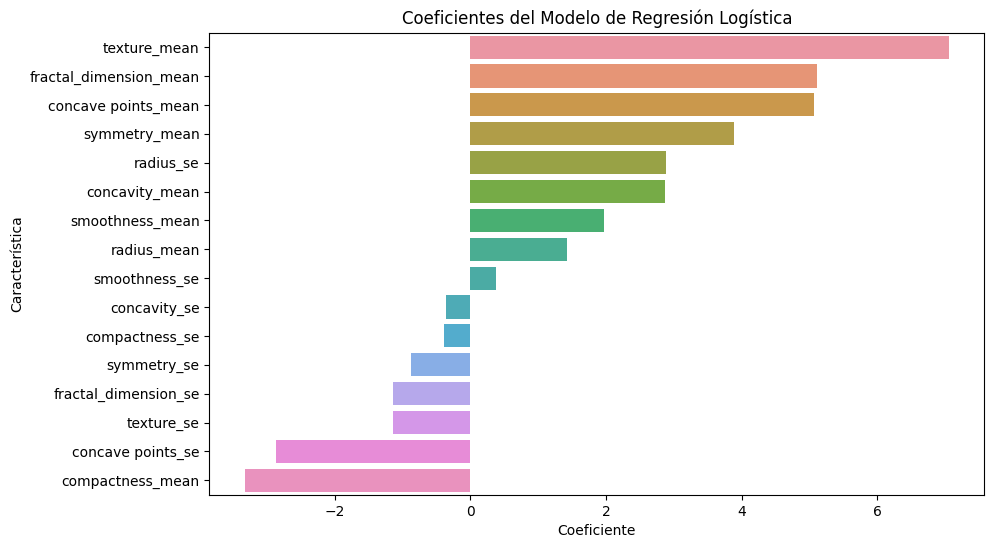

   Prob_Benigno  Prob_Maligno
0      0.537070      0.462930
1      0.001065      0.998935
2      0.001317      0.998683
3      0.998630      0.001370
4      0.999704      0.000296
5      0.000008      0.999992
6      0.000011      0.999989
7      0.074840      0.925160
8      0.559192      0.440808
9      0.999642      0.000358


In [53]:
# Extracción de coeficientes
coeficientes = optimized_log_model.coef_[0]
caracteristicas = X_train.columns
coeficientes_df = pd.DataFrame({'Característica': caracteristicas, 'Coeficiente': coeficientes})

# Visualización de los coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Característica', data=coeficientes_df.sort_values(by='Coeficiente', ascending=False))
plt.title('Coeficientes del Modelo de Regresión Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.show()

# Probabilidades de clasificación para las primeras 10 observaciones
probabilidades = optimized_log_model.predict_proba(X_test)[:10]
probabilidades_df = pd.DataFrame(probabilidades, columns=['Prob_Benigno', 'Prob_Maligno'])
print(probabilidades_df)


#### Interpretación de los coeficientes en la regresión logística

La regresión logística nos proporciona coeficientes que reflejan la importancia y el tipo de relación (positiva o negativa) de cada característica con respecto a la probabilidad de un diagnóstico maligno. Aquí se destacan algunos coeficientes clave:

- **Texture Mean (7.063312)**: Un fuerte indicador positivo, sugiere que un aumento en la textura media está significativamente asociado con una mayor probabilidad de malignidad.
- **Concave Points Mean (5.071898) y Fractal Dimension Mean (5.106307)**: Estos coeficientes altos indican una relación positiva fuerte con la probabilidad de malignidad.
- **Compactness Mean (-3.330881)**: Este coeficiente negativo implica que mayores valores de compactación media están asociados con una menor probabilidad de malignidad.
- **Concave Points SE (-2.870582)**: Un coeficiente negativo que sugiere que un incremento en este valor disminuye la probabilidad de un tumor maligno.
- **Radius Mean (1.418736)**: Indica una relación positiva con la malignidad, aunque no tan pronunciada como otros factores.

#### Análisis de las probabilidades de clasificación

Las probabilidades de clasificación para las primeras 10 observaciones nos muestran la confianza del modelo en sus predicciones:

- **Altas Probabilidades de Malignidad**: Observaciones 1, 2, 5 y 6 muestran alta certeza de ser malignas.
- **Altas Probabilidades de Benignidad**: Observaciones 3, 4 y 9 indican alta certeza de ser benignas.
- **Probabilidades Equilibradas**: Observaciones 0 y 8 presentan una distribución más equilibrada de probabilidades.

#### Comparación con modelos basados en árboles

La diferencia en la importancia de las características entre los modelos de regresión logística y los modelos basados en árboles (árboles de decisión y bosques aleatorios) se debe a sus mecanismos subyacentes:

- **Modelos Basados en Árboles**: Estiman la importancia de las características basándose en la mejora de la pureza del nodo que cada característica aporta al dividirlo. Esto refleja más directamente el impacto de las características en la capacidad de separación del modelo.
- **Regresión Logística**: Los coeficientes indican la importancia en términos del cambio logarítmico en la probabilidad de la clase objetivo. Esto refleja más cómo cada característica influye en la probabilidad logarítmica de un resultado.

Estas diferencias metodológicas pueden conducir a variaciones en la interpretación de la importancia de las características entre los distintos tipos de modelos.


#### Implementación de la regresión logística con datos estandarizados

En esta parte se muestra el modelo de regresión logística aplicado al conjunto de datos `df_model_standardized`. Este conjunto ha sido estandarizado utilizando la normalización Z-Score, que escala las características para que tengan una media de 0 y una desviación estándar de 1.

Al igual que con el conjunto de datos transformado logarítmicamente, emplearemos `GridSearchCV` para la optimización de parámetros.


In [54]:
# Preparación de los datos
X = df_model_standardized.drop('diagnosis', axis=1)
y = df_model_standardized['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación del modelo
logistic_model_std = LogisticRegression()

# Configuración de GridSearchCV
param_grid_std = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear']
}
grid_search_std = GridSearchCV(logistic_model_std, param_grid_std, cv=5, n_jobs=-1, verbose=0)

# Entrenamiento y optimización del modelo
grid_search_std.fit(X_train, y_train)

# Mejores parámetros
best_params_std = grid_search_std.best_params_
print("Mejores parámetros:", best_params_std)

# Creación del modelo optimizado
optimized_log_model_std = LogisticRegression(**best_params_std)
optimized_log_model_std.fit(X_train, y_train)

# Evaluación del modelo
y_pred_std = optimized_log_model_std.predict(X_test)
conf_matrix_std = confusion_matrix(y_test, y_pred_std)
class_report_std = classification_report(y_test, y_pred_std)

# Imprimir resultados
print("Matriz de Confusión:\n", conf_matrix_std)
print("\nReporte de Clasificación:\n", class_report_std)


Mejores parámetros: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Matriz de Confusión:
 [[65  6]
 [ 3 40]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        71
           1       0.87      0.93      0.90        43

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



#### Análisis y comparación con el modelo anterior

A pesar de las pequeñas variaciones en las métricas de rendimiento, este modelo presenta un equilibrio similar entre la precisión y el recall para ambas clases. La regularización L2 con un valor de C de 10 ha permitido al modelo mantener un buen equilibrio entre el ajuste y la generalización.

Una diferencia notable en la matriz de confusión en comparación con el modelo anterior es el ligero aumento en falsos positivos, lo que sugiere que la estandarización de los datos ha tenido un impacto en cómo el modelo percibe y clasifica las observaciones.



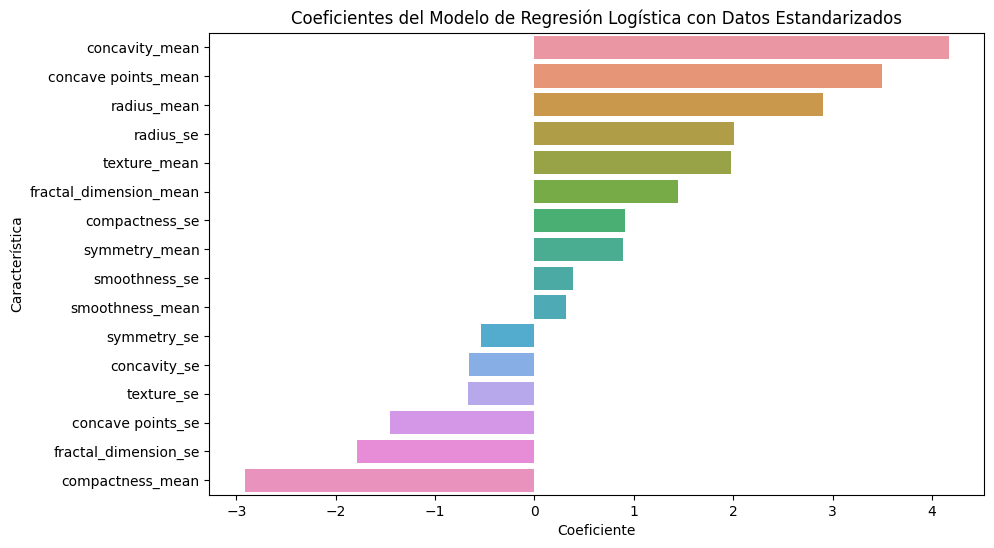

   Prob_Benigno  Prob_Maligno
0  8.537632e-01      0.146237
1  2.670077e-05      0.999973
2  3.290476e-04      0.999671
3  9.992255e-01      0.000775
4  9.998833e-01      0.000117
5  1.200817e-12      1.000000
6  2.228862e-11      1.000000
7  7.068470e-03      0.992932
8  6.862135e-01      0.313787
9  9.963227e-01      0.003677


In [55]:
# Extracción de coeficientes
coeficientes_std = optimized_log_model_std.coef_[0]
features_std = X_train.columns
coeficientes_df_std = pd.DataFrame({'Característica': features_std, 'Coeficiente': coeficientes_std})

# Visualización de los coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Característica', data=coeficientes_df_std.sort_values(by='Coeficiente', ascending=False))
plt.title('Coeficientes del Modelo de Regresión Logística con Datos Estandarizados')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.show()

# Probabilidades de clasificación para las primeras 10 observaciones
probabilidades_std = optimized_log_model_std.predict_proba(X_test)[:10]
probabilidades_df_std = pd.DataFrame(probabilidades_std, columns=['Prob_Benigno', 'Prob_Maligno'])
print(probabilidades_df_std)


#### Interpretación de los coeficientes en la regresión logística con datos estandarizados

A cpntinuacion se destacan algunos coeficientes clave:

- **Concavity Mean (4.174031) y Concave Points Mean (3.499312)**: Estos coeficientes positivos altos indican que un aumento en la concavidad media y en los puntos cóncavos está fuertemente asociado con un mayor riesgo de malignidad.
- **Compactness Mean (-2.916489)**: Un coeficiente negativo significativo sugiere que un incremento en la compactación media está asociado con una menor probabilidad de malignidad.
- **Fractal Dimension SE (-1.784719) y Concave Points SE (-1.449016)**: Coeficientes negativos que indican que valores más altos en estas características se asocian con una menor probabilidad de que el tumor sea maligno.
- **Radius Mean (2.908734) y Radius SE (2.013533)**: Coeficientes positivos indican una relación positiva con la probabilidad de malignidad.

#### Comparación con el modelo de árbol de decisión

La comparación de estos coeficientes con los resultados del modelo de árbol de decisión muestra algunas similitudes en términos de qué características son consideradas importantes. Por ejemplo, la concavidad y los puntos cóncavos son consistentemente identificados como factores significativos en ambos modelos. Sin embargo, la regresión logística proporciona una cuantificación más precisa del impacto de cada característica, gracias a la naturaleza de sus coeficientes en un modelo lineal.




#### Implementación de regresión logística con PCA

Aplicando la regresión logística al conjunto de datos transformado por PCA, `df_model_pca`. Ademas se uso la misma metodología de `GridSearchCV` para la optimización de parámetros y evaluacion del rendimiento del modelo.


In [56]:
# Preparación de los datos
X_pca = df_model_pca.drop('diagnosis', axis=1)
y_pca = df_model_pca['diagnosis']

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

# Creación del modelo
logistic_model_pca = LogisticRegression()

# Configuración de GridSearchCV
param_grid_pca = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear']
}
grid_search_pca = GridSearchCV(logistic_model_pca, param_grid_pca, cv=5, n_jobs=-1, verbose=0)

# Entrenamiento y optimización del modelo
grid_search_pca.fit(X_train_pca, y_train_pca)

# Mejores parámetros
best_params_pca = grid_search_pca.best_params_
print("Mejores parámetros:", best_params_pca)

# Creación del modelo optimizado
optimized_log_model_pca = LogisticRegression(**best_params_pca)
optimized_log_model_pca.fit(X_train_pca, y_train_pca)

# Evaluación del modelo
y_pred_pca = optimized_log_model_pca.predict(X_test_pca)
conf_matrix_pca = confusion_matrix(y_test_pca, y_pred_pca)
class_report_pca = classification_report(y_test_pca, y_pred_pca)

# Imprimir resultados
print("Matriz de Confusión:\n", conf_matrix_pca)
print("\nReporte de Clasificación:\n", class_report_pca)


Mejores parámetros: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Matriz de Confusión:
 [[70  1]
 [ 1 42]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



#### Análisis de los resultados del modelo de regresión logística con PCA

Los resultados obtenidos del modelo de regresión logística aplicado al conjunto de datos PCA (`df_model_pca`) indica analizar consideraciones sobre un posible sobreajuste

Si bien estos resultados son excepcionalmente buenos, es importante ser cauteloso con respecto al posible sobreajuste. El sobreajuste ocurre cuando un modelo está tan bien ajustado a los datos de entrenamiento que puede perder la capacidad de generalizar a nuevos datos. Algunos factores a considerar incluyen:

- **Reducción de PCA**: Al usar PCA, Se redujo la dimensionalidad de los datos, lo que podría haber simplificado en exceso las relaciones entre las características y la respuesta, dando como resultado un modelo que funciona excepcionalmente bien en los datos de prueba pero que podría no mantener este rendimiento en datos no vistos.
- **Regularización L1**: La selección de 'l1' para la regularización implica que algunos coeficientes pueden ser reducidos a cero, potencialmente ignorando algunas relaciones importantes en los datos.

Es recomendable probar el modelo en un conjunto de datos completamente independiente para evaluar mejor su capacidad de generalización.

Al aplicar la regresión logística a los datos transformados mediante PCA (`df_model_pca`), enfrentamos un desafío único en la interpretación de la importancia de las características. En este contexto, es importante considerar que:

1. **Naturaleza de PCA**: Los componentes principales son combinaciones lineales de las características originales diseñadas para capturar la mayor varianza posible en los datos. No representan directamente ninguna de las características originales de manera aislada.

2. **Interpretación y significado**: Debido a que cada componente principal es una mezcla de varias características originales, su interpretación no es tan directa ni intuitiva como con las características originales. Estos componentes reflejan patrones y relaciones subyacentes en los datos, más que la influencia individual de cada característica.

3. **Enfoque en la varianza, no en la Predicción**: Los componentes principales se seleccionan por su capacidad para explicar la varianza en los datos, no necesariamente por su contribución a la predicción del modelo. Por lo tanto, un componente principal puede ser importante para describir la estructura de los datos, pero no para predecir la variable objetivo.

En resumen, mientras que el análisis de PCA es util para reducir la dimensionalidad y capturar las dinámicas subyacentes de los datos, su utilidad para interpretar la importancia de características específicas en el contexto de la predicción es limitada. La interpretación de los resultados del modelo debe hacerse con cautela, teniendo en cuenta estas consideraciones.




#### Implementación de la regresión logística con datos no escalados

Usando los datos originales sin transformaciones de escala `df_model_reduced` y de igual manera empleando`GridSearchCV` permitio comparar cómo el modelo de regresión logística se desempeña con datos en su estado más natural y si la falta de escalado afecta significativamente la precisión y el rendimiento del modelo.



In [57]:
# Preparación de los datos
X_reduced = df_model_reduced.drop('diagnosis', axis=1)
y_reduced = df_model_reduced['diagnosis']
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

# Creación del modelo
logistic_model_reduced = LogisticRegression()

# Configuración de GridSearchCV
param_grid_reduced = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear']
}
grid_search_reduced = GridSearchCV(logistic_model_reduced, param_grid_reduced, cv=5, n_jobs=-1, verbose=0)

# Entrenamiento y optimización del modelo
grid_search_reduced.fit(X_train_reduced, y_train_reduced)

# Mejores parámetros
best_params_reduced = grid_search_reduced.best_params_
print("Mejores parámetros:", best_params_reduced)

# Creación del modelo con los mejores parámetros
optimized_log_model_reduced = LogisticRegression(**best_params_reduced)
optimized_log_model_reduced.fit(X_train_reduced, y_train_reduced)

# Evaluación del modelo
y_pred_reduced = optimized_log_model_reduced.predict(X_test_reduced)
conf_matrix_reduced = confusion_matrix(y_test_reduced, y_pred_reduced)
class_report_reduced = classification_report(y_test_reduced, y_pred_reduced)

# Imprimir resultados
print("Matriz de Confusión:\n", conf_matrix_reduced)
print("\nReporte de Clasificación:\n", class_report_reduced)


Mejores parámetros: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Matriz de Confusión:
 [[70  1]
 [ 2 41]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



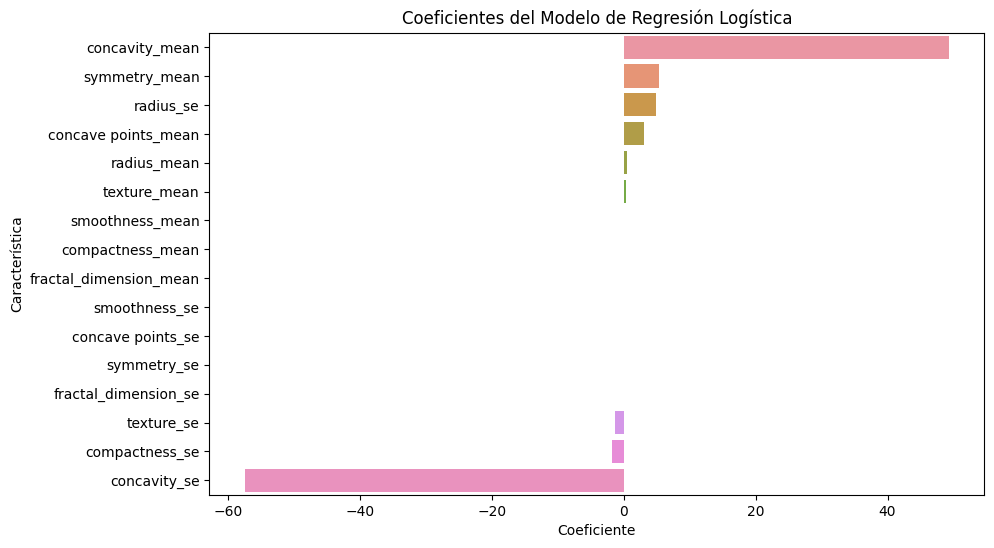

In [58]:
# Obtener los coeficientes del modelo entrenado con df_model_reduced
coeficientes = optimized_log_model_reduced.coef_[0]
caracteristicas = X_train_reduced.columns
coeficientes_df = pd.DataFrame({'Característica': caracteristicas, 'Coeficiente': coeficientes})

# Ordenar los coeficientes para ver su importancia
coeficientes_df = coeficientes_df.sort_values(by='Coeficiente', ascending=False)

# Visualización de los coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Característica', data=coeficientes_df)
plt.title('Coeficientes del Modelo de Regresión Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.show()


#### Análisis de los resultados de regresión logística con df_model_reduced

Al analizar los resultados del modelo de regresión logística aplicado a `df_model_reduced`, observamos una precisión global del 97%, que es notablemente alta. Si bien esta alta precisión podría sugerir un modelo excepcionalmente efectivo, es importante considerar la posibilidad de sobreajuste:

- **Comparación con Otros Modelos**: Este nivel de precisión es superior a la de los modelos anteriores, lo que podría indicar que el modelo está capturando las relaciones en los datos de manera más efectiva. Sin embargo, también es posible que el modelo se haya ajustado excesivamente a los detalles específicos del conjunto de datos de entrenamiento, lo que podría reducir su capacidad de generalizar a nuevos datos.

- **Consideración de Sobreajuste**: Una precisión tan alta puede ser un indicio de sobreajuste, especialmente si no se ve reflejada en un conjunto de validación independiente o en la práctica real. Sería prudente probar el modelo en un conjunto de datos de prueba independiente para confirmar su capacidad de generalización.

- **Análisis de Coeficientes y Regularización L1**: La regularización L1 ha llevado a algunos coeficientes a cero, lo que implica que el modelo ha descartado ciertas características como irrelevantes. Mientras que los coeficientes no nulos, como `Concavity Mean` y `Concavity SE`, muestran una fuerte influencia en las predicciones. La magnitud extrema de estos coeficientes, tanto positivos como negativos, también podría ser una señal de sobreajuste, ya que el modelo puede estar dependiendo en gran medida de estas pocas características.

El conjunto de datos `df_model_reduced`, al no haber sido escalado ni normalizado, presenta las características en su escala original. Esto tiene ciertas implicaciones:

- **Magnitud de los Coeficientes**: En la regresión logística, los coeficientes reflejan la importancia de cada característica en la predicción del modelo. Sin embargo, si las características tienen escalas diferentes, los coeficientes pueden ser difíciles de interpretar. Una característica con una escala numérica más grande podría tener un coeficiente aparentemente más pequeño, no porque sea menos importante, sino debido a su escala.

- **Comparación de Coeficientes**: La interpretación directa de los coeficientes como indicadores de importancia solo es válida cuando todas las características están en la misma escala. Por lo tanto, sin la normalización o estandarización de los datos, la comparación de los coeficientes entre sí se vuelve menos fiable.

- **Riesgo de Sobreajuste**: La ausencia de normalización o estandarización puede llevar a un modelo que se ajuste excesivamente a ciertas características con valores numéricos más altos. Esto puede ser una de las razones detrás de la alta precisión observada y debe ser un factor a considerar al evaluar la posibilidad de sobreajuste.



#### Resumen y análisis comparativo de modelos de Regresión Logística

El enfoque se centra en tres métricas clave: exactitud (accuracy), sensibilidad (recall) y precisión (precision), con un énfasis particular en la sensibilidad debido a su importancia en la correcta identificación de tumores malignos.

##### Modelo con Datos Transformados Logarítmicamente (`df_model_log_scaled`)
- **Sensibilidad para Malignos**: 0.95
- **Exactitud Global**: 0.94
- **Precisión**: 0.89
- **Observaciones**: Este modelo muestra un buen equilibrio entre las métricas, siendo particularmente eficaz en la identificación de casos malignos.

##### Modelo con Datos Estandarizados (`df_model_standardized`)
- **Sensibilidad para Malignos**: 0.93
- **Exactitud Global**: 0.92
- **Precisión**: 0.87
- **Observaciones**: Presenta una ligera disminución en todas las métricas en comparación con el modelo logarítmico, pero sigue siendo competente, especialmente en la detección de malignidad.

##### Modelo con Datos de PCA (`df_model_pca`)
- **Sensibilidad para Malignos**: 0.98
- **Exactitud Global**: 0.98
- **Precisión**: 0.98
- **Observaciones**: A pesar de su alta sensibilidad y precisión, existe preocupación por el posible sobreajuste debido a la reducción de la dimensionalidad.

##### Modelo con Datos Reducidos (`df_model_reduced`)
- **Sensibilidad para Malignos**: 0.95
- **Exactitud Global**: 0.97
- **Precisión**: 0.98
- **Observaciones**: Muestra altas métricas en todas las áreas, pero al igual que con PCA, la alta precisión y sensibilidad requieren una evaluación cuidadosa del sobreajuste.

#### Consideraciones Finales de regresion logistica

- **Selección del Mejor Modelo**: Basándonos en el equilibrio de las métricas y el riesgo de sobreajuste, el modelo con datos transformados logarítmicamente parece ofrecer un buen compromiso.

La elección del modelo "mejor" o "más adecuado" depende de un juicio cuidadoso sobre el equilibrio entre precisión, sensibilidad y la capacidad de generalización del modelo a nuevos datos.

Además de las métricas de rendimiento, es importante considerar cómo la importancia de las características varía entre los diferentes modelos. Cada modelo de regresión logística, dependiendo de la transformación de los datos, puede asignar distintos niveles de importancia a las características:

- **Modelos Logarítmicos y Estandarizados**: En los modelos con datos transformados logarítmicamente y estandarizados, la importancia de las características se mantiene más coherente con la naturaleza fisiológica y médica de los datos. Estos modelos tienden a reflejar la importancia real de las características clínicas en la predicción de tumores malignos.

- **Modelo PCA**: El modelo basado en PCA presenta una complejidad adicional en la interpretación de la importancia de las características. Debido a que PCA transforma las características originales en componentes principales, que son combinaciones lineales de las características originales, la interpretación directa de la importancia de cada componente se vuelve menos clara. Esto hace que sea difícil discernir qué características originales son más relevantes para la clasificación de tumores.

- **Modelo con Datos Reducidos**: Este modelo, aunque muestra una alta precisión y sensibilidad, podría estar dando una imagen distorsionada de la importancia de las características si está sobreajustado a aspectos específicos del conjunto de datos.



### k-Vecinos más cercanos

El algoritmo K-Vecinos Más Cercanos (k-NN) es un método no paramétrico utilizado tanto para clasificación como para regresión. En ambos casos, la entrada consiste en los k vecinos más cercanos. El resultado depende de si k-NN se utiliza para clasificación o regresión:

- En **k-NN clasificación**, la salida es una pertenencia a la clase. Un objeto es clasificado por un voto mayoritario de sus vecinos, siendo el objeto asignado a la clase más común entre sus k vecinos más cercanos (k es un número entero positivo, típicamente pequeño). Si k = 1, entonces el objeto es simplemente asignado a la clase de ese único vecino más cercano.

- En **k-NN regresión**, la salida es el valor de la propiedad para el objeto. Este valor es el promedio de los valores de los k vecinos más cercanos.

#### Fórmula de Distancia

La fórmula general para la distancia en un espacio de m dimensiones es la distancia de Minkowski:

$$
D(X, Y) = \left( \sum_{i=1}^{m} |x_i - y_i|^p \right)^{1/p}
$$

Donde $D$ es la distancia entre dos puntos, $X$ e $Y$, con coordenadas $(x_1, x_2, ..., x_m)$ y $(y_1, y_2, ..., y_m)$ respectivamente. El parámetro $p$ determina el tipo de distancia:
- $p = 1$: Distancia de Manhattan.
- $p = 2$: Distancia Euclidiana (la más común).

#### Parámetros principales del modelo en Scikit-learn

Los parámetros principales que se pueden ajustar en el modelo k-NN de scikit-learn incluyen:

- `n_neighbors`: Número de vecinos a considerar. Un valor muy alto o muy bajo puede afectar negativamente el rendimiento.
- `weights`: Función de peso utilizada en la predicción, puede ser 'uniforme' (todos los vecinos tienen el mismo peso) o 'distance' (los vecinos más cercanos tienen mayor peso).
- `metric`: La métrica de distancia a utilizar para el árbol, por defecto es la distancia euclidiana (minkowski con p=2).


El modelo k-NN funciona mejor con un número menor de dimensiones (o características), es decir, en espacios de baja dimensión. Funciona bien con datos que son numéricos y categorizados, pero no tan bien con datos de alta dimensionalidad o con conjuntos de datos donde las características no tienen la misma escala de unidades. La estandarización de las características puede mejorar significativamente su rendimiento, especialmente cuando las características tienen escalas de medida diferentes.

Para el análisis, se ha implementado el algoritmo K-Vecinos Más Cercanos (k-NN) con el conjunto de datos estandarizado. De igual manera se utilizó `GridSearchCV` para optimizar dos parámetros clave del modelo k-NN: el número de vecinos (`n_neighbors`) y la función de peso (`weights`). La búsqueda abarcó desde 1 hasta 10 vecinos y consideró tanto pesos uniformes como basados en la distancia. El objetivo de esta optimización era mejorar la capacidad del modelo para clasificar correctamente las observaciones nuevas, basándose en el recall como métrica de rendimiento. Una vez encontrados los parámetros óptimos, se procedió a entrenar el modelo k-NN con estos valores.



In [59]:
from sklearn.neighbors import KNeighborsClassifier


# Separar las características y la etiqueta
X = df_model_standardized.drop('diagnosis', axis=1)
y = df_model_standardized['diagnosis']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los parámetros para GridSearchCV
knn_params = {'n_neighbors': range(1, 11), 'weights': ['uniform', 'distance']}

# Crear un nuevo modelo k-NN
knn = KNeighborsClassifier()

# Aplicar GridSearchCV para encontrar los mejores parámetros
knn_grid = GridSearchCV(knn, knn_params, cv=5, n_jobs=-1, scoring='recall')

# Entrenar GridSearchCV con el conjunto de entrenamiento
knn_grid.fit(X_train, y_train)

# Obtener los mejores parámetros y la mejor puntuación
best_params = knn_grid.best_params_
best_score = knn_grid.best_score_

# Crear y entrenar el modelo k-NN con los mejores parámetros
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = knn_best.predict(X_test)

# Matriz de confusión y reporte de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Mejores parámetros:", best_params)
print("Mejor puntuación de recall:", best_score)
print("\nMatriz de Confusión:")
print(conf_matrix)
print("\nReporte de Clasificación:")
print(class_report)


Mejores parámetros: {'n_neighbors': 1, 'weights': 'uniform'}
Mejor puntuación de recall: 0.9114081996434937

Matriz de Confusión:
[[66  5]
 [ 4 39]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        71
           1       0.89      0.91      0.90        43

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



Se optimizaron los parámetros clave utilizando `GridSearchCV`, resultando en `n_neighbors`: 1 y `weights`: 'uniform' como la configuración óptima. Estos parámetros sugieren que el modelo se basa en el vecino más cercano para la clasificación, sin ponderación adicional por distancia.

La métrica de sensibilidad (recall) en la validación cruzada con 5 pliegues fue de 0.911, destacando la eficacia del modelo en la identificación correcta de tumores malignos, que es nuestra métrica de interés principal. Esta elección de pliegues se alinea con el estándar adoptado en modelos anteriores, asegurando consistencia en la evaluación.

Los resultados en el conjunto de prueba muestran una precisión (accuracy) del 92%, con un recall (sensibilidad) del 93% para tumores benignos y 91% para malignos. La precisión (precision) fue del 94% para benignos y 89% para malignos. Estas métricas indican un equilibrio adecuado entre la identificación de ambos tipos de tumores, subrayando la capacidad del modelo para diferenciar efectivamente entre tumores benignos y malignos. La matriz de confusión refleja esto con 66 verdaderos positivos y 39 verdaderos negativos, junto con 5 falsos positivos y 4 falsos negativos en un total de 114 casos.




#### Visualizacion para valores K

En la siguiente visualización, empleamos el modelo K-Vecinos Más Cercanos (k-NN) para explorar cómo la elección del número de vecinos (k) afecta la clasificación de tumores como benignos o malignos. Utilizando dos características que consideramos significativas, 'radius_mean' y 'concave points_mean', de nuestro conjunto de datos estandarizado `df_model_standardized`, generamos gráficos de decisión para `k=1` y `k=5`. Estos gráficos nos permiten observar visualmente las diferencias en las fronteras de decisión y las áreas de clasificación predichas por el modelo. Los colores en el fondo representan las predicciones de benignidad (rosa) y malignidad (verde), mientras que los puntos de datos reales están marcados para indicar su clasificación verdadera. Esta comparación visual nos ayuda a entender la influencia del parámetro k en la sensibilidad y la especificidad del modelo k-NN en la tarea de clasificación.


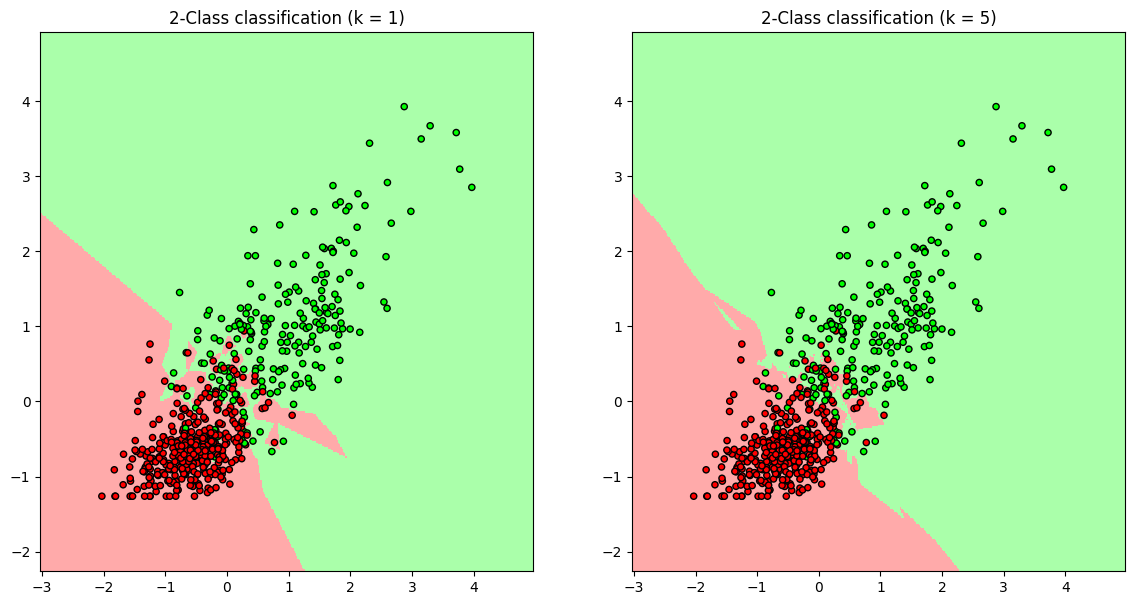

In [60]:
from matplotlib.colors import ListedColormap


X = df_model_standardized[['radius_mean', 'concave points_mean']].values
y = df_model_standardized['diagnosis'].values

# Crear mapas de color para la representación gráfica
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

h = .02  # Tamaño del paso en el mesh

# Configuración de los modelos kNN para k=1 y k=5
n_neighbors_list = [1,5]

plt.figure(figsize=(14, 7))
for i, n_neighbors in enumerate(n_neighbors_list, start=1):
    # Crear una instancia de KNeighborsClassifier y entrenarla
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X, y)  # Usando solo las dos características elegidas

    # Crear un mesh para graficar
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Obtener predicciones para cada punto en el mesh
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Dibujar el resultado en un gráfico de colores
    Z = Z.reshape(xx.shape)
    plt.subplot(1, 2, i)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Dibujar también los puntos de entrenamiento
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"2-Class classification (k = {n_neighbors})")

plt.show()


La visualización del modelo K-Vecinos Más Cercanos (k-NN) utilizando las características 'radius_mean' y 'concave points_mean' de `df_model_standardized`, con `k=1` y `k=5`, ofrece insights valiosos sobre el comportamiento del modelo en diferentes configuraciones. En estos gráficos, las áreas de fondo de color rosa representan regiones predichas como benignas, mientras que las áreas verdes representan regiones predichas como malignas. Los puntos de datos reales están marcados en rojo para los casos benignos y en verde oscuro para los malignos.

1. **k=1 (Un Solo Vecino Más Cercano)**:
   - Con `k=1`, el modelo k-NN muestra una adaptación detallada a los datos, resultando en fronteras de decisión más irregulares y específicas. Esta configuración tiende a capturar con precisión las variaciones locales en el conjunto de datos, lo cual se refleja en la precisión del modelo para identificar correctamente los casos malignos, a pesar de las fronteras menos suaves en el gráfico. 
   - La efectividad del modelo con `k=1` en nuestro análisis se debe a su capacidad para identificar con precisión los casos críticos. Las áreas de predicción más fragmentadas indican una atención particular a cada punto individual.
   - Aunque las fronteras no son suaves y pueden sugerir un sobreajuste, en este caso particular, el modelo con `k=1` parece omitir menos puntos de datos relevantes. Esto puede ser preferible en aplicaciones donde la detección precisa, especialmente de casos anómalos o críticos, es más importante que la suavidad de las fronteras de decisión.


2. **k=5 (Cinco Vecinos Más Cercanos)**:
   - Por otro lado, `k=5` suaviza las fronteras de decisión y produce una clasificación más generalizada. Esta configuración puede ser más robusta frente a variaciones y ruido en los datos, ya que promedia la influencia de varios vecinos, pero puede perder algunos detalles finos que son capturados por un valor más bajo de `k`.
   - Aunque esta aproximación puede ser adecuada para ciertos contextos, en nuestro caso, la configuración con `k=1` resultó ser más efectiva, probablemente debido a la naturaleza de los datos y la importancia de detectar casos específicos de tumores malignos con alta precisión.



La siguiente visualización compara el desempeño del modelo k-NN para diferentes valores de `k`, utilizando la métrica de sensibilidad (recall). A través de esta comparación, se entiende cómo el número de vecinos más cercanos afecta la capacidad del modelo para identificar correctamente los casos malignos en el conjunto de datos. El gráfico muestra el recall obtenido para cada valor de `k` en los conjuntos de entrenamiento y prueba, proporcionando una visión de la generalización del modelo frente a distintos números de vecinos.


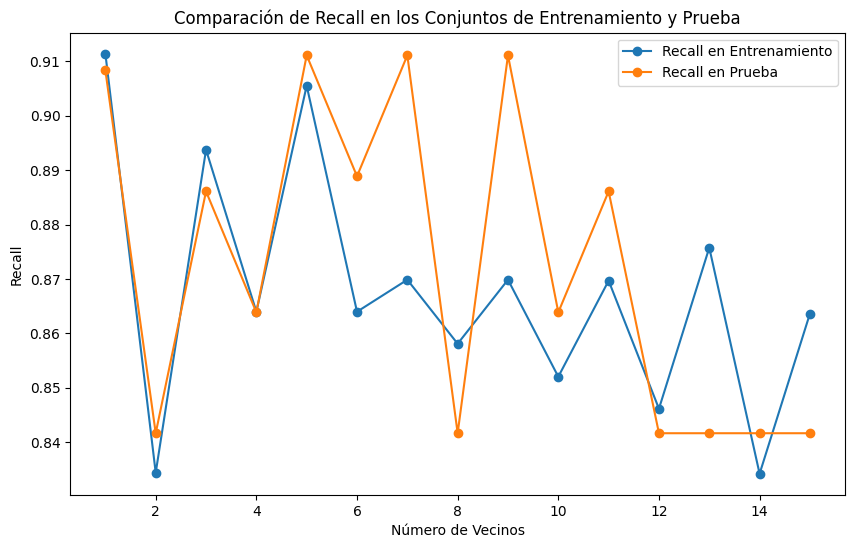

In [61]:
from sklearn.model_selection import cross_val_score, train_test_split


# Crear listas para almacenar las puntuaciones de recall para los conjuntos de entrenamiento y prueba
train_recalls = []
test_recalls = []

# Rango de valores de 'k' para probar
k_values = range(1, 16)  # Por ejemplo, de 1 a 15

for k in k_values:
    # Crear y entrenar el modelo k-NN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Calcular recall para el conjunto de entrenamiento usando validación cruzada
    train_recall = cross_val_score(knn, X_train, y_train, cv=5, scoring='recall').mean()
    train_recalls.append(train_recall)

    # Calcular recall para el conjunto de prueba
    test_recall = cross_val_score(knn, X_test, y_test, cv=5, scoring='recall').mean()
    test_recalls.append(test_recall)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_recalls, label='Recall en Entrenamiento', marker='o')
plt.plot(k_values, test_recalls, label='Recall en Prueba', marker='o')
plt.xlabel('Número de Vecinos')
plt.ylabel('Recall')
plt.title('Comparación de Recall en los Conjuntos de Entrenamiento y Prueba')
plt.legend()
plt.show()


Los resultados del gráfico indican que `k=1` proporciona un rendimiento similar en sensibilidad (recall) comparado con `k=5` y `k=7`( aproximados)  tanto en los conjuntos de entrenamiento como de prueba. Aunque `k=1` tiende a ser más susceptible al ruido y al sobreajuste para algunos conjuntos de datos y contextos específicos, esta característica puede ser útil para detectar casos anómalos o menos comunes.




### Máquinas de vectores de soporte 


Las Máquinas de Vectores de Soporte (SVM) son algoritmos de aprendizaje supervisado utilizados para la clasificación y regresión. Su enfoque distintivo se basa en la identificación de un hiperplano óptimo que maximiza el margen entre las distintas clases.

El hiperplano de decisión en SVM se define como la solución al problema de optimización:

$$ w \cdot x + b = 0 $$

donde $ w $ es el vector normal al hiperplano y $ b $ es el sesgo. El margen, que es la distancia entre el hiperplano y los vectores de soporte más cercanos, se maximiza ajustando $ w $ y $ b $. Este margen se calcula como:

$$ \text{Margen} = \frac{2}{||w||} $$

En el caso de datos no linealmente separables, las SVM utilizan el truco del kernel para transformar los datos a un espacio de mayor dimensión donde la separación lineal es posible. El parámetro `gamma` en Scikit-learn determina la influencia de un solo punto de entrenamiento y es específico para ciertos tipos de kernel como el RBF.

El parámetro de regularización $ C $ en SVM equilibra el error de clasificación y la simplicidad del modelo. Un valor alto de $ C $ busca reducir el error de clasificación a costa de un modelo más complejo, mientras que un valor bajo favorece un modelo más simple a expensas de un mayor error de clasificación.

En esta implementación, se optimizaron `C` y `gamma` para un conjunto de datos estandarizado. El modelo se evaluó con una matriz de confusión y un reporte de clasificación, proporcionando métricas como precisión, recall y f1-score para analizar su rendimiento.



In [62]:
from sklearn.svm import SVC

# Separar las características y la etiqueta
X = df_model_standardized.drop('diagnosis', axis=1)
y = df_model_standardized['diagnosis']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los parámetros para GridSearchCV en SVM
svm_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Crear un nuevo modelo SVM con la opción de probabilidad activada
svm_model = SVC(probability=True)

# Aplicar GridSearchCV para encontrar los mejores parámetros
svm_grid = GridSearchCV(svm_model, svm_params, cv=5, n_jobs=-1, scoring='recall')
svm_grid.fit(X_train, y_train)

# Obtener los mejores parámetros y la mejor puntuación
best_params_svm = svm_grid.best_params_
best_score_svm = svm_grid.best_score_

# Crear y entrenar el modelo SVM con los mejores parámetros
svm_best = SVC(probability=True, **best_params_svm)
svm_best.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_svm = svm_best.predict(X_test)

# Matriz de confusión y reporte de clasificación
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print("Mejores parámetros SVM:", best_params_svm)
print("Mejor puntuación de recall SVM:", best_score_svm)
print("\nMatriz de Confusión SVM:")
print(conf_matrix_svm)
print("\nReporte de Clasificación SVM:")
print(class_report_svm)


Mejores parámetros SVM: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Mejor puntuación de recall SVM: 0.9294117647058823

Matriz de Confusión SVM:
[[66  5]
 [ 2 41]]

Reporte de Clasificación SVM:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        71
           1       0.89      0.95      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



#### Cálculo y Graficación de la Curva ROC y AUC para el Modelo SVM

En este bloque de código, calculamos y visualizamos la Curva ROC (Receiver Operating Characteristic) y el correspondiente AUC (Area Under the Curve) para evaluar la capacidad del modelo SVM de clasificar correctamente las observaciones:

1. **Calculo de Probabilidades**: Utilizando `predict_proba` para obtener las probabilidades de que cada observación pertenezca a la clase positiva.

2. **ROC AUC Score**: Calculamos el AUC utilizando `roc_auc_score`. Este valor nos da una medida cuantitativa de la capacidad del modelo para distinguir entre las clases.

3. **Generación de la Curva ROC**: Obtenemos las tasas de verdaderos positivos y falsos positivos para varios umbrales utilizando `roc_curve`.

4. **Visualización de la Curva ROC**: Graficamos la curva ROC, que proporciona una visualización del desempeño del modelo. Un AUC cercano a 1 indica una alta capacidad de discriminación.



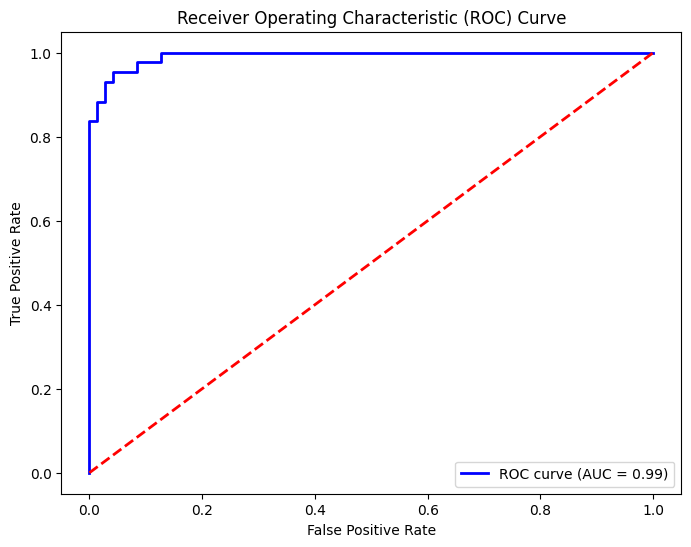

ROC AUC Score: 0.9921388797903701


In [63]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calcular las probabilidades de la clase positiva
y_prob_svm = svm_best.predict_proba(X_test)[:, 1]

# Calcular AUC
auc_score = roc_auc_score(y_test, y_prob_svm)

# Obtener las tasas de verdaderos positivos y falsos positivos
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("ROC AUC Score:", auc_score)


#### Visualización de las Fronteras de Decisión del Modelo SVM para Diferentes Valores de C

En esta sección, se uso una visualización de las fronteras de decisión generadas por el modelo SVM para diferentes valores del parámetro de regularización $ C $. Estas visualizaciones ayudan a comprender cómo el cambio en el valor de $ C $ afecta la decisión del modelo al clasificar los datos.

- **Selección de Características para la Visualización**: Debido a que SVM es un clasificador de alta dimensión, para la visualización seleccionamos solo dos características significativas de nuestro conjunto de datos. Esto nos permite observar la interacción entre estas dos variables en el espacio de características y cómo SVM las utiliza para clasificar los datos.

- **Diferentes Valores de C**: Los valores de $ C $ seleccionados para la visualización son [0.1, 1, 10, 100]. Un valor más bajo de $ C $ permite un margen más amplio pero con más violaciones del margen (es decir, clasificaciones erróneas), mientras que un valor más alto de $ C $ intenta clasificar todos los ejemplos de entrenamiento correctamente, lo que puede llevar a un margen más estrecho y potencialmente a un sobreajuste.

- **Gráficos de Fronteras de Decisión**: Cada gráfico muestra la frontera de decisión correspondiente a un valor específico de $ C $. Estos gráficos  permiten visualizar directamente cómo la frontera de decisión y el margen entre las clases cambian con diferentes niveles de regularización.




In [64]:
df_model_standardized.columns


Index(['compactness_mean', 'compactness_se', 'concave points_mean',
       'concave points_se', 'concavity_mean', 'concavity_se',
       'fractal_dimension_mean', 'fractal_dimension_se', 'radius_mean',
       'radius_se', 'smoothness_mean', 'smoothness_se', 'symmetry_mean',
       'symmetry_se', 'texture_mean', 'texture_se', 'diagnosis'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


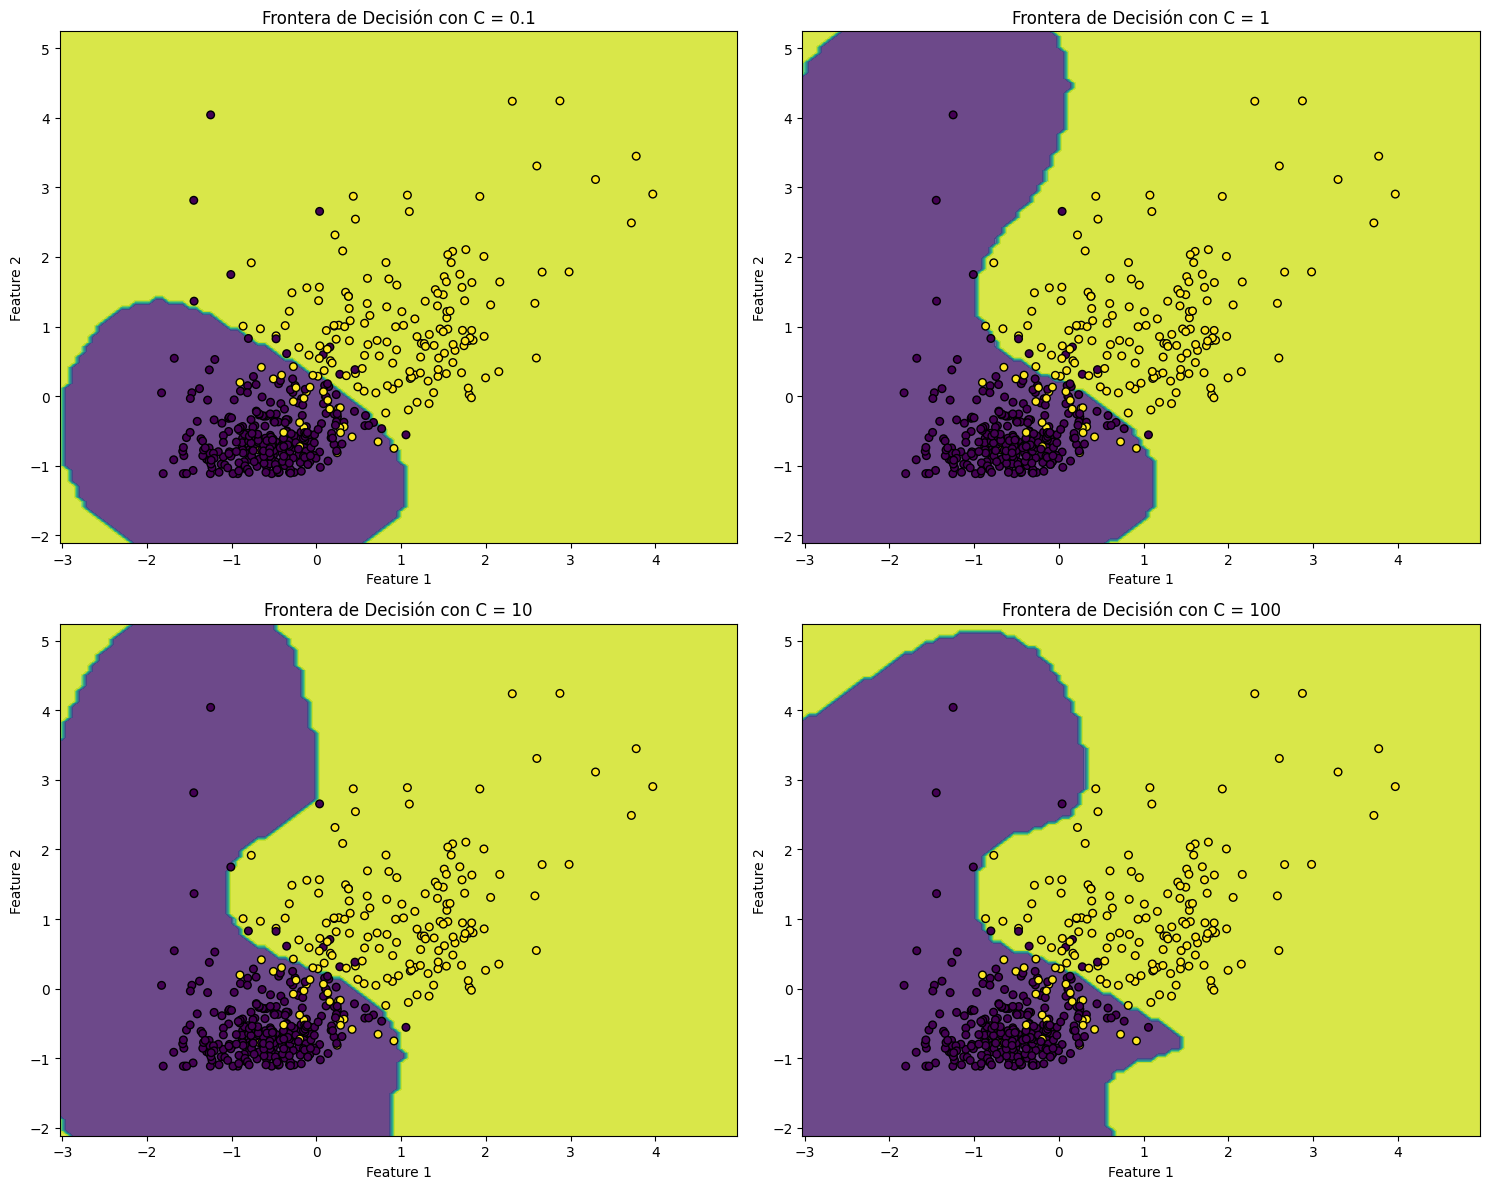

In [65]:
X_vis = df_model_standardized[['radius_mean', 'concavity_mean']]  
y_vis = df_model_standardized['diagnosis']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

# Definir diferentes valores de C para la visualización
C_values = [0.1, 1, 10, 100]

# Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Crear una malla de puntos para trazar las fronteras de decisión
x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                     np.linspace(y_min, y_max, 100))

# Graficar las fronteras de decisión para cada valor de C
for idx, C in enumerate(C_values):
    ax = axes[idx // 2, idx % 2]
    svm_model = SVC(kernel='rbf', C=C)
    svm_model.fit(X_train_vis, y_train_vis)
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X_train_vis.iloc[:, 0], X_train_vis.iloc[:, 1], c=y_train_vis, s=30, edgecolor='k')
    ax.set_title(f'Frontera de Decisión con C = {C}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


## Conclusiones


#### Sobre la importancia de características
Aunque el enfoque de este trabajo fue evaluar la eficacia de los modelos de aprendizaje automático aplicados al conjunto de datos de Wisconsin, se entiende que este dataset está diseñado de manera tal que los valores más altos generalmente están asociados con malignidad. Sin embargo, se buscó comprender como estas características pueden influenciar en la clasificación del cáncer de mama. 
Aunque no es un modelo predictivo, el análisis de componentes principales (PCA) es una herramienta estadística para discernir la relevancia de características mediante los vectores de carga. Así se notó que muchas características influían mucho en el primer componente principal, aunque esta tendencia disminuía a través de los posteriores. La cantidad mínima suficiente de varianza se obtuvo a través de 6 componentes, lo que ayudo a disminuir la dimensionalidad, sin embargo, la interpretación se volvió compleja, sugiriendo la posibilidad de una multidimensionalidad inherente a los datos. 

En cuanto a los modelos de aprendizaje automático, como los árboles de decisión y bosques aleatorios, se identificaron la media de la concavidad y los puntos cóncavos repetidamente, lo que sugiere que las propiedades morfológicas de los núcleos celulares pueden ser indicadores clave para la clasificación diferencial de los tumores benignos y los malignos. 

La observación de los coeficientes para las dos variantes de modelos que se consideraron, indica una posible relación entre variabilidad y diagnóstico. Debido a que ciertos coeficientes de errores estándar tienen signos opuestos a sus medias correspondientes. Estos resultados podrían indicar a priori que los tumores malignos presentan patrones más consistentes, y que una mayor variabilidad podría estar más relacionada con los tumores benignos. 

En conclusión, los hallazgos obtenidos por la importancia de características enriquecen el conocimiento sobre factores influyentes en la formación de masas anómalas, pero para realizar afirmaciones clínicas más concretas se requiere un enfoque multidisciplinar con la experiencia de profesionales médicos. Por lo que se destaca que estas interpretaciones y hallazgos se centran en el contexto de análisis de datos y la interpretación estadística. 


#### Modelos de aprendizaje automático. 
Para el análisis de los modelos de aprendizaje automático, se consideraron tres métricas principalmente: la sensibilidad, que se enfoca en la correcta identificación de los casos malignos (positivos); la precisión, que se enfoca en la exactitud de las predicciones positivas; y la precisión global (acuracyacurracy), que otorga la medida del rendimiento global del modelo. Haciendo énfasis en la métrica de sensibilidad que, dicho en otras palabras, dice cuántos tumores malignos se predijeron correctamente. En general, todos los modelos analizados ofrecían métricas similares, con conjuntos de datos distintos, por lo que la elección del modelo depende de la interpretación de los datos utilizados y del contexto específico del modelo. 

Con relación a los modelos de árboles de decisión y bosques aleatorios, estos ofrecieron una interpretación más directa o “real” de las características, debido a que estos modelos fueron entrenados con datos originales reducidos, sin normalización ni escalamiento. Por otra parte, los modelos de regresión logística con datos estandarizados y escalados logarítmicamente brindaron buenas métricas. Debido a consideraciones de sobreajuste los modelos de regresión entrenados con PCA y datos reducidos se descartaron en las comparativas finales. Los modelos de k-Vecinos más cercanos (KNN) y máquinas de vectores de soporte (SVM), ambos entrenados con datos estandarizados, a grandes rasgos, ofrecieron buenas métricas. 

La elección del modelo más adecuado recae en la interpretabilidad de los resultados y a la naturaleza de los datos. Lejos de seleccionar modelos con las predicciones más elevadas, considero que las elecciones más viables son los árboles de decisión y los bosques aleatorios, en particular por la naturaleza de sus datos, que no fueron transformados o escalados. 

Por último, aunque este estudio ha proporcionado un entendimiento más profundo de las características de los núcleos celulares anómalos, el conjunto de datos de cáncer de Wisconsin es antiguo, y podría no reflejar la situación actual entorno al diagnóstico temprano de cáncer de mama, asi como la generación de nuevas muestras para prueba. Se entiende entonces, que la contribución de este este estudio es de tipo educativo y de investigación. Para su aplicación clínica, se reitera considerar una perspectiva multidisciplinar con profesionales médicos. 


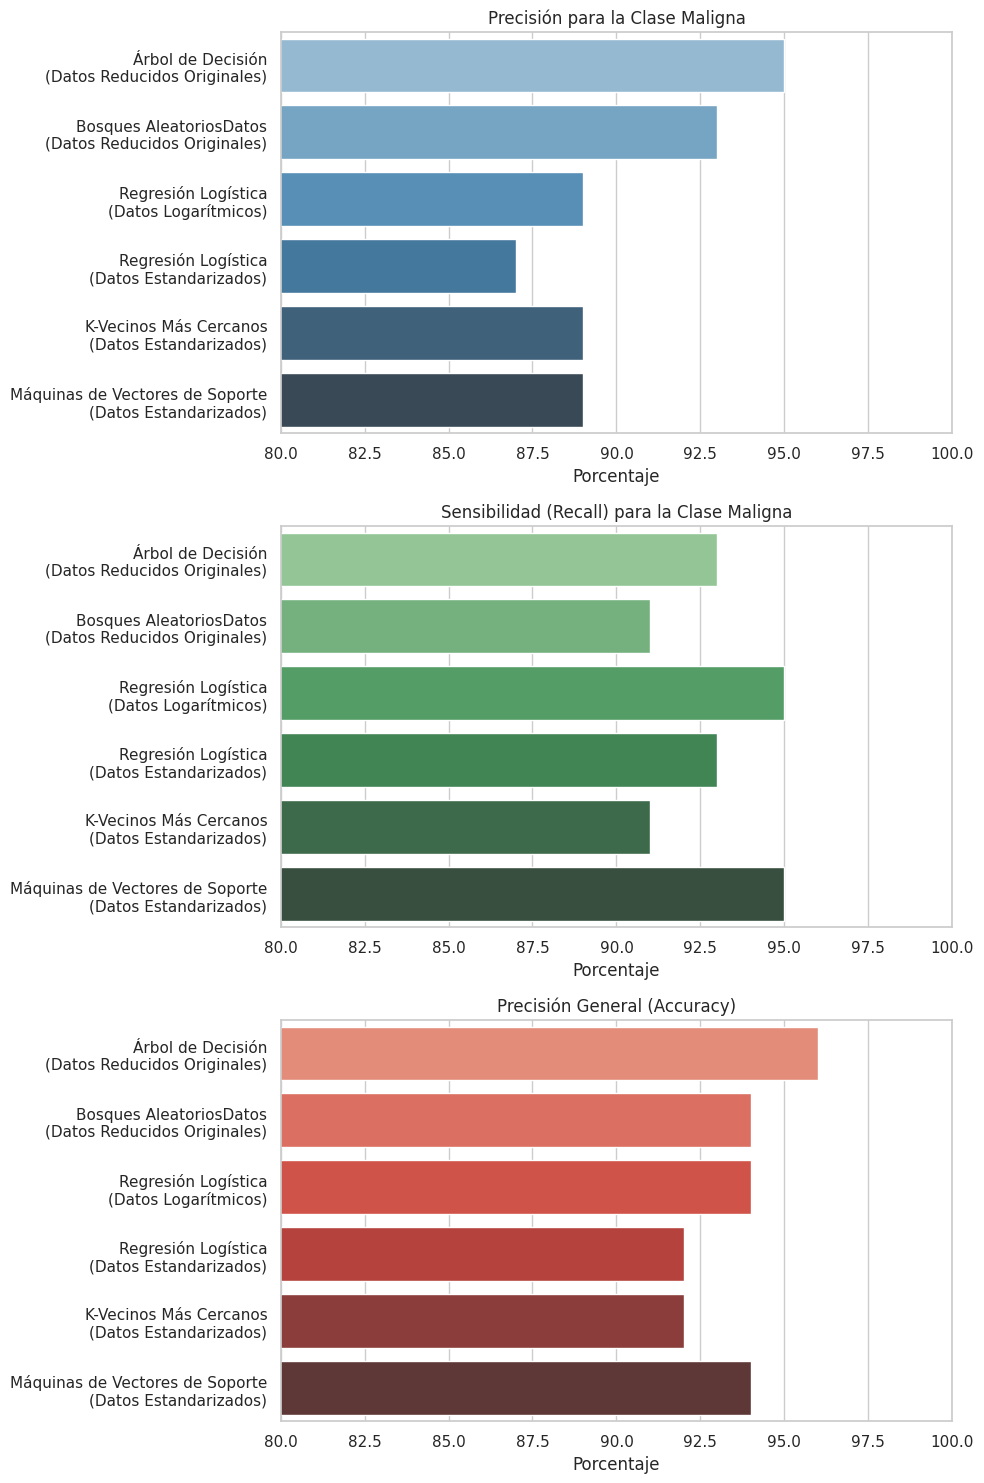

In [66]:
# Configuración de estilo y colores de Seaborn
sns.set(style="whitegrid")

# Datos de las métricas para cada modelo
modelos = ['Árbol de Decisión\n(Datos Reducidos Originales)', 'Bosques AleatoriosDatos\n(Datos Reducidos Originales)', 'Regresión Logística\n(Datos Logarítmicos)',
           'Regresión Logística\n(Datos Estandarizados)', 'K-Vecinos Más Cercanos\n(Datos Estandarizados)', 'Máquinas de Vectores de Soporte\n(Datos Estandarizados)']
precision_maligno = [95, 93, 89, 87, 89, 89]  # Precisión para la clase maligna (1)
sensibilidad = [93, 91, 95, 93, 91, 95]  # Sensibilidad (recall) para la clase maligna (1)
accuracy = [96, 94, 94, 92, 92, 94]  # Precisión general (accuracy)

# Crear los gráficos
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Gráfico de Precisión para la clase maligna (1)
sns.barplot(x=precision_maligno, y=modelos, palette="Blues_d", ax=ax[0])
ax[0].set_title('Precisión para la Clase Maligna')
ax[0].set_xlabel('Porcentaje')
ax[0].set_xlim(80, 100)  

# Gráfico de Sensibilidad (recall) para la clase maligna (1)
sns.barplot(x=sensibilidad, y=modelos, palette="Greens_d", ax=ax[1])
ax[1].set_title('Sensibilidad (Recall) para la Clase Maligna')
ax[1].set_xlabel('Porcentaje')
ax[1].set_xlim(80, 100)  

# Gráfico de Precisión General (accuracy)
sns.barplot(x=accuracy, y=modelos, palette="Reds_d", ax=ax[2])
ax[2].set_title('Precisión General (Accuracy)')
ax[2].set_xlabel('Porcentaje')
ax[2].set_xlim(80, 100)  

# Mostrar los gráficos
plt.tight_layout()
plt.show()
